# Data Mining Project 1st Semester 2020/2021

<div class="alert alert-block alert-success">

## 1) Introduction
    
</div>

<div class="alert alert-block alert-info">

### 1.1) An Understanding
    
</div>

This dataset was provided by the Paralyzed Veterans of America (PVA). The original sample has 95412 rows, meaning that it has 95412 contributors, who have made a previous donation to PVA before. The objective of this project is to recapture a group of donors that is called "lapsed donors", consisting in a group donors who made their last donation between 13 and 24 months ago. Therefore, it is going to be developed a Customer Segmentation , so that the company can better interpret and analise the differents groups of donors. This is very important to do so because it will help to recapture the group of "lapsed donors".

This project was developed using the Jupyter Notebook, to which was created a particular enviroment on Conda. Also, it can be found in a github repository (link: https://github.com/its-pedrofonseca/Data-Mining-Project (still private) ). It was also created a Trello Chart to better understand the tasks that had to be done, as well as the more demanding tasks and to divide the work for the members. (Trello: https://trello.com/b/UswFQo7V/data-mining)

<div class="alert alert-block alert-info">

### 1.2) Setting up Enviroments in Anaconda 
    
</div>

As this project requires specific libraries and packages previously installed, before running the notebook, so that there aren't any external problems, an enviroment in anaconda was created to run this notebook without any problems. The enviroment file is provided in the github previously referred, as a yml file, then the user will have to download it and run some commands in the anaconda command line...........................................................

<div class="alert alert-block alert-info">

### 1.3) Package Importing
    
</div>

In [2]:
# Remember: library imports are ALWAYS at the top of the script, no exceptions!
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from datetime import datetime
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
#from pandas_profiling import ProfileReport
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram

<div class="alert alert-block alert-success">

## 2) Importing, Acessing and Cleaning the Data
    
</div>

The model that was followed to develop this project was the KDD Process (Knowledge Discovery Database).

In this phase of the Data Mining Process, it is going to be created a target dataset, which then is going to be discovered. Following this, some processes of data cleaning and preprocessing are going to be applied, such as removing noise, nans variables, data normalization, collecting only the necessary information to apply the next processes. Afterwards, data reduction and projection is going to be applied, finding useful features (with feature engeneering) to represent the data in smaller subsets, dimensionality reduction and/or transformation methods.

Also, along all this processes some data visualization is going to be applied to better understand the data that we are working with.

<div class="alert alert-block alert-info">
    
### 2.1) Reading the Data
    
</div>

In [3]:
#ver se não se consegue por o ficheiro na git, é demasiado grande acho...
data_original=pd.read_csv("donors.csv")

C:\Users\Asus\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (9,412) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
pd.set_option("display.max_columns",500)
pd.set_option("display.max_rows",500)

<div class="alert alert-block alert-info">

### 2.2) Make a copy of the original dataset

</div>

In [5]:
data = data_original.copy()

In [6]:
data.shape

(95412, 476)

In [7]:
#dataset head
data.head()

,Unnamed: 0,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,0,2009-01-01,GRI,0,IL,61081,,,1957-12-01,0,,,,,XXXX,T2,,,,,,NaN,NaN,F,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0,39,34,18,10,2,1,,,,5.0,,,,,,,,,,,,,,,,,,,,,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,

In [8]:
#Dropping the column that is making an index
data.drop(["Unnamed: 0"], axis=1, inplace= True)

In [9]:
# count of missing values
data.isna().sum().sum()

5158884

In [10]:
# duplicated observations
data.duplicated().sum()

0

<div class="alert alert-block alert-info">

### 2.3) Normalize Some Values and replacing empty String for Nans
    
</div>

In [11]:
Y_Values=["COLLECT1","VETERANS","BIBLE","CATLG","HOMEE","PETS","CDPLAY","STEREO","PCOWNERS","PHOTO","CRAFTS","FISHER","GARDENIN","BOATS","WALKER","KIDSTUFF","CARDS","PLATES"]
for i in Y_Values:
    data[i]=pd.Series(np.where(data[i].values == 'Y', 1, 0),data.index)
data[Y_Values]

,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95408,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95409,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95410,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
X_values=["NOEXCH","RECINHSE","RECP3","RECPGVG","RECSWEEP","MAJOR","PEPSTRFL"]
for i in X_values:
    data[i]=pd.Series(np.where(data[i].values == 'X', 1, 0),data.index)
data[X_values]

,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MAJOR,PEPSTRFL
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...
95407,0,0,0,0,0,0,0
95408,0,0,0,0,0,0,0
95409,0,0,1,0,0,0,1
95410,0,1,0,0,0,0,1


In [13]:
data["MAILCODE"]=pd.Series(np.where(data["MAILCODE"].values == 'B', 1, 0),data.index)

In [14]:
# replace " " by nans
data.replace(" ", np.nan, inplace=True)

# count of missing values
data.isna().sum()

ODATEDW         0
OSOURCE       928
TCODE           0
STATE           0
ZIP             0
MAILCODE        0
PVASTATE    93954
DOB         23883
NOEXCH          0
RECINHSE        0
RECP3           0
RECPGVG         0
RECSWEEP        0
MDMAUD          0
DOMAIN       2316
HOMEOWNR    22228
CHILD03     94266
CHILD07     93846
CHILD12     93601
CHILD18     92565
NUMCHLD     83026
INCOME      21286
GENDER       2957
WEALTH1     44732
HIT             0
MBCRAFT     52854
MBGARDEN    52854
MBBOOKS     52854
MBCOLECT    52914
MAGFAML     52854
MAGFEM      52854
MAGMALE     52854
PUBGARDN    52854
PUBCULIN    52854
PUBHLTH     52854
PUBDOITY    52854
PUBNEWFN    52854
PUBPHOTO    52854
PUBOPP      52854
DATASRCE    21280
MALEMILI        0
MALEVET         0
VIETVETS        0
WWIIVETS        0
LOCALGOV        0
STATEGOV        0
FEDGOV          0
SOLP3       95232
SOLIH       89212
MAJOR           0
WEALTH2     43823
GEOCODE     80168
COLLECT1        0
VETERANS        0
BIBLE           0
CATLG     

<div class="alert alert-block alert-info">

### 2.4) Dropping Columns with High percentege of missing values
    
</div>

In [15]:
#if a columns has more than half of missing values the column is removed
for i in data:
    if  data[i].isna().sum()/data.shape[0] >0.51:
        data.drop(i,axis=1,inplace=True)
print(data_original.shape[1]-data.shape[1],"columns were removed")

75 columns were removed


In [16]:
data.shape

(95412, 401)

In [17]:
set(data.dtypes)

{dtype('int32'), dtype('int64'), dtype('float64'), dtype('O')}

<div class="alert alert-block alert-info">

### 2.5) Defining metric and non-metric features
    
</div>

In [18]:
set(data.dtypes)

{dtype('int32'), dtype('int64'), dtype('float64'), dtype('O')}

In [19]:
# Define metric and non-metric features
non_metric_features = data.select_dtypes(include="object").columns.to_list()
metric_features = data.columns.drop(non_metric_features).to_list()

<div class="alert alert-block alert-info">

### 2.6) Delete columns with same values

</div>

In [20]:
old_non_metric_feat = list(data[non_metric_features].columns)

In [21]:
#Remove columns that only have one elements as its variable thus it wouldnt give any new information
remover=[]

def del_columns_with_one_elem(lista):
    for i in range(len(lista)):
        #print(lista[i])
        if len(set(data[lista[i]])) == 1:
            #print(len(set(data[lista[i]])))
            remover.append(lista[i])   
    for r in remover:
        lista.remove(r)


In [22]:
del_columns_with_one_elem(non_metric_features)
print("Deleted Column/s:", (set(old_non_metric_feat).difference(list(data[non_metric_features].columns)))) 

Deleted Column/s: {'RFA_2R'}


### 2.7) Feature Grouping

In [23]:
data_corr = data.corr()

corrdata = data_corr.abs().stack()
corrdata = corrdata.sort_values(ascending= False)
corrdata = corrdata[corrdata>0.9] 
corrdata =corrdata[corrdata<1]
corrdata = pd.DataFrame(corrdata).reset_index()

corrdata.columns = ["Features1","Features2","corr_value"]
len(corrdata.Features2.unique())

97

In [24]:
grouped_feature_list = []
correlated_group_list = []
for feature in corrdata.Features1.unique():
    if feature not in grouped_feature_list:
        correlated_block = corrdata[corrdata.Features1==feature]
        grouped_feature_list = grouped_feature_list + list(correlated_block.Features2.unique()) + [feature]
        correlated_group_list.append(correlated_block)

In [25]:
#Example for the first element of correlation the other features that also correlate

for i in correlated_group_list:
    i.reset_index(drop=True,inplace=True)

In [26]:
#List of elements that present correlation between themselves, without repeated features

correlated_group =[]
for i in range(len(correlated_group_list)):
    aux = correlated_group_list[i].Features1.unique()
    aux=np.append(aux,correlated_group_list[i].Features2.unique(),axis=0)
    correlated_group.append(aux)

In [27]:
for c in correlated_group:
    print(c)

['HHAGE3' 'HHAGE1' 'HHAS1']
['HV2' 'HV1' 'HVP1' 'HVP2' 'HVP6']
['ETH2' 'ETHC5' 'ETHC4']
['POP901' 'POP902' 'POP903']
['HHD7' 'HHD9']
['LFC5' 'LFC3' 'LFC1']
['AFC1' 'AFC2']
['AGE906' 'AGE905' 'AGE903' 'AGE902' 'AGE904']
['IC3' 'IC1' 'IC4' 'IC2']
['DW4' 'DW5' 'DW6']
['LFC4' 'LFC2' 'LFC1']
['RHP2' 'RHP1' 'HUR2']
['IC23' 'IC14']
['HHP2' 'HHP1' 'RHP3' 'HHN3' 'HHN4']
['ETH5' 'LSC2' 'ETH13']
['OCC9' 'EIC1']
['IC11' 'IC20']
['HUPA2' 'DW6' 'DW5']
['AGE901' 'AGE904' 'AGE902']
['HHD1' 'HHN3' 'AGE907' 'HHN4' 'HHD4' 'HHP1']
['DW2' 'DW1']
['AFC5' 'AFC4']
['IC10' 'IC19']
['IC12' 'IC21']
['CARDPROM' 'NUMPROM']
['HUPA6' 'DW6' 'DW5']
['HV3' 'HV4']
['HC17' 'HC18']
['HC8' 'HC7']
['IC22' 'IC13']
['HHD3' 'MARR1' 'HHD2']
['HHD5' 'HHD2']
['RP2' 'RP1']
['NGIFTALL' 'CARDGIFT']
['HVP3' 'HVP4']
['AGEC7' 'MARR3']
['TPE4' 'TPE3']
['HHN5' 'HHN6']
['HHN1' 'HHD11']
['HU1' 'HU2']
['AGEC6' 'HHAGE1']


In [28]:
data.drop(['HHAGE1','HHAGE3'], axis=1, inplace=True)

In [29]:
# ficar com 
data.drop(['HV1','HVP1','HVP2','HVP6'], axis=1, inplace=True)

In [30]:
# dar drop a blacks com 15-59,blacks >15, percent blacks total e ficar com nada (faz-se com idade depois)
data.drop(['ETHC5','ETHC4'], axis=1, inplace=True)

In [31]:
# dar drop a num of persons e households e ficar com o numero de familias no bairro
data.drop(['POP901','POP903'], axis=1, inplace=True)

In [32]:
# dar drop a female household w childen e ficar com single parents household
data.drop(['HHD9'], axis=1, inplace=True)

In [33]:
# dar drop a female e adult females in labor force e ficar com adults in labor force
data.drop(['LFC5','LFC3'], axis=1, inplace=True)

In [34]:
#drop de males actine in military e ficar com o total adults actine in military
data.drop(['AFC2'], axis=1, inplace=True)

In [35]:
#escolher average age of population
data.drop(['AGE906','AGE905','AGE903','AGE902'], axis=1, inplace=True)

In [36]:
#escolher mediana e media da income das familias
data.drop(['IC1','IC3','IC2'], axis=1, inplace=True)

In [37]:
# ficar com percent house units c/ mais de 10 casas/units na morada
data.drop(['DW4','DW5'], axis=1, inplace=True)

In [38]:
## dar drop a male e adult males in labor force e ficar com adults in labor force
data.drop(['LFC4','LFC2'], axis=1, inplace=True)

In [39]:
#ficar com media de numeros de quartos por casas
data.drop(['RHP1','HUR2'], axis=1, inplace=True)

In [40]:
# percentagem de familias com income >=150000
data.drop(['IC14'], axis=1, inplace=True)

In [41]:
# ficar com a media de numero de pessoas por casa (rever)
data.drop(['HHP1','RHP3','HHN3','HHN4'], axis=1, inplace=True)

In [42]:
# ficar com a percentagem de hispanics
data.drop(['LSC2','ETH13'], axis=1, inplace=True)

In [43]:
# ficar com percentagem de pessoas empregues na agricultura
data.drop(['OCC9'], axis=1, inplace=True)

In [44]:
# ficar com percentagem de familias com income entre os 75000 e 99999
data.drop(['IC11'], axis=1, inplace=True)

In [45]:
#ficar com Percent Adult Veterans Age 16+
data.drop(['DW6'], axis=1, inplace=True)

In [46]:
#ficar com Percent Families w/ Income $50,000 - $74,999 IC19
data.drop(['AFC5'], axis=1, inplace=True)

In [47]:
#ficar com Percent Families w/ Income $100,000 - $124,999 IC21
data.drop(['IC10'], axis=1, inplace=True)

In [48]:
data.drop(['IC12'], axis=1, inplace=True)

In [49]:
# ficar com NUMPROM
data.drop(['CARDPROM'], axis=1, inplace=True)

In [50]:
#ficar com Average Contract Rent in hundreds
data.drop(['HV3'], axis=1, inplace=True)

In [51]:
# features nao importantes
data.drop(['HC18'], axis=1, inplace=True)

In [52]:
data.drop(['HC8'], axis=1, inplace=True)

In [53]:
# Percent Families w/ Income $125,000 - $149,999
data.drop(['IC13'], axis=1, inplace=True)

In [54]:
#ficar com a percentagem de casamentos
data.drop(['HHD3'], axis=1, inplace=True)

In [55]:
data.drop(['HHD2'], axis=1, inplace=True)

In [56]:
#ficar com HV4
data.drop(['RP2'], axis=1, inplace=True)

In [57]:
#ficar com NGIFTALL
data.drop(['CARDGIFT'], axis=1, inplace=True)

In [58]:
#ficar com adultos com +75 anos
data.drop(['HVP3'], axis=1, inplace=True)

In [59]:
#ficar com a mediana de pessoas numa casa HHP1
data.drop(['MARR3'], axis=1, inplace=True)

In [60]:
data.drop(['TPE4'], axis=1, inplace=True)

In [61]:
data.drop(['HHN5'], axis=1, inplace=True)

In [62]:
data.drop(['HHN1'], axis=1, inplace=True)

In [63]:
data.drop(['HU2'], axis=1, inplace=True)

In [64]:
data.shape

(95412, 346)

### 2.7) Fill missing values (Simple imputation)

In [65]:
# simple imputation

In [66]:
# Creating a copy to apply central tendency measures imputation
data_central = data.copy()

In [67]:
modes = data_central[non_metric_features].mode().loc[0]
modes.head(10)

ODATEDW     2015-01-01
OSOURCE            MBC
STATE               CA
ZIP              85351
DOB         1968-01-01
MDMAUD            XXXX
DOMAIN              R2
HOMEOWNR             H
GENDER               F
DATASRCE             3
Name: 0, dtype: object

In [68]:
# checking how many NaNs we still have
data_central.fillna(data_central.median(), inplace=True)
data_central.fillna(modes, inplace=True)
data_central.isna().sum().sum()

0

### 2.8) Outlier Removal

#### IQR

In [69]:
# Updating metric and non metric features
non_metric_features = data_central.select_dtypes(include="object").columns.to_list()
metric_features = data_central.columns.drop(non_metric_features).to_list()

In [70]:
ql = data_central.quantile(.003)
qh = data_central.quantile(.997)
iqr = (qh - ql)

upper_lim = qh + 2 * iqr
lower_lim = ql - 2 * iqr

filters = []
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters.append(data_central[metric].between(llim, ulim, inclusive=True))

filters = pd.Series(np.all(filters, 0))
otliers_iqr=data_central[~filters]
data_central = data_central[filters]
print('Percentage of data removed after outliers:',
      np.round(1 -  np.round(data_central.shape[0] / data_original.shape[0], 5), 5)*100, "%")

Percentage of data removed after outliers: 1.0619999999999998 %


In [71]:
data_central.shape

(94399, 346)

#### Isolation Forest

In [72]:
from sklearn.ensemble import IsolationForest

In [73]:
iso = IsolationForest(contamination=0.01)
iso_df = iso.fit_predict(data_central[metric_features])

In [74]:
mask_out =iso_df == -1
outliers_if=data_central[mask_out]
data_central.drop(outliers_if.index,inplace=True)

In [75]:
print('Percentage of data removed after outliers:',
      np.round(1 -  np.round(data_central.shape[0] / data_original.shape[0], 5), 5)*100, "%")

Percentage of data removed after outliers: 2.051 %


In [76]:
data.drop(otliers_iqr.index,inplace=True)
data.drop(outliers_if.index,inplace=True)

### 2.9) Data Selection

In this step, the variables that are going to be used to do the clustering are chosen. The group has decided to split the variables into three categories. 

The __Value__ variables, that relate to the promotion and the client, such as how much is the average gift from that donor, if it a major donor and others variables.

The __Demographic__ variables are more related with the dynamic social population in which the subject lives. This selection should be useful in a way that we can better understand the surroundings of the donor, and thus better define the marketing strategy.

The __Socio-Economic__ variables represent the  economic activity that are molded by social processes, because of the local or global economy. This is useful, to understand better the economic conditions in which the donor lives.

Also, a juntion of all the previosly variables are put together in a dataframe called __overall__.


In [77]:
# 12 variaveis
value = data.loc[:,["RAMNTALL","NGIFTALL","MINRAMNT","MAXRAMNT","TIMELAG","AVGGIFT",
                    "NUMPROM","CARDPM12","NUMPRM12","MAJOR","HIT","NUMPROM"]]

In [78]:
# 22 variaveis
demographic = data.loc[:,["STATE","GENDER","DOB","POBC1","POBC2","POP902","POP90C1","POP90C2","POP90C3","POP90C4",
                          "POP90C5","AGE901","SEC1","SEC2","SEC3","SEC5","LSC1","LSC3","LSC4","MARR1","MARR2","MARR4"]]

In [79]:
# 9 variaveis
socio_economic = data.loc[:,["WEALTH1","IC4","HHAS1","HHAS2","HHAS3","HHAS4","INCOME","HV2","HV4"]]

### 2.11) Some Data Visualization

Since the original dataset was very big and incomplete, first the group had to do some data cleaning and then some data selection, in order to better visualize the variables that could bring value, when doing the clustering.

Data Visualization is importante here to better understand, the variables that are being used, and also to see how they spead along an axis. This helps us have a better domain knowledge, which is very important to any data science project.


### 2.11.3) Data Exploration

Starting with the vast majority of variables, that are metric variables, the visualization here chosen is the box plot that
shows the distribution of quantitative data in a way that facilitates comparisons between variables.

The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution.

In [80]:
value_metric_features = value.select_dtypes(include=["int32","float64","int64"]).columns.to_list()

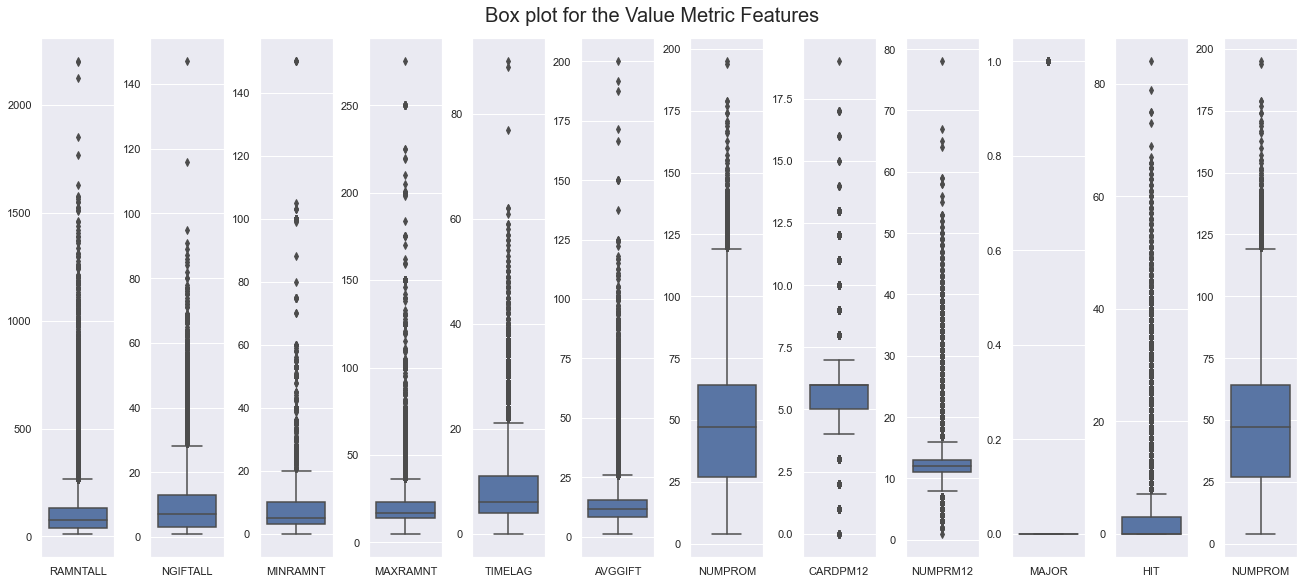

In [81]:
sns.set()

plot_features = value.columns
fig, axes = plt.subplots(1, len(plot_features), figsize=(18,8), constrained_layout=True)
j=0
k=1

for i in zip(axes, plot_features):
    sns.boxplot(data=value.iloc[:,j:k], ax=i[0])
    j=j+1
    k=k+1
    
plt.suptitle("Box plot for the Value Metric Features", fontsize=20)
plt.show()

In [82]:
dem_metric_features = demographic.select_dtypes(include=["int16","int32","float64","int64"]).columns.to_list()

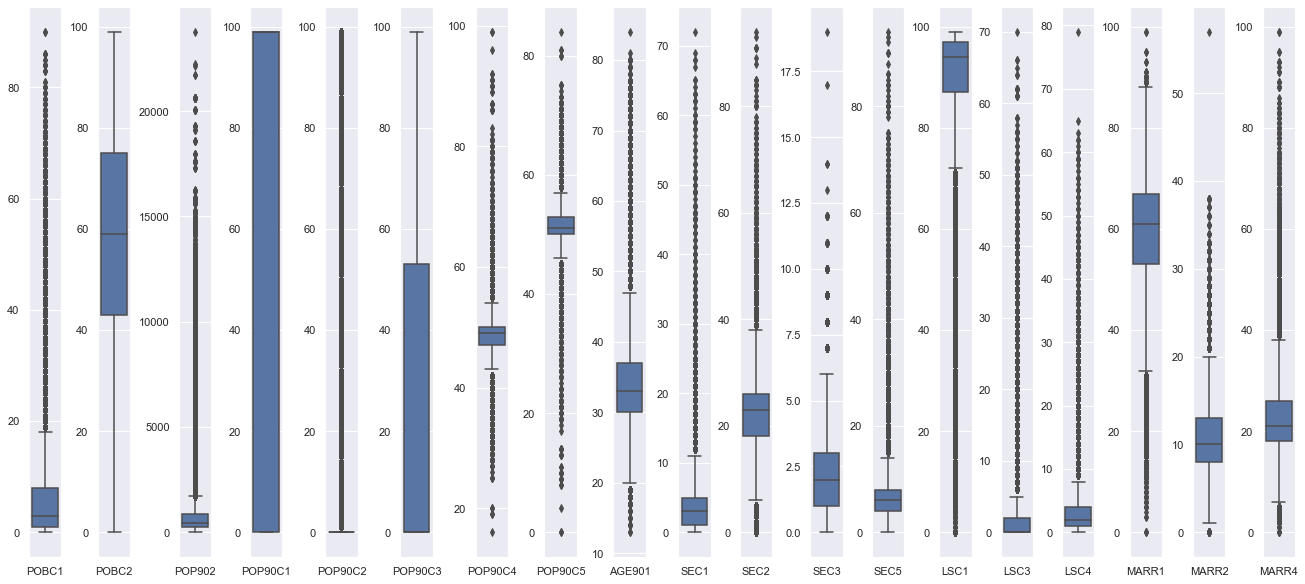

In [83]:
sns.set()

plot_features = demographic[dem_metric_features].columns
fig, axes = plt.subplots(1, len(plot_features), figsize=(18,8), constrained_layout=True)
j=0
k=1

for i in zip(axes, plot_features):
    sns.boxplot(data=demographic[dem_metric_features].iloc[:,j:k], ax=i[0])
    j=j+1
    k=k+1
    
#plt.suptitle("Box plot fordata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABRgAAAJICAYAAAAKMYhkAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAgAElEQVR4nOzdeVwU9f8H8NcuGIKYB2Eq3tZ6i4ipCEFeqCggeCSm5ol5Z6dSqZG3lnnhkUelaWpqgF+PVBRFPDv06/kzEwXtq4SiIoexO78/aCeHSxZ2d3Z3Xs/Hw0d9htn9vOfY3Zn3fA6VIAgCiIiIiIiIiIiIiEpBLXcAREREREREREREZL2YYCQiIiIiIiIiIqJSY4KRiIiIiIiIiIiISo0JRiIiIiIiIiIiIio1JhiJiIiIiIiIiIio1JhgJCIiIiIiIiIiolJjgpGIiBRv6dKlaNSoUYF/rVu3Ru/evfHVV1/h77//ljvMEtFvy4EDB0r9HgkJCTh37lyJ1l29ejVee+01NG/eHK+++ioyMzNLXW9J7dq1C8nJyWJ5x44daNSoEb7++muT1/10fU//a9y4Mdzd3dGpUye89957Jd5/VHKNGjVCcHBwidYdPHgwGjVqhIcPHxql7ilTpojHOjo6uth133rrLXHd0tJqtdi4cWOJP0+dOnVCmzZtSl1ffk9vb3H/jLV/i3P37l1s377d5PUQERFR2djLHQAREZGl6Ny5M5o0aQIg7wY/IyMDZ86cwcKFC3H27FksW7ZM5ghNb9OmTfj000+xfPnyZ6579OhRfP7556hWrRqGDBkCBwcHODk5mTS+BQsWYM2aNfjxxx9NWk9JtG3bFm3btgUACIKAx48f448//sCePXuwe/duTJ8+Ha+//rrMUSpTSEgI2rZtCwcHB6O/9/79+4tMdGZkZODYsWNlruPdd9/Fnj17EBQUVKL1hwwZgidPnpS53vxCQkLg5uZW5N9NsX+flpaWhu7du6N9+/bo06ePSesiIiKismGCkYiI6B9dunRBaGioZJkgCBgzZgz279+P48ePw8vLS6bozCMtLa3E6168eBEAMHHiRPTr189UIUkYEp+ptW3bFhMmTCiw/Ny5cxg5ciQ+/fRTNGzY0Kgty6hk8n+OjcXV1RUJCQnIysqCo6Njgb8fOnQIT548gZOTU5la8xp6ng8dOrTUdRUnJCQE7dq1M8l7l0RWVhYeP34sW/1ERERUcuwiTUREVAyVSiUmK06fPi1zNJZF32KqSpUqMkdiWVq2bIkZM2ZAq9Xiyy+/lDscMqLOnTsjKysLCQkJhf593759aNiwIerUqWPmyIiIiIjkxQQjERHRM9jZ2QEAnnvuuQJ/2717NwYMGIBWrVrBw8MDAwYMwH/+8x/JOh999BEaNWqEOXPmSJafOXMGTZo0QWBgYLHdG/XjKl65cgUzZ85E+/bt4enpiaFDh+Lnn38u0TacO3cOY8eORbt27dCiRQsEBARg5cqVknoHDx4sdgMfN25csWPINWrUqMC6O3bsMGi/pKSkoFGjRli8eDFmzpyJVq1aoV27dtizZ0+hdXbq1Ak7d+4EAPTu3RudOnWS/F0QBKxfvx7dunVD8+bN0blzZ0RFRSE3N7fAex0/fhzDhg2Dp6cnWrVqhddffx179+4tbhcapEePHnBzc8Pp06dx9+5dyd8uXLggHouWLVsiODgYmzdvhiAIBbZ36NChuHLlCkaMGAEPDw+0a9cO06ZNQ1ZWFu7cuYO3334bnp6e8PLywnvvvYd79+4ViKUkx0Jv79696Nu3Lzw8PPDqq69i4cKFSExMLHB8GzVqhClTpmDlypVo06YN2rRpI46B+fjxYyxfvhzBwcHw8PBAixYt4O/vj/nz50ta9emP/6JFi7Bnzx707NkTLVu2RLdu3bBu3TrodLpCY/ztt98wdOhQtGrVCm3btsXEiRORkpIiWaeoMRi3b9+Ofv36wcPDA97e3hg7diwuX75caD2F6dKlC9RqNX766acCf8vMzMTRo0fRrVu3Il9fkvOuUaNGOHXqFADglVdeweDBgwH8Oy7iuXPnEBAQgBYtWmDAgAEQBKHQMRi1Wi3Wr1+PoKAgtGrVCn5+fnj//fcl45caU0ZGBhYuXIguXbqIY7JOnz690NaYt27dwvTp09GlSxe0aNECHh4eCA0NxebNm8V1duzYgc6dOwMADh48KDkHixqPs7DxWDt16oTBgwdj+/bt6NChAzw8PDB37lzx7yX9Lrhx4wYmTZqEjh07onnz5ujUqRNmzJiB1NTUUu8zIiIiW8IEIxERUTEEQcDOnTthZ2eHLl26SP42b948TJ48GSkpKejVqxd69uyJlJQUvPPOO1iwYIG43tSpU1G9enVs2LABly5dApCXjJg6dSrs7Owwf/78QpOX+U2dOhXR0dEICAhAly5d8Ouvv+LNN98ssjWV3oEDBxAWFoajR4+iQ4cOGDBgAOzs7LBo0SIMGzZMTDLqx60DgICAAIwfP77I9xw/fnyBdfXjV5Z0v+ht3boVe/bsQVhYGFq1aoVWrVoVWueQIUPQuHFjAMDrr7+OIUOGSP7+1VdfYcmSJfD09ERYWBhyc3OxePHiAnVu27YNw4YNw5UrVxAQEIDXX38daWlpmDRpElauXFnsviwplUoFDw8PAMAvv/wiLo+Pj8eAAQNw4sQJdOzYEYMGDYJOp8OMGTMwbdq0Au+TkpKCsLAwCIKAAQMGwNXVFVu2bMGHH36IsLAw3L59G/3790fdunURGxuLTz75RPJ6Q47FN998g0mTJuF///sfgoOD4evri40bNxYaF5A3BudXX32F3r17w8fHB+7u7sjNzcWwYcOwdOlSuLq6YuDAgejTpw+ys7Oxdu1aTJkypdD3mTx5MmrXro0BAwaIcUdERBRY99atW2LC7Y033kDjxo2xb98+DBo06JldkqdNm4aIiAikpaUhODgYr732Go4dO4awsLASJxlfeOEFeHp64vDhwwUmfjp8+DCys7PRvXv3Ql9b0vNu/Pjx4riHo0aNQkhIiOR9xowZgzp16mDAgAFo164dVCpVgboEQcDo0aMxd+5caLVa9O3bF23atMHu3bsxcOBA3Llzp0TbW1KPHj1CWFgYvvrqK9SqVQtDhgyBh4cHtm7din79+kmS7CkpKejTpw9+/PFHtGrVCkOHDkXXrl1x7do1zJgxAxs3bgQANGnSRPyM169fX/IdY6irV68iMjISXbp0Qffu3cXvmJIek3v37mHo0KGIj49H27ZtMWzYMLz00kvYvHkzhgwZYjWTgBEREZmUQEREpHBLliwRNBqNMGbMGGHJkiXCkiVLhMWLFwuzZ88WevfuLTRr1kzYtGmT5DWnT58WNBqN0Lt3byEtLU1cnpaWJvTq1UvQaDTCqVOnxOXx8fGCRqMR+vXrJ+h0OiEyMlLQaDTCqlWrShxf69athRs3bojLf/vtN6Fp06ZC586dhdzcXMm6+/fvFwRBEB49eiS88sorQuvWrYXz58+Lr/3777+Fd999V9BoNMKyZcsK1KV/fUnienpdQ/ZLcnKyoNFohEaNGgmXLl16Zn2CIAgffvihoNFohIsXL4rLtm/fLmg0GqFVq1bCtWvXxOX/+9//hJYtWwpt2rQRtFqtIAiC8OeffwrNmzcXevToIdy7d09cNysrS3j99deFxo0bC1euXCk2Bn19S5YsKXa9efPmCRqNRvj2228FQRCEzMxMoX379kL79u2F5ORkcT2tVitMmDBB0Gg0wuHDh8XlHTt2FDQajTBz5kxx2YMHDwR3d3dBo9EIEydOFHQ6nSAIgpCbmyt07dpV0Gg0QmZmpiAIhh2LP//8U2jZsqXQpUsXITU1VVz3woULQrNmzQSNRiNs375dXK7RaASNRiMcPHhQss27du0SNBqN8MUXX0iWP3r0SOjQoYPQpEkTMT798ddoNMKaNWvEdR8/fiz0799f0Gg0wokTJwrUuWLFCsl7jx07VtBoNMJPP/0kLhs0aJCg0WiEBw8eCIIgCImJiYJGoxEGDhwoPHr0SFzv559/Fho1aiSMHj1aKM7T590333wjaDQa4ejRo5J1Jk6cKHTr1k0QBEEICgoSNBqN+DdDz7v88T8dw/jx4wvE17FjR8HT01Msb9u2TTxHcnJyxOWxsbGCRqMRPvvssxJt74cffih+J+b/97QZM2YIGo1G2Lhxo2T5gQMHxDj0PvnkE0Gj0QjHjh2TrHv27FlBo9EIr7/+urhMf46MGTNGsq5GoxGCgoIKxK3/bK5fv16yb57+HOoZckw2bNggaDQa4YcffpC8x6effipoNBrh0KFDBWIhIiJSGrZgJCIi+sfBgwexbNkyLFu2DMuXL8fXX3+NixcvwsnJCQ8fPoRWqxXX1XfV++CDD1C1alVxedWqVfHuu+8CyOuOqefr64vQ0FCcPXsW06dPx3fffQcPDw+MGDGixPENGjRIMrabu7s7AgICkJycjN9++63Q1xw4cAAPHjzAkCFD0KxZM3G5vb09IiIiUL58eUmcZWXofgGAunXrii0Ty6JHjx5o0KCBWH7xxRfRrFkzPHz4EA8ePAAAxMTE4MmTJ5g4caJk7Mjy5ctj4sSJ0Ol0YjfsstK3Ss3IyAAAxMXF4d69exg5ciRq1aolrqdWq4vcN4B0Ao/nn38eDRs2BAAMGzZMbL1mZ2cnHt/bt28DMOxY7NmzB9nZ2Rg9ejReeOEFcd2mTZsWaEGnV758efj5+UmWNW3aFDNnziww6YizszOaNm0KrVYrHgs9Nzc3vPnmm2LZyckJb7/9NgAgNja2QJ3Dhw+XLHvttdcAoNiuv/ou4e+++y6cnZ3F5a1bt8Y777yDjh07Fvna/Pz9/aFSqSTdpLOzs3HkyJEiWy8a87wrrgu2nn57IyIiJK2je/bsibfeegutW7cuUV07d+4UvxPz/9PLzc3Fjz/+iJdffhlvvPGG5PWdO3dG69atsX//fvFzEBQUhFmzZqFDhw6SdVu2bIny5cubbCKn/PvNkGOi765/9uxZye/A5MmTkZCQIJ6DRERESsZZpImIiP4xZ84cyeyzmZmZ+OOPP7BkyRJ88cUXSEpKEsdRvHz5MtRqNTw9PQu8j35Z/m6XU6dOxbFjx7BlyxY4OTlh/vz54viOJaHvkvy0li1bIiYmBpcvXy40Fn0Mr7zySoG/Va1aFfXr18elS5fw6NEjVKxYscSxFKU0++XpZFtZ1KtXr8CyypUrA8g7llWqVMH58+cB5I27dvXqVcm6+i62hozJVxz97LdOTk4AINZ94cIFLF26tMD6dnZ2BeouV66c2F1WT/9++febg4MDgH8n3zHkWPz3v/8FkHc+5de6dWts3bq1wPLq1asXOH/r16+P+vXrIycnB2fPnsX169dx8+ZNXLhwQRxX8OkEDQB4eHjA3l56SaqPI//+qFGjRoHhBPTJoeK6SF++fBl2dnZo0aJFgb+Fh4cX+brCVK9eHS1btkRcXBxmzJgBtVqNI0eOIDMzs8gEozHPu/znQ2EuX76MmjVr4sUXX5QsV6lUmDx5conqAYBvv/32mbNIX79+HZmZmdBqtYWe1zk5OdBqtbhy5Qo8PT3FMTvT09Nx6dIl3Lx5E9evX8dvv/0mrmts5cqVQ7Vq1STLDDkm3bp1w/Lly7Flyxb89NNP8PHxga+vL/z8/ODq6mr0eImIiKwRE4xERERFcHJyQvPmzbFs2TJ06dIFO3bswKhRo9CgQQNkZGTAwcGh0LETK1asCEdHR2RlZUmWP//882jfvj2io6NRo0YN1KhRw6B48icLAIitzfStg/LTL3+61dbTqlWrhkuXLiErK8soCcbS7Bd9YqysihvHUvhnApVHjx4BAL7//vsi183fwq60bt26BQCoXbu2pO6iJlgprO7y5csXue6zxu005Fjcv38fACStF/XyJ2aKi02n02HVqlVYv369uC0uLi7w8PCAm5sbrl27VmAym8LO6woVKsDR0VHcZ3rFnSv53/dpDx8+hIODA8qVK1fkOobw9/fHggUL8Ouvv8LT0xP79u1DvXr1imyJa8zzrrhzQu/hw4eFHktT0E+k88cff0haNuan374HDx5gzpw52LVrF/7++2+oVCq4ubmhffv2uHjxokliLGyfGXJMXnzxRfzwww9YsWIFDh48iNjYWMTGxqJcuXIIDQ3FRx99ZLTvMSIiImvFBCMREdEzPPfcc/Dw8MDevXtx5coVNGjQABUqVEBWVlahLf9ycnKQnZ0t6XYHACdPnkRMTAwqV66Ma9euYeXKlZgwYUKJ48jOzi6wTH+TnL8uvQoVKgBAgZmM9fTJAX1Lv7IqzX4xJ33rvwMHDoiJP1PIzc3Fb7/9BrVaDXd3d0ndX3/9Nby8vExWt54hx0KfgH78+LGkOzVQdPK6MOvWrcOXX36Jtm3bYtSoUWjSpInYwmvkyJG4du1agdfk5OQUWPbkyROjnitOTk7IyclBbm5ugdaSWVlZcHR0NOj9unXrhgULFmD//v1o0aIFDh8+jEGDBhVbP2D68+7p+vQtaPPLzMwU4zEG/XdMcHAw5s+f/8z133//fXGyo+DgYGg0GvH8y98lvjiFJZTzP7wojqHHpHbt2pg9eza0Wi3Onz+Po0ePYseOHdiyZQsqVqyI999/v8R1ExER2SKOwUhERFQC+kScPlGjb6l05syZAuv+/PPPEAQBL730krgsMzNTbOWyadMmNGzYEKtWrTKoO66+G+vTfv31VwCFd20FIM66+vPPPxf4W0ZGBi5duoS6deuKrdwKm5HWEIbuF0OVNb5GjRoBKHxfJiUlYd68eYiLiytTHQCwb98+pKWloUOHDnBxcZHUre+a+bT09HTMmjUL0dHRZa5bz5BjoR+/8dy5cwXWPXv2bInr3LVrF+zs7LBixQr4+vqKyUVBEPDHH3+I//+0wo7F2bNnIQiCmJwtK41GA61WW2gLubFjx6JNmzYGJadq166NJk2a4MCBAzh27BgyMjKK7B4NmO+809NoNLh9+zZSU1ML/K13794lGsexpOrXr4/nnnsOFy5cKDTp9/XXXyMqKgr379/Hw4cPER8fj+bNm+PTTz9F69atxeRiSkoKcnJyJO9R1Oe9XLlyhXaJL24czvwMOSYHDx7EjBkzkJGRATs7O7i7u2P8+PH47rvvABT+/UpERKQ0TDASERE9w9mzZ3Hq1ClUqlQJbdq0AQBxrMYvvvgC9+7dE9e9d++e2IonODhYXL5w4UIkJydj3LhxaNiwISIjI5Gbm4upU6ciNze3RHGsXbtW0hLxl19+QWxsLJo1a1Zk18wuXbqgYsWK2LRpEy5cuCAuz83NxaxZs5CdnS2JU9+6Sz+On6EM3S+G0sf3999/l+r1QUFBsLOzw5dffilJvuTm5uKzzz7DunXrkJ6eXur4gLxx22bOnAk7OztMmjRJXN61a1c4OztjzZo1uH79uuQ1CxYswLfffoubN2+Wqe6nGXIsAgMDUa5cOaxcuVKy7tWrVwsdf7EoDg4O0Gq1kvcAgKioKLHLeP7z/ezZs9i9e7dYzsjIwOeffw61Wl3kBDOGCgoKAgB8+eWXkpbAv/76K06dOgUPDw+DWzH6+/sjOTkZK1euRN26dcVkflH1G3Le6btyl+U8FwQBCxculIxpuGfPHty4ccOoLWgdHBwQEBCA33//HevXr5f87eTJk5g/fz62b9+OSpUqoVy5clCr1Xj48KHkOyY7OxufffYZAOk2F/V5b9CgAVJSUiRjJ966dQs//vhjieM25Jj88ccf2Lx5MzZv3ix5D/05XbNmzRLXS0REZKvYRZqIiOgfBw4cEG8YgbzJKH7//XccPnwYWq1WnHUZyJs0ZdiwYVi/fj2CgoLEWWgPHTqE1NRUjBo1SpxY5fTp09i0aRM0Gg2GDRsGAGjTpg1CQ0Oxfft2rFq1CuPGjXtmfI8ePUJISAi6du2KjIwM7Nu3D+XLlxdvzAvj7OyM2bNnY/LkyRgwYAC6du0KFxcXnDhxAv/3f/+HNm3aYNSoUeL6+vHwVqxYgUuXLmH8+PEGjS1myH4pDX18c+fORYcOHTB+/HiDXl+vXj28//77mDt3Lnr16oVOnTqhUqVKOHLkCK5du4aOHTuKyahnOXXqlDiphSAIyMzMxNWrV3H8+HEAwKeffippWfr8889j5syZeO+99xASEoIuXbqgWrVqOHXqFP773/+iRYsWBWZILgtDjoWbmxsmTpyIzz//HMHBwejcuTOys7Oxb98+8fir1c9+Lh0UFITffvsNYWFh6NGjB8qVK4eTJ0/iwoULcHFxQVpaWoEEbqVKlfDuu+9iz549ePHFF3H48GEkJydj7NixRpldHAB8fHzQp08fbN++HcHBwXj11Vfx+PFj/Oc//0GFChUwbdo0g9+zW7duWLx4MX777TeMHj262HUNPe/053lERAS8vb0xZMgQg2Lr27cvfvrpJ/z444+4cuUK2rVrhzt37uCnn36Cm5ubQRO9lMSHH36IX3/9FfPmzcPBgwfRsmVLsT57e3vMnj0barUajo6O6Nq1K/bt24d+/frB29sbmZmZOHToEP766y9UqlQJjx49gk6ng1qtRpUqVfDcc8/h5MmTmDNnDrp27Yo2bdqgf//++OyzzzB48GD06tULT548wZ49e6DRaAptsVsYQ45J//79sXXrVixcuBCnTp1Co0aNkJaWhr1798LJycngiYKIiIhsEROMRERE/zh48CAOHjwolsuVK4eqVauiY8eOGDx4cIFZnKdMmYKmTZviu+++Q2xsLOzt7dGkSRNMmzYN/v7+APLGBIuIiAAAREZGSiaZ+OCDD3Do0CGsWLECXbp0EbvsFWXatGk4deoU/vOf/0CtVqNjx46YNGkSGjZsWOzr/P39sWnTJqxYsQJHjx7FkydPUKdOHXzwwQcYMmSIJKaAgADEx8fj8OHD2LRpE0JCQtCgQYOS7UAD9ktpDRw4EL/88gvOnDmDa9euiQlbQwwbNgwNGjTAunXr8NNPP0Gn06F27dqYMmUK3njjjQJj9BXl1KlT4szIQF5LrurVqyM4OBhDhgwptEVbjx49UL16daxatQpHjx5FVlYW3NzcMHbsWIwYMUIcz85YDDkW4eHhcHFxwTfffIPt27ejcuXKePPNN1G1alXMmjWrRC38Bg4cCEEQsHnzZmzbtg0VK1ZE/fr18cUXX8DBwQHjxo1DfHw8PDw8xNe0adMGvXr1wuLFi3HkyBE0bNgQ8+fPL1NL18LMmjULzZs3x5YtW7BlyxY4ODjA19cXkydPLtW4iA0bNkTDhg1x7dq1EnU5NuS8e+utt3Dt2jUcO3YMSUlJBicY9d3U165di+joaHz33XdwdnZGYGAg3nnnHVSqVMng7S1O1apVsXXrVqxatQr79+/Hhg0bULVqVXTq1KlAonj27NmoXr06Dhw4gI0bN8LV1RUtWrRAeHg4du3ahW+++QYnT56El5cXnnvuOUybNg1LlizBpk2bULFiRbRp0waDBg2CVqvFpk2b8P3336NGjRoYPXo0vLy8xJa7JVHSY1KpUiVs3LgRK1aswLFjx3DixAk4OzvD19cX48ePx8svv2zU/UlERGSNVEJxU+4RERGR7JYuXYply5Zh+fLl6NKli9zhkA26f/8+tFptoTMPL1myBMuXL8e2bduKHOuzNFJSUtC5c2d07twZUVFRRntfIiIiIjI/jsFIREREpHAnT56Et7c3li1bJll+79497Ny5E5UqVTJad2UiIiIisj3sIk1ERESkcK+++irc3NywfPly/Pe//4VGo8GDBw9w4MAB3L9/H3PnzhVnGiciIiIiyo8JRiIiIiKFq1ChAr7//nusWbMGhw8fxvHjx+Hk5ITmzZtjxIgRRp11mIiIiIhsD8dgJCIiIiIiIiIiolLjGIxERERERERERERUakwwEhERERERERERUakxwUhERERERERERESlxgQjERERERERERERlRoTjERERERERERERFRqTDASERERERERERFRqTHBSERERERERERERKXGBCMRERERERERERGVGhOMREREREREREREVGpMMBIREREREREREVGpMcFIREREREREREREpcYEIxEREREREREREZWavVwV37//GDqdYPJ61GoVqlSpYPJ6yoL7ovS476TMtT8A69kn+XEfPRv30bPxu+df3Bd5lPy5UcI5oJTjq4RjWRwlbz/PceNSwjYCyj6XLWnblX7Mn6bUfWEp571sCUadTjDbgbd03Belx30nxf3xbNxHz8Z99GzcR//ivsij5P2ghG1XwjYCytnOoih5+5Wy7UrYTiVsY3GUuP1K3OaiKHVfWMp2s4s0ERERERERERERlRoTjERERERERERERFRqTDASEREREZFFysjIQK9evZCSkgIASExMRGBgIPz9/bFo0SJxvUuXLiE0NBTdunXDRx99hNzcXLlCJiIiUiQmGImIiIiIyOKcPXsWYWFhSEpKAgBkZ2cjIiICUVFR2L17N86fP4/4+HgAwPvvv49p06Zh3759EAQBW7dulTFyIiIi5WGCkYiIiIiILM7WrVsxffp0VKtWDQBw7tw51K1bF7Vr14a9vT0CAwOxd+9e3Lp1C9nZ2WjVqhUAIDQ0FHv37pUzdCIiIsWRbRZpIiIiIiKiosyaNUtSvnv3LlxdXcVytWrVcOfOnQLLXV1dcefOHbPFSUREREwwEhERERGRFdDpdFCpVGJZEASoVKoilxvKxcXZKHESEREpEROMRERERERk8apXr47U1FSxnJqaimrVqhVY/tdff4ndqg2RlpYBnU4wSqzFUatVTGYSEZHN4RiMRERERERk8dzd3XH9+nXcuHEDWq0Wu3btgq+vL9zc3ODg4ICff/4ZABAdHQ1fX1+ZoyUiIlIWtmAkIiIiIiKL5+DggLlz52LChAnIycmBn58funfvDgBYuHAhPv74Y2RkZKBZs2YYMmSIzNESEREpCxOMRERERERkseLi4sT/9/LyQkxMTIF1GjdujB9++MGcYREREdFT2EWaiIhsQkZGBnr16oWUlBQAQGJiIgIDA+Hv749FixaJ6126dAmhoaHo1q0bPj4VQdMAACAASURBVProI+Tm5soVMhERESlYdHQ0evbsiZ49e2LevHkAir5+ISKydEwwFoE3qmRMPJ+ejfuoeNw/xTt79izCwsKQlJQEAMjOzkZERASioqKwe/dunD9/HvHx8QCA999/H9OmTcO+ffsgCAK2bt0qY+RERERF4++/7crKysKsWbOwYcMGREdH48yZM4iLiyvy+sWa8TwmngPKwARjIXijSsbE8+nZuI+Kx/3zbFu3bsX06dPFWUPPnTuHunXronbt2rC3t0dgYCD27t2LW7duITs7G61atQIAhIaGYu/evXKGTkREVCj+/ts2rVYLnU6HrKws5ObmIjc3F87OzoVev1gznsfEc0A5mGAsBG9UyZh4Pj0b91HxuH+ebdasWWjTpo1Yvnv3LlxdXcVytWrVcOfOnQLLXV1dcefOHbPGSkREVBL8/bdtzs7OmDRpEnr06AE/Pz+4ubkVef1iCBcXZ7i6VjTLPxcX52fGw/OYeA4oByd5KcSsWbMkZd6oUlnwfHo27qPicf8YTqfTQaVSiWVBEKBSqYpcbqiSXFATERGVBX//bdvly5exfft2HDp0CBUrVsR7772HpKSkMl+npKVlQKcTjB1uodRq1TOviXgeE88B5bCaBOPNm0mYN+8zTJkyDbVr1zVr3bxRtR3p6fexcuVSjBkzEZUqVZYlBlOeT7ZyLlnSPgoMDBT/PzY21qDXmgq/k56tevXqSE1NFcupqamoVq1ageV//fWX+DTVEIZevF+4cA5ffDEP7747FU2bNi/x60py4W5t5Pw9tzSW8JskB6VstxK2U+mfZ3MfY0u6PlIKUx7jhIQEeHl5wcXFBUBea621a9fCzs5OXEd//WJKtnQeA4afy/fu3cP8+fPx4YcfokqVKgbXZ43k/n2ytO+yX3/9FTNmzEBkZCTc3d0Nfj39y2oSjKtXL0dWVhZWrVqGmTMXmLVuS7tRLS1bvFE1VGzsTly9egUxMTswePBwWWIw5flkaU8sS8tS91Fq6iOD1jfVPrKV7yTAdPvI3d0d169fx40bN1CrVi3s2rULffr0gZubGxwcHPDzzz/D09MT0dHR8PX1NXr9+a1YsRSCICAqajGWLfvK5PVZMjl/zy2NHL9JcXFxWLZsGbKysuDt7Y2PP/4YiYmJmDNnDnJyctCjRw9MnjzZpDFYwm+xOZh6OzMyMjBgwACsXLkStWrVEpdv3LgR+/btw4YNG4xeZ35K/zyb+1y21OsjQ1nTPYkpj3Hjxo2xYMECZGZmwtHREXFxcXB3d0dsbGyB6xdTsqXzGDD8XN6wYQMuXryI9eu/NWj7rek8zk/u32FL+y6bO3cedDodZs+eY9B1ujWfA6ZiFWMw3ryZhNu3bwEAbt++heTkG2at/+kbVa1Wi127dsHX11dyowrAbDeqVDrp6feRkBAPQRCQkHAEDx6kyxIHz6dns5R9NHz4wGLLcrGU/WPJHBwcMHfuXEyYMAEBAQFo0KABunfvDgBYuHAh5syZg+7duyMzMxNDhgwxaSwXLpxDZuZjAEBm5mNcvHjepPVZMrl/zy2JHL9JycnJmD59OqKiohATE4OLFy8iPj7erDOWWspvsamZejvzD5iv9/vvv2P16tVGrasoSv88y3Eu8/ffvEx9jH18fNCzZ0+EhoYiKCgIubm5mDBhQpHXL6ag9PNYKb9JT7OEbbakc4DX6cZlFS0YV69eLimb+ynp0zeqOTk58PPzk9yofvzxx8jIyECzZs2MeqN67NgRJCQUvMjXfwkU1pzZx8cP3t68oChMbOxO8WmGTqeT7YmNqc+nhQvn4Pr1awWW5+bmQqvNLfH72NnZw96+4FdE/foN8d57Uw2OyxByfeashZz7p7DvJUv6ToqLixP/38vLCzExMQXWady4MX744QezxbRixVJJWcmtGOX+Pbckcvwm7d+/HwEBAahevToAYNGiRbhx44Y40DoAcaB1Pz8/k8RgKb/Fpmbq7dQPmP/BBx+Iy548eYJp06Zh4sSJiI6ONlpdRVH651mOc9mS7kks6bffVMxxjMPDwxEeHi5ZVtT1iyko6TwujFJ+k55mCdtsSeeArV+nmzunZBUJRv3T0aLKpmKJN6oA8ODBAwCFnwxUtOPHj4kJNq02F8ePHzPrl6m5zqd79/5CVlYWoM738RZ0gFDy5uI6QYu/tfnW1+Xi3r2/yhRfcSz1M2cpLHX/8DupePqnokWVlUSu33NLJMdv0o0bN1CuXDm89dZb+PPPP/Haa6/h5ZdfNsqMpSV14oR0u0+cOIZ33plkUH3WwNTHN/+A+QDw+eefo0+fPpLu0oYy5FgW9nl2da1Y6rqtjTk/w5b4+6+E33657x3MQennsRKOcX5ybrMlngNKvU431Xe4VSQYa9Z0k1zE1KzpJmM05uPt7Vto5njevM8AAB9++Im5Q7JqXl7eOHLkMLTaXNjZ2cPLy1vukEyiUqXKSH2YC6e6nY3+3pk3Dtr0hSQ9W2HfS/xOKp6TUwXJxYqTUwUZo5GXUn/PCyPHb5JWq8WZM2ewYcMGODk5YcyYMShfvrxZZyxt31663e3be5d4fFtrGuvIy8sb8fGHoNNpoVbbmfz4Hjt2DH/++SemTp2KkydPlvp9DDmWhX2ebfFYFkUp15WAcn/7lXCMlbCNxVHi9itxm4tj69fp5s4pWcUYjOHh4yTl0aPHyxQJWbPAwBCo1Xk3TWq1GkFBoTJHRERKMGbMBEl57Fjba61VUvw9/5ccv0kvvPACvLy8ULVqVZQvXx5dunRBYmJioQOtm4pSfosDA0MgCDoAeUlbU2/nrl27cPXqVQQHB+Pjjz/G+fPn8fbbb5u0TqV/npVyLiuZEo6xEraxOErcfiVuc3F4nW5cVpFgrFOnntjKoWZNN9SuXVfmiMgaVa5cBT4+flCpVPDx8WVLPCIyi2bNWopPQ52cKqBp0+ayxBEdHY2ePXuiZ8+emDdvHgAgMTERgYGB8Pf3x6JFi0weQ5069WBnl9d5ws7OXtG/55UrV0GVKi4AABcXF7P8JnXs2BEJCQl4+PAhtFotjh49iu7duxc60LqpKOm3WN8S1MAGoaUyZ84c7NmzB9HR0Zg5cyaaN2+OL7/80qR1Kv36XEnnslIp4RgrYRuLo8TtV+I2F8dSrtNthVUkGIG8p6SOjo6KezpKxhUYGIKXX26k+Cc1RGReY8ZMgEqlku2paFZWFmbNmoUNGzYgOjoaZ86cQVxcnFlnDwbyZp19etwfuWadtYRkKwDcvfs/AMD//venWepzd3fHyJEjMXDgQAQEBKBmzZoICwsz64ylAFC+vBMEQYCzs3V3kS1ObOzOpxKMKsTE7JA5ItNQ+vU5ryttX+vWbQAAnp5tZY7EdJR+Hitx+5W4zcWR+zrdlljFGIxA3lPS5cvXyh0GWbnKlatgypRpcodBRArTrFlLrF37nWz1a7Va6HQ6ZGVlwcnJCbm5uXB2djbr7MGAZcw6q0+27t27F88//zzCwsIQFxeHyMhIbNiwATVq1MDo0aMRHx9v0n2xZs0qSfnrr7/C0KGjTFafXt++fdG3b1/JMnPOWAoAe/bk1RUb+yNCQvqbrV5zyhtEXwsg7/NnqkH0nx4wX69du3Zo166d0esqjNKvz3ldafs2b94AQRCwadM3NjtLutLPYyVuvxK3uThyX6fbEqtpwUhERESl4+zsjEmTJqFHjx7w8/ODm5sb7t69W+bZg4G8WWddXSuW6F9Rs86W5J+xJoR4Otmam5tbINlqb28vJltNKTFR2lr0yJFDJq3PUuzaFS0p790bK1MkpuXl5Q21Ou8yW61WK34QfSJrdPNmkvi7dfv2Ldla3RORaaWn38fcuZF48CBd7lCsntW0YCQiIqLSuXz5MrZv345Dhw6hYsWKeO+995CUlFTm2YMB65t19ulkq6OjI1555RWjJFuNEZura8Uyv4el27Fji6S8detmdO8eKFM0phMYGIJDhw4AAHQ6HbuhEVkhS2h1T0SmFxu7E1evXkFMzA6T9DZQEiYYiYiIbFxCQgK8vLzg4pI3qUhoaCjWrl0LOzs7cR1Tzx4M5I3XNmNGhFiWY9w2UyVbDUm0FsXcyVYynYcPHxQoK30gfSJrU1ireyKyLenp95GQEA9BEJCQcARBQaH8vS4DJhiJiIhsXOPGjbFgwQJkZmbC0dERcXFxcHd3R2xsLG7cuIFatWph165d6NOnj0nj0M86e/v2LdlmnbWUZGuHDn6SbtK+vh1NWh+ZF1s+kTXatOnbEncDvnkzb7158z4r8fvXrl0XAwcOKVVsciis1T0R2ZbY2J3iA2KdTsdWjGXEBCMREZGN8/HxwcWLFxEaGopy5cqhRYsWmDBhAry9vTFhwgTk5OTAz8/P5LMHA3mtGOfN+0y2WWctJdk6cuRoSYLRHBO8WILQ0Ncl3aT79w+TMRrTYcsnskbJyTdw5ervsCv/7NY7Om3eQ5nfk/8q0Xtrs61vbDNLaHVPRKaVNylbLgBAq8012aRsSsEEIxERkQKEh4cjPDxcsszcswcD8s86a0nJViXq1StYkmC0xfEXAbZ8UoqbN5Mwb95nmDJlmiwtsk3BrnxlONXtbPT3zbxx0OjvaWqW0OqeiEzLy8sbR44chlabCzs7e07KVkacRZqIiIgUJTw8HHv37kVsbCxmz54NBwcHMdm6b98+RERElGrCG0Ns2/a9pLxz51aT1mdJOnb0BwB07Wq7Sdzw8HGSMls+2abVq5cjKysLq1YtkzsUMpHw8HFwdHTkZ5jIRgUGhkCtzrvmU6vVnJStjJhgJCIiIjKzPXukLUdjY3+UKRLzu3LlAgDgwoX/yhyJ6ehbPgFgyycbdfNmkthK9fbtWyUeu5Csi77VPT/DRLapcuUq8PHxg0qlgo+PLyd4KSMmGImIiIjILJSUlGHLJ9tW2EQ+RERkfQIDQ/Dyy43YetEImGAkIiIiIrNQUlKGLZ9sGyfyIbINN28mYdy4ETb9wIuKd+tWMq5evYJbt1LkDsXqMcFIREREZGY9egRJyoGBvWWKxLyUlJQ5eTIRw4cPxOnTJ+QOhUwg/8Q9nMiHyDpxLFVasWIpBEFAVNRiuUOxekwwEhEREZlZv34DJOWQkP4yRWJeSkrKrFmzEgCwenWUzJGQKXAiHyLrp6RhO6hwFy6cQ2bmYwBAZuZjXLx4XuaIrBsTjERERERkFkpJypw8mQitNhcAoNXmshWjDXr++UrFlsk2xMXtx/DhAxEff1DuUMgElDRsBxVuxYqlkjJbMZYNE4xEREREZhYXt19SVsrNq1JmV9a3XtRjK0bbExu7E2p13q2UWq1GTMwOmSMiU9i48WsAwDffrJM3EDIJJQ3bQYXTt14sqkyGYYKRiIiIyMz0N616Srp5VcLsyvrWi0WVyfodP34MOp0OAKDT6XD8+DGZIyJjy3sQJPxTEhTzIEhJlDRsBxXOyalCsWUyDBOMRERERGYnPKNsu5Qwu7KdnX2xZbJ+Xl7esLOzAwDY2dnBy8tb5ojI2JT8IEgplDJsBxVtzJgJkvLYsZNkisQ2MMFIREREZHaqZ5TJmo0c+ZakHB4+VqZIyFQCA0Og1WoBAFqtFkFBoTJHRMan3AdBSqGUYTuoaG5utfOVa8kUiW2wmsep6en3sXLlUowZMxGVKlWWOxwiIiKiUhs0aCg2blwvlt98c7iM0ZCx1ahRU1KuXr2GTJGQqTx8+KBA2drvUR48SIc2Ox2ZN4zfFVibnY4HD6zm1vMfKkiTinwQZIvCw8dh3rzP2HpRoWJjd+Lfz7oKMTE7MHgwr8lKy2paMMbG7sTVq1c4gDIRERFZvU6dukrKfn6dZYqETIEzk9o+HmPbN2jQUEmZD4JskxKG7aCi5Y2f++9YqxxPt2ys4jFSevp9JCTEQxAEJCQcQVBQqNU/ISQiIiIi28SZSW2fLR7jSpUqI/VhLpzqGv+BR+aNg1Z3/9apU1dJS3M+CCKyPV5e3jh8+CAEQYBKpeJ4umVkFS0YY2N3QqfLyyrrdDq2YiQiIiKrNnbsCEl53LhRMkVCpsCZSW0fj7EyqFQqyX+JyLYEBoZAEPJyTYIgcDzdMrKKBOPx48eg1eYCALTaXDZbpVJLT7+PuXMj8eBButyhEBGRgmVnZ0nKWVmPZYqETIEzk9o+HmPbd/JkoiTxcPr0CZkjIiJju3UrOV85RaZIbINVJBjzN1Nls1UqLY7lSUREJC8lPOx7/vlKxZbJ+nH2Wdu3Zs1KSXn16iiZIiEiU1mxYqmkHBW1WKZIbINVJBgDA0MkZTZbpdJIT7+Po0f1Y3nG2/SNDRERkaVSwsO+2NidUKvzLrPVarVNb6uShYePg6OjI1sv2ih9D7qiykRk/TIzHxdbJsNYRYIxIeGIpHz8+FGZIiFrFhu7U7wwyM3N5cU+ERHJpnx5R0nZ0bGCTJGYV/6J+2z1Yd/x48eg0+kA5I0fbqvD+yihNWpxHj16iOzsbDx69EjuUMgE7Ozsiy0TkfVzcqpQbJkMYxUJxh07tkjKW7dulikSsmaJiQmScVQSExNkjoiISHkuXDiHESPewMWL5+UORVZRUWsl5eXLv5IpEvNSysR9Xl7eUKvtAABqtZ3NDu+jhNaoxVmxYikEQWCXOhs1cuRbknJ4+FiZIiEiUxkzZoKkPHbsJJkisQ1WkWAkMgYXF5diy0REZHq8IVc2pUzclzcrZV4LRludlVIprVGLcuHCObErXWbmY8U/NLFF7dp1EFst2tnZ45VX2sscEREZW8WKz+crV5QpEtvABCMpRlpaWrFlIiIyLd6Q/2v48IHFlm2Vl5e35IbdVlv2AYBKpfrnvzIHYiJKaY1aFE4MYFpxcXEIDQ1Fjx49MHPmTABAYmIiAgMD4e/vj0WLFpklDn0rRrZeJLJNq1cvl5RXrVomUyS2wSoSjKGhr0vK/fuHyRQJWbMOHXwA6K/yVf+UiYjIXHhDToGBIVCr836L1Wq1TbbsA/KSb/8mGFU2mXxTSmvUonBiANNJTk7G9OnTERUVhZiYGFy8eBHx8fGIiIhAVFQUdu/ejfPnzyM+Pt7ksbRr1wHr1m1i60UiG3X79q1iy2QYq0gw1q9fX1KuU6d+EWsSFS0wMAT29nnjIdnb29vsTQ0RkaXiDTlVrlwFPj5+UKlU8PHxRaVKleUOySTykm9aAIBWq7XJ5JuSWqMWhhMDmM7+/fsREBCA6tWro1y5cli0aBEcHR1Rt25d1K5dG/b29ggMDMTevXvlDpVsgNInq1K6mjXdii2TYawiwcgWD2QMlStXwauvvgaVSoVXX/Wz2ZsaIiJLxRtyAoDWrdsAADw928ociekoIfmmlNaoReHEAKZz48YNaLVavPXWWwgODsamTZtw9+5duLq6iutUq1YNd+7ckTFKshVKn6xK6cLDx0nKo0ePlykS22AvdwAlwRYPZCytW7fB4cMHbfqmhojIUo0ZMwGffz5XLPOGXJk2b94AQRCwadM3mDlzgdzhmERgYAgSEuKh1dpu8k3fGvXw4YM23Rq1KM2atYSTUwVkZj6Gk1MFNG3aXO6QbIZWq8WZM2ewYcMGODk5YcyYMShfvrw47ACQN3mSqhQDnLq4OBszVLJy+SerCgoKVdx3mdI9evQwX/mRTJHYBqtowcgWD2QsT9/UEBGReelvyAEo/oZ83bpNxZZt1c2bSeL4Rrdv30Jy8g2ZIzINpXQFDwwMwcsvN7LJBGpJjBkzASqVig9LjOyFF16Al5cXqlativLly6NLly5ITExEamqquE5qaiqqVatm8HunpWUgNfWRyf+lpWUYc5eQiSh9sipib1ljs4oEI7sgkDEo5aaGiMiS8YZc2ZQ0W6MSkm+VK1fBlCnTbDaB+izNmrXE2rXfKfphiSl07NgRCQkJePjwIbRaLY4ePYru3bvj+vXrYvfpXbt2wdfXV+5QycopfbIqYm9ZY7OKBCNbPJAxKOmmhojIUvGGPM/w4QOLLdsqJc3WqPTkmxLcvJmEceNG8KG1kbm7u2PkyJEYOHAgAgICULNmTYSFhWHu3LmYMGECAgIC0KBBA3Tv3l3uUMnK5R8f1xbHy6XisbescVnFGIxAXouHL76YxxYPVGpKuqkhIiKyRDVrukl+fzlbI1mz1auXIysrC6tWLbPZ8UTl0rdvX/Tt21eyzMvLCzExMTJFRLbo3LlzkvKFC+dlioTkwvHBjcsqWjACbPFAZccp6ImIiOTF2RrJVnDoHSLrl5Z2V1K+e/d/MkVCcmFvWeOymgQjUVnxpoaISH4nTyZi+PCBOH36hNyhkAzq1KknPuCrWdMNtWvXlTkiotLh0DtERLaB44Mbj9UkGDnGCZUVb2qISC7p6fcxd24kHjxIlzsU2a1ZsxIAsHp1lMyRkFzCwgZDpVJh4MA35Q6FqNQ49A4RkW2oWPF5lC9fHhUrVpQ7FKtnNQnGp8c4ISqt8PBxcHR0ZOtFIjKr2NiduHr1CmJidsgdiqxOnkyUzNao5FaM69ZtKrZsy3755QwA4OefT8kcCVHpcegdIutXrVoNSblGDX6OlYi5JuOxigQjxzghY6lTpx6WL1/L1otEZDbp6feRkBAPQRCQkHBE0a0Y9a0X9diKUXmU9Hm4cOEcRox4AxcvctIAW8Shd4is33PPOUjKDg4ORaxJtoq5JuOyigQjxzghIiJrFRu7EzqdAADQ6XSKbsWob71YVFlJhg8fWGzZVinp87BixVIIgoCoqMVyh0ImwKF3iKxfSkqSpJyU9Ic8gZBsmGsyLqtIMHKMEyIislbHjx+TdAs+fvyYzBHJx87Ovtgy2T6lfB4uXDiHzMzHAIDMzMdsxWijOPQOEZF1Y67JuEqUYIyOjkbPnj3Rs2dPzJs3DwCQmJiIwMBA+Pv7Y9GiRSYNkmOcEBGRtfLy8hYTaXZ29vDy8pY5IvmMHPmWpBwePlamSEguSvk8rFixVFJmK0bbxKF3iIisG3NNxvXMBGNWVhZmzZqFDRs2IDo6GmfOnEFcXBwiIiIQFRWF3bt34/z584iPjzdZkBzjhIiISmv16tXo1q0bAgMDsWLFCgDmfUgWGBjyVIstLYKCQk1anyVr166DpPzKK+1lioTkEhgYArVaBQBQq9U2+3nQt14sqky24ebNJIwbN4JjdhFZqVq16knK9eo1kCcQkg1zTcb1zASjVquFTqdDVlYWcnNzkZubC2dnZ9StWxe1a9eGvb09AgMDsXfvXnPES0REVGKJiYmIjY3F9u3b8eOPP+Ls2bOIiYkx60OyypWrPFUSUKlSZZPVZek++ugDSXnatCkyRUJyqVy5Cnx8/KBSqeDj42uznwcnpwrFlsk2cOZRKott27YhODhY/Ofp6YnIyEizPgRVusjI2ZLytGkzZYqE5PLo0cN85Ucmr1PuHsKm9MzBj5ydnTFp0iT06NEDjo6OeOWVV3D37l24urqK61SrVg137twxWZCFDbw5c+YCk9VHRES24eLFi/Dx8YGzszMA4NVXX8W2bdvEh2QAxIdkfn5+JokhLm6/pBwffxB+fp1NUpel+/PPFEk5JeWmTJHIb926TZKJXdat2yRjNObl5lYbgiCgTh3b7VY6ZswEfP75XLE8duwkGaMhUyhs5lF2lSZD9OvXD/369QMAXL16FePGjcOoUaMQFhaGDRs2oEaNGhg9ejTi4+NNdo2iJMeOHUFCQsEHyiqVCoIgoFy55zBv3meSv/n4+MHb29dcIZIMChvSZNmyr0xWn76H8N69e/H8888jLCwMcXFxiIyMtInP/TNbMF6+fBnbt2/HoUOHcPToUajVaiQlJUGlUonrCIIgKZeEi4szXF0rluhfYQNvlvS1Li7OBsVFRES2o1mzZkhISEB6ejpycnIQFxeHX375xawPyTZu/FpS/uabdSari8gabN68AQCwceM3MkdiOvm/U1JTTfcdQ/LgzKNkTDNmzMDkyZORnJzMnoJmVr68IxwdndCgQUO5QyEZmHtIE1vvIfzMFowJCQnw8vKCi4sLACA0NBRr166FnZ2duE5qaiqqVatmUMVpaRnQ6YQSrVuzppskyVizphtSU0vWdFWtVjHJSESkUF5eXggNDcXgwYNRuXJleHl5ISEhwSgPyUou/2+dAFfXigbVR7bn6daL+rISWjGePJkomUX69OkTNjkWZ2EPFpTactlWceZRMpbExERkZ2ejR48e2LVrV5kfgvLet3De3r6FtkbUt1r88MNPzB0SWQAnpwqSpKKphzSxhB7CpvTMBGPjxo2xYMECZGZmwtHREXFxcXB3d0dsbCxu3LiBWrVqYdeuXejTp4/JggwPH4cZMyLEMgfeJCKiksjIyIC/vz+GDRsGAFizZg3atm2L1NRUcR1TPyQDVJAmGVWKfUhWo0YtSTfpWrXqyBgNyWHNmpWS8urVUTaZYCzswQLZlsIaQJDtSU+/j5Url2LMmIkmGzP2+++/F69TdDpdmR+CGnaNUja2dp1iDoMHD8a9e/dgb5+XiomMjMTjx48xZ84c5OTkoEePHpg8ebLMUSqHuYc0ebqHcMWKFfHee+8ZrYewIcqVy2swaOxGD89MMPr4+ODixYsIDQ1FuXLl0KJFC0yYMAHe3t6YMGECcnJy4Ofnh+7duxs1sKedPHlCUj5z5iTHOCEiomdKSUnBhx9+iO3btyMrKws//PADZs2ahXfeecdsD8kGDRqKjRvXi+U33xxusros3axZ8yUt9yIj5xazNtkifevFosq2o+CDBbItbAChDLGxO3H16hXExOzA4MHG//1+8uQJTp8+jblz834Pq1evXuaHoGS5BEFAUlISDh06JCYYs7Oz0b17d5sYf88aubnVzleuZdL6LKGHMAD8/bf2n7oMm9TmWQ8VnplgBIDw8HCEh4dLlnl5eSEmJsagYEprzx5pPbGxPyIkpL9Z6iYiIuvVuHFj+Pv7IygoCFqtW3KPFAAAIABJREFUFkOHDoWnpyfmzp1rtodkL730sqTcoMFLJqvL0k2bFiEpR0Z+zBkbFcbOzl6SVLSzK9GlqNXhgwXb9/zzlYotWyttdjoybxx85nq63GwAgNq+fInfF3ihLKGZXXr6fSQkxEMQBCQkHEFQUKjRWzFeuXIF9erVg5OTEwDA3d0d169fN9tDUDKvP/74AwAwfPhwpKeno3///tBoNGadfJCkYmN3ihP9qFQqkz1M0LOEHsKmZJtXdURERP8YN24cxo0bJ1lmzodkhU0EMHPmArPUbWlSUpIk5aSkP+QJhGQzcuRbkskwwsPHyhiN6fDBgu2Ljd0JOzs7aLVa2NnZmfym1BwM6SF28+YNAECd2iVNGr5gdT3QYmN3ii2CdDqdSY5xcnIyqlevLpYdHBzM+hCUzOvhw4fw8vLCJ598gr///htDhgzByJEjOe6mjI4fPwZByPucC4KA48ePmfS73BJ6CJsSE4ykKJGR05CU9DteekmDiIgZcodDRArAiQCoMOvWbZJ0F1fCBC8A0K5dB6xZs0JMytjm+It8sKAEx48fg1ab18VMq9Wa/KbUHAYOHFLidZUwMUbeMf53UipTHOOAgAAEBARIlpnzISiZl4eHBzw8PMRy3759sWTJEnh6eorLOO6meXl5eePw4YPifvfy8jZ5nXL3EDYltdwBlESPHkGScmBgb5kiIWuXlPQ7AOD33/9P5kiISCnyD/zPiQBI6TSaJgCAxo2byByJ6fDBgu3z8vKGWp13K6VWq81yU0rm5eXlLQ7jYGdnz2NMZXbmzBkcP35cLAuCADc3N467KSM/v06SFoyvvdZZ5oism1UkGOvUkc4yyVknqTQiI6dJyrNnz5AnECJSlPBwafdsOSYC2LZtG4KDg8V/np6eiIyMRGJiIgIDA+Hv749FixaZPI5atepJyvXqNTB5nZbq6daLhZVtVXr6ffz++xUAwP/93//hwYN0mSMyDT5YsH2BgSHQ6XQA8rrPBgWFyhwRGVtgYAjU6ryWZGq1mseYyuzRo0eYP38+cnJykJGRgZ07d+Kdd94Rx93UarXYtWsXfH195Q5VMeLj4/DvRGwqHD787DFoqWhWkWBcs2alpLx6dZRMkZA107de1GMrRiIyhzp16onJhZo13WQZg6pfv36Ijo5GdHQ0Fi5cCBcXF4waNQoRERGIiorC7t27cf78ecTHx5s0jsjI2ZIyJ3hRnsLGNLNFlvBggUzr1q3kfOUUmSIhU6lcuQqqVs0bY/KFF14w+gQvpDwdO3aEn58fevfujT59+qBPnz7w8PAQx90MCAhAgwYNrHb8PWt0/PgxAPru5cI/ZSotq0gwPj3bYGFlIiIiSxYePg6Ojo4WkWSYMWMGJk+ejOTkZHHWQnt7e3HWQlMaN26UpDxhwmiT1keWp7AxzWyRrc4wTP9asWKppBwVtVimSMiU7tz5EwDw55+3ZY6EbMXbb7+NPXv2YN++fXjzzTcB/Dv+3r59+xAREWHwGIxUel5e3lCp8tJiKhWHuygrq0gw6se+KKpMRERkyerUqYfly9fKPoNmYmIisrOz0aNHD9y9e7fMsxYaKivrsaT8+PEjk9ZHlkcpY5rpZxgGIM4wbGwZGRno1asXUlLyWs5t2bIFvXr1QmBgIKZOnYonT54Yvc78Nmz4GsOHD8Tmzd+avC5Lk5n5uNgyWb81a1ZJyl9//ZVMkRCRqQQGhkAQ8oa7EAQOd1FWVpFgHDnyLUk5PHysTJGQNatX7yVJ+aWXNDJFQkQkj++//x7Dhg0DkNc99ekn5KWZtRAAXFyc4epasUT/ClPS19rSjIVKppQxzQqbYdiYzp49i7CwMCQlJQEArl+/jrVr1+L7779HTEwMdDodNm0y/czkhw79BADYv9+0rZ8tkZNThWLLZP0SE6XDhhw5ckimSIjIVB4+fFBsmQxjFQnGdu06SMqvvNJepkjImk2bFikpR0TMkCcQIiIZPHnyBKdPn0anTp0AANWrVzfKrIVpaRlITX1Uon+FKelr09IySrfhFmrduk3Flm1V5cpV4OPjB5VKBR8fX5sd0yyvy1VeIlWlUhm9pebWrVsxffp08TP73HPPYfr06XB2doZKpYJGo8Ht26bt0rlhw9eSstJaMY4ZM0FSHjt2kkyREBFRaa1evVxSXrVqmUyR2AarSDDevJkkKScn35AnELJ6+laMbL1IROZ08mQihg8fiNOnT8gWw5UrV1CvXj04OTkBANzd3c0+a6Gjo7SFT4UKhbdqJFunhiAIsLe33SFv8rpc5Q0aLwiC0Vtqzpo1C23atBHLbm5u8PbOS2Leu3cP3333HTp37mzUOvPTt17UU1orxmbNWoqtFp2cKqBp0+YyR0RERIa6fftWsWUyjFVc2RWWVZ45c4FM0ZA1y9+KkYjIHNasWQkAWL06SrZW+MnJyahevbpYdnBwEGctzMnJgZ+fn8lnLdTptJKykidtGz58YIGyUloxPt2tNixsiMzRmEZhMwybo7XmnTt3MHLkSPTp0wft2rUz+PVlHYqgqKEQbNWYMRPwxRfz2HrRRnXo4CfpJu3r21HGaIjIFGrWdJMkFWvWdJMxGutnFQlGZpWJiMhanTyZKJk19/TpE7IkGQMCAhAQECBZpp+10FxycrIl5ezsLLPVTZZh27bvJeWdO7ciJKS/TNGYTmEzDC9bZtoJIq5du4aRI0di8ODBGD58eKneIy0tAzqdUOoYihoKIT+1WmUT46q6udXGyy83gptbLblDIRMYOXK0JME4dOgoGaMhIlMIDx+HGTMixPLo0eNljMb6WUUX6fxZZGaVqbTi4vZj+PCBiI8/KHcoRKQQ+taLeqtXR8kUCZH89uyRJrRjY3+UKRLTMvcMwxkZGRgxYgQmTZpU6uSioTp29JeUu3Y1bQtoSxQbuxNXr14xySzhRERkeo8ePcxXLtmDMiqcVSQYw8PHScrMKlNpbdz4NQDgm2/WyRsIESlG/m7ASu4WTGQO0dHR6NmzJ3r27Il58+YBABITExEYGAh/f38sWrTI5DGYe4bhH374AX/99RfWr1+P4OBgBAcHY/HixSatc/DgoZKyrXZ3L0p6+n0kJMRDEAQkJBzBgwfpcodERhYXt19SZgMFIttTWI8DKj2rSDCePCkdFP/MmZMyRaI8y5YtEy/S58+fD6Doi/RLly4hNDQU3bp1w0cffYTc3Lyb6Nu3b+ONN95A9+7dMWbMGDx+nPcU/+HDhwgPD0eP/2fv/sOiLPO+8b9hQBQxUYKUH+qytlmW3po9OeIDYekCNpqkbZCW6+2i2JLaj11varF1tbAsdk0xWTNbvK3VXYkfD2I8oRiCPbIeX0mt7jwERGWFWAGRH8Iw3z9YRk/kN3PNOXNd79dxeBx9pou5PgzXzFzXeZ3n5xMaiueee07oZqqEtpOE9mU/Jp4kEJFV6HRO3cZa4uIyWIgHDx4iKRNSq4aGBmzatAnJyclITU1FYWEhcnJyEBsbi8TERGRmZuLMmTPIzc3t+ckGwFodhnNycuDr64ulS5fizJkzSE1NNf9bvVr5uoDtsxi1OnuxfTl5a2srZzGqUPvEhHacoECkPtZecaB2djHAqJXlNLYmPz8feXl5SElJweeff46zZ88iIyOjy5P01157DXFxcTh8+DBMJhP2798PAPj973+PyMhIZGVl4cEHH0RiYtvywD/+8Y+YNm0aDh06hEWLFmHTpk2K/j48SSAiGZYvXynEUVGrJGUi344d4uduYuJHVs/hwIED5hle8+fPx8MPP4wNGzZYfYZbx4YuWmnwEho6T4gNhqcs+vxGoxGtra1oaGhAS0sLWlpa4ObmhrFjx8LPzw9OTk4wGAzIylK243FxcbEQX7xY3MWW9m3JkqXYvXuf5mYvAkBBwXGhvm5BwXHJGZHldaxH2v/6pERkm6y94kDt7GKAkeTw9PTEunXrMGjQIDg7O+OnP/0pSkpKOj1Jv3z5MhobG/Ef//EfAIDw8HBkZWWhubkZJ0+exM9//nPhcQA4evQoDAYDAODJJ5/EsWPH0NzcrOBvxJMEIrK+Rx+dIcSyukjbgjs7Jz9n9RwWLVpknuG1ZcsWeHh44Fe/+pXVZ7hp1aJFzwqxpRu8uLm5YfXq1QgNDUVQUBB8fHxQUVEBT09P8zZeXl64evWqRffb0cGDfxXi/fs/VXR/ZH16fQB0Oh0AQKfTQa8PkJwRWZ5DDzER2TtrrTjQCu2u06Ie3Xvvveb/LikpwaFDh7B48eJOT9I7nrx7enri6tWruHbtGtzc3ODk5CQ8DkD4GScnJ7i5ueFf//oX7rnnnl7n2JcOhA4ODjCZTELs6Tms1z9PRNQfndVwCgp6XFI2tkbujZ4333wTa9euRVlZmfnmGQDzzbOgoCDF9n3nYGukZmYxTps2HYWFJzB9+oyeN+6j7777Dn//+99x5MgRDBs2DK+++ipKSkrg4HBrYMBkMglxb1ii4zHPOdTFYFiAI0f+L4C2mbPz5oVLzogsbfHipdi792Nz/MIL1mmgRETWU1BQIMT/7/8V4IEHHpSUjf2ziwHG0NB5wjJpSy+noe798MMPWLFiBX7zm99Ap9OhpKTE/P/aT9JbW1s7PXnv7CS+q5N6k8kER8e+Taqtqqoz17/pyXPPiScJzz+/DJWVvesS5ejoYJGLCyLSns7KM3CAUb78/Hw0NjYiNDQUGRkZVp/hJsuSJUvwr3/9y3zjb8OGDbhx4wbefvttNDU1ITQ0FGvXrlU0h3PnvgEAFBWdtvhz5+XlQa/Xw8PDA0DbyomPPvrIPNMMACorK+Hl5dWn5+3L+UZXeM6hLrW1NXfEw4e7S8qGlDBr1mzh2oHf3UTqk58vrlg5duwIli79laRs7J9dLJEeMmRItzEp5x//+AeWLl2KV155BQsWLMCoUaOEZiztJ+kdH//xxx/h5eWFkSNH4vr16zAajcL2QNsF3I8//ggAaGlpwY0bN+DurtyJ2axZs3FraYMDTxKIyEpYnsEWffbZZ/jlL38JAF3eJOsLDw83eHoO6/W/zvT2Z/s7+GQymVBSUiI0Arnvvvusujz87NkicwH1+vobOHfujEWff8KECcjPz0d9fT1MJhNycnIwefJkFBcXo7S0FEajERkZGQgMDLTofjsKD/+FED/zTISi+yPrS0raLsQ7d26TlAkp6d577wMA/OxnEyRnQkRk++xigJF1bOQoLy/Hiy++iC1btmDu3LkA0OVJuo+PD1xcXPCPf/wDAJCamorAwEA4Oztj2rRpyMzMBAB8/vnn5pP6oKAgfP55W8OezMxMTJs2Dc7Ozor+TosXLwXAJQ5EZE2s4dQ1Oa/FzZs3cfLkScyaNQsAurx51hdVVXWorLze63+d6e3PVlXV9ev3vnDhAgBg2bJlmDdvHvbu3YuioiKrNkDZseMDIU5M/JNFn3/mzJmYO3cuwsPDMW/ePLS0tCAmJgbx8fGIiYlBWFgY/P39ERKibNfjJ5+cL8QhIQZF90fWd+XK5W5jsn/V1ddQUtL2uVlcfAE1NdWSMyIism12sUSa5Pjoo4/Q1NSE+Ph482PPPvus+SS9qakJQUFB5pP0LVu24I033kBdXR0mTpyI559v6yi4fv16rFu3Djt27MDo0aPx/vvvAwBWr16NdevWYe7cuRg2bBi2bNmi+O80a9bsf89kJCKyDtZwumX37n1C7cHdu/9bSh7ff/89xo0bB1dXVwDizTNfX19kZGTg6aeflpKbkmpra6HX6/G73/0Ozc3NeP7557F8+fIBLw/vy4zK9tmLt8eWrk0YFRWFqKgo4TG9Xo+0tLQufkIZ4eG/wMGDf+XsRZXy9vYRBhW9vX0kZkNKSE9PMZdGaG1tRVraQSxZot3vcFKP6upr+PDDDxAd/ZLmSzvMmBEkLJMODAyWmI394wAjdemNN97AG2+80en/6+wkfcKECfjb3/52x+M+Pj5ITk6+43F3d3d8+OGHA0+UiMiGsYbTLbbS2KSsrAyjRo0yxy4uLl3ePFPKnYOtyr8OU6ZMwZQpU8zxwoULsXXrVjz88MPmx/qzPLwv9QldXYcKg4yurkNVW5vwySfn3zGTkSwjNTUVSUlJAIDAwED89re/RX5+vlVriUZFvYg334w1xytW/FrR/ZH1FRQch9HYAgAwGltQUHCcA4ykCunpKfjhh+85aI62G5C3DzD+r/+ll5iN/bOLJdKsY0NERPaquvqaecDGwcGBS6xsQFhYGBISEoTH2me4HT58GLGxsX0eZLMHhYWFQrdEk8kEHx+fAS8P74vo6BghXrVqtWL7kq26+hri4zfwPW9hDQ0N2LRpE5KTk5GamorCwkLk5ORYtZYoAJw//4MQX7hwXtH9kfXp9QHQ6drm4+h0TtDrAyRnRDRw1dXXkJeXC5PJhLy8Y5r/jlK6dIvW2MUAY/sSpnZDhrh2sSUREZFtSU9PgaNjWwdbR0cd0tIOSs6IbEFnszmVdv36dbzzzjtoampCXV0dUlJS8PLLL1u1AcrEiZPg6joUQNvsxQceeFCxfcl2+wwRshyj0YjW1lY0NDSgpaUFLS0tcHNzs2otUQDYu3ePEH/yyW5F90fWZzAsgKNj280mR0dHzJsXLjkjooHrbOm/lnVWuoX6zy6WSHf2Ba7lJWZERGQ/uMSKbEVwcDBOnz6Np556Cq2trYiMjMSUKVOsvjx8/Pj7UFR0ChMm3K/ofmTqOENk3rxwzde5shQ3NzesXr0aoaGhGDJkCB555BFUVFQMuJYo0Ld6okDHsgAmi9cTJbnc3Udg5swgHD36JWbODOR7mFSB56Wizkq3UP/ZxQBjZ1/gRERE9kCvD8CxY0dhNLZwiRVJt2bNGqxZs0Z4zNoNUIqKTgEATp0qtNo+rY3NIZTz3Xff4e9//zuOHDmCYcOG4dVXX0VJSYlQ1qA/tUSBvtUTBRwgXpM4qLaeqJYFBc3CiRPH8dhjnNxC6sDzUlFQ0OM4dOjWOdDjj7Mh7EDYxRLpti/w7mKi3vn663wsWxaJkydPyE6FiDSCS6xu6djIREaDF5IrOXmPEH/66V/kJKKwzmaIkGXk5eVBr9fDw8MDgwYNQnh4OL7++mur1hIFgMWLlwrxCy9wAFmNcnNz0NjYiKNHv5SdCpFF8LxU9MUXmUKcmZkhKRN1sIsBRn6Bk6Xs2tXWtTopKVFyJkSkFe1LrBwcHDS/xEpG3UGyLUeOfCHE2dnK1smTpa05RFvtVZ1Op/kZIpY0YcIE5Ofno76+HiaTCTk5OZg8ebJVa4kCwPjx9wqxv/94RfdH1sdmGKRGPC8Vtd8M7CqmvrGLAcZZs8RpqrLqL6ampmLu3LmYO3cuNm/eDADIz8+HwWDAnDlz7uhISbbl66/zhdkEsmcx8njqGV+jnvE1sg8GwwLce+99mr9LTLdwNqe6GQwLYDQaAbQ1JeF733JmzpyJuXPnIjw8HPPmzUNLSwtiYmLMtUTDwsLg7++veC3RpKTtQrxz5zZF93c7fvdbB5thKI/Hshy2cl5qC3//9k7xXcXUN3YxwJiRkSrEWVnpVs+hoaEBmzZtQnJyMlJTU1FYWIicnBzExsYiMTERmZmZOHPmDHJzc62eG/VO++zFdjJnMfJ46hlfo57xNbIf7u4jsG5dnObvEhNpxeXLZR3iS5IyUaeoqChkZWUhPT0db731FlxcXMy1RA8fPozY2Nh+1WDsiytXLncbK4Xf/dbDUgfK4rEsjy2cl9rK33/58pVCHBW1StH9qZ1dDDAePPhXId6//1Or52A0GtHa2oqGhga0tLSgpaUFbm5uGDt2LPz8/ODk5ASDwYCsLHUu9VEDW5r+zOOpZ3yNesbXiMh+aXW5eHDwHCGePVvZWWay7NjxgRAnJv5JUiakFG9vn25jpfC733raSh20zWZiMwzL47Gsbbby97948aIQX7p0sYstqTfsYoDRFri5uWH16tUIDQ1FUFAQfHx8UFFRAU9PT/M2Xl5euHr1qsQsqTu2NP2Zx1PP+Br1jK8REdmbJUuWCnFExPNyElFYff2NbmOyf1FRLwrxihW/tsp++d1vPWyGoSwey9pmK3//2ztIA0B6+ueK7k/tuMC8l7777jv8/e9/x5EjRzBs2DC8+uqrKCkpEZZfmEymfi3H8PBw69P2zs5tRcM9PYf1eV9aNmdOmPABEhb2pLRclDqePDzczMeHUpyddVY59pR8jQbClt53tvIa8TOpZxcvlmDz5j9g3bo4+PmNlZ2ONLt37xNm6rHuoDbNmBGE/PxcBAYGy05FMa6uQ4VBRVfXoRKzISXcddfwbmOl8LvfetzdR2DUKB+UlZXA29ubZU4sjMeyttnK378zPBb6zy4GGMPDfyEsk37mmQir55CXlwe9Xg8PD49/5xSOjz76yNwhEAAqKyvh5eXV5+euqqozFxDujeZm47/3d71P+3F0dLDIG85e5eZ+KcRffpmNBQuekZKLUsdTVVWd+fhQSnOzEZWV1xU/npR8jfryfuuoL+87rbxG/f1MArTzuZSUtB0NDQ3YuXMbNm58V3Y60nS2LJiDjNrj4uIMBwcH4bNKbaKjY/Dee/HmeNWq1RKzISWkp6fAwcERJlMrHBwckZZ2EEuWLFN8v/zut66yshIAQGlpidQ8lFRdfQ0ffvgBoqNfsuogqr0fy/Z0HNsiW/n7d6a3xwKPgTvZxRLpixdLu42tYcKECcjPz0d9fT1MJhNycnIwefJkFBcXo7S0FEajERkZGQgMDLR6btQ7trRcicdTz/ga9YyvkX24eLHEXPz/ypXLKCuz/ncYka2orr6GvLxcmEwm5OUdQ01NteyUFDFs2F0dYs6GUJuCguMwmVoBACZTq9UagPC733oOHPhMiFNS9kvKRFnp6Sn44Yfvrd4lm8eyttnK3z80dJ4QGwxPKbo/tbOLGYyFhSeE+MSJfERFWafOSbuZM2fi3LlzCA8Ph7OzMx566CHExMQgICAAMTExaGpqQlBQEEJC1FmsXA1sabkSj6ee8TXqGV8j+5CUtF2ItT6Lkdpodbl4enqKeWZBa2ur1WZ9WRvf9+qn1wfg2LGjMBpbrNoAhN/91tNZbTZZq5+U0vGmz7x54VabxchjWdts5e9fUlLcbUx9YxcDjLYiKioKUVFRwmN6vR5paWld/ATZEltbrsTjqWd8jXrG18j2tc9e7Com0pKCguMwGlsAAEZjCwoKjqtygJHve/UzGBYgLy8XRqP1G4Dwu58sRfZNHx7L2mYLf/9vv/1GiL/55rTV9q1GdrFEmsgSJk6cZJ616Oo6FA888KDkjIhIC7y9fbqNSZs6q0epBXp9AHS6tvvb1pz1ZW1836ufu/sIzJwZBAcHB8ycGcgGIGSXOrvpQ0TUX3Yxg3HatOnCMunp02dIzIbsWXR0DN5/f7P02YtEpB1RUS/izTdjzfGKFdYt8WFLtLosmG6ROevLmvi+1waDYQEuX76k2uNY60JD5wnLpNVYm03WUn8isrx9+/7S61rv7X1NNm/+Q6+29/Mbi8jI53vczi4GGIuLLwjxhQsXutiSqHsTJ07CRx/9t+w0iEhDxowZZ64B6+o6FH5+Y2WnJA27SFP7rK+jR79U9ayv8+d/EOILF86r8r2fmLgVhYUnMH36DKvXR7cF7u4jsG5dnOw0SCGLFj0rDDCqrf4i0DZI/tVXRwEADg7gYDlpzv33PyQsk37oockSsxmYsrJSfP/DeegG93xu1Wps69Z9vuzHHrc1Nva+IZ9dDDBWVVUIcUXFPyVlQkRE1DfV1ddw82YTAODmzSbU1FSrdlCFqDeampphMplgNBplp6KYvXv3CPEnn+xGUNDjcpJRUPsKIxkNGIlo4NzdR2DQIBe0tLRg0CAXnp+Q5jz88DRhgHHq1GkSsxk43WB3uI617PlGfemXvd6WNRhJU77+Oh/LlkXi5MkTPW9MRGQB6ekpMLXVT4fJBKSlHZSbEJFk+fm5AIBjx45IzkRJph5i+5eYuFWIk5K2ScqESBnr1r0ixK+//pqkTJRz8WIJ6utvAADq62/0enklkVp0dkOQ+o8DjKQpu3Z9CABISkqUnAkRaQULqFNnOi4N18pS8eTkPUL86ad/kZOI4hx6iO3f7fXRgbZZjERqUlFRLsTl5errBp+UtF2Id+7kjQLSGvXfELQmuxhg9PDwEmIvr1GSMiF79vXX+cJFPmcxEpE1aKVrLlFvHDnyhRBnZ2dJykRZixcvFeIXXlgmJxEiom5cuXK525hI/dR/Q9Ca7GKAkcgS2mcvtuMsRiKyBoNhgXBzgwXUCei84Q2px9ChQ4XY1XVoF1sSEcnj7e3TbUykdpMmTRHiqVMflpSJOtjFACObvJAltF/gdxUTESnB3X2EELOAOpH6aeGm5rRp04V4+vQZkjKR5+zZIvznfz6Hc+fOyE6FFODlNVqIR49W3+BbVNSLQrxiBZs1kbYUFZ0S4lOnCiVlog52McBIZAntSxS7iomIlJCRkSrEWVnpkjIhki84eI4Qz54dIikTZWnhpuaqVS8JsRa7SO/Y8QFMJhMSE/8kOxVSQHz8e0K8adO7kjJRzpgx48yzFr29feDnN1ZyRkRkzzjASJqxfPlKIY6KWiUpEyLSkoMH/yrE+/d/KikTIvmWLFkqxBERz8tJRGFauanZPotRq7MXb+++y1mMlrVkyRLMnTsX8+fPx/z583H69Gnk5+fDYDBgzpw5SEhIkJ2iakRFvYghQ4Zw9iIRDZhdDDCyyQtZwqOPzhAaLTzyyPQefoKIiIgsbfRoXwCAr+8YyZkoRys3NVetegm7d+/T7OzF23EWo+WYTCaUlJQgNTXV/O++++5DbGwsEhMTkZmZiTNnziA3N1fRPA4c+EyIU1L2K7o/WcaMGYft2z/i7EXSpPDwXwjxM89ESMpEHexigPHdd/8oxPHx70vKhOxd+wm/Wk/0iYhs2e5+Z6LvAAAgAElEQVTd+7qNtUTLr0V5+SUAwKVLFyVnopzKykohrqqq7GJLslftsxe7iqn/Lly4AABYtmwZ5s2bh71796KoqAhjx46Fn58fnJycYDAYkJWlbBf6Q4fShDg9/XNF90dE1jdp0mQhnjhxkqRM1MEuBhhXrvylEEdHL5OUCdm7Rx+dgd2793H2IpGGpKamYu7cuZg7dy42b94MAFZdZsU7o7ewczIlJ+8R4k8//YucRBTG0gjq17EzODuFW05tbS30ej22b9+OPXv24LPPPsOVK1fg6elp3sbLywtXr17t83N7eLjB03NYr/51prc/6+Hh1u/fn4isJylpuxDv3LlNUibqYBcDjDdvNglxU1OjpEyIiMieNDQ0YNOmTUhOTkZqaioKCwuRk5Nj1WVWTz45X4hDQgyK7Yvsh1YHW48c+UKIs7OVnYFEpJRHHw0Q4oCA/y0pE/WZMmUK3nnnHQwbNgwjR47EwoULsXXrVjg4OJi3MZlMQtxbVVV1qKy83qt/nentz1ZV1fUqn5ycHISHhyM0NBQbN24EYN2boABQXX0N8fEbUFNTrfi+iGzNlSuXu42pb+xigJGIiKg/jEYjWltb0dDQgJaWFrS0tMDNzc2qy6y+/jpfiE+ePKHYvoiIyDqOHMkW4uzsw5IyUZ/CwkIUFBSYY5PJBB8fH6H0QGVlJby8vDr7cYsJDZ0nxAbDUxZ9/rKyMqxfvx6JiYlIS0vDuXPnkJuba/Vak+npKfjhh++RlnZQ0f0Q2aL2LupdxdQ3HGAkTTl7tgj/+Z/PsdMfkUa4ublh9erVCA0NRVBQEHx8fFBRUWGRZVa9tWvXh0KclJSo2L6IyDawNIIWmHqIqb+uX7+Od955B01NTairq0NKSgpefvllFBcXo7S0FEajERkZGQgMDFQ0j0WLnhXiBQuesejzZ2dnIywsDKNGjYKzszMSEhIwZMgQq94Era6+hry8XJhMJuTlHeMsRtKcqKgXhZjd1AfGSXYCvTFokIuwTNrFZbDEbMie7djxAUwmExIT/4Rt2/4sOx0iUth3332Hv//97zhy5AiGDRuGV199FSUlJQNeZtWX2kpGY8sdcVe1nYjULjh4jrBMevbsEInZKOcnP/mJEI8Z85MutiT75QBxULHvy3Wpc8HBwTh9+jSeeuoptLa2IjIyElOmTEF8fDxiYmLQ1NSEoKAghIQo//nh4eGFqqoKeHmNsvhzl5aWwtnZGStXrkR5eTkee+wx3HvvvVa9CZqenoLW1rbjuLW1FWlpB7FkCfsdkHbs3Cne+P/zn3dgw4Z4SdnYP7sYYBwz5ic4f/47c/yTn/hLzMbyUlMP9mlG3cWLpQCAzZv/0Kvt/fzGIjLy+X7lpiZnzxaZO/zV19/AuXNn8MADD0rOioiUlJeXB71eDw8PDwBAeHg4PvroI+h0OvM2/VlmVVVVZz4h74lO5yQMMup0Tl3WdurI0dFBVYXid+/eJ9Qa1FLnZGqzZMlSYYAxIkKd5yc7dnwgxLyxqT6LFy/F3r0fm+MXXuCgjCWtWbMGa9asER7T6/VIS0vr4ieUUVVVAQCoqPinxZ/baDSisLAQycnJcHV1RXR0NAYPHmzVm6AnThw3n6MYjS04ceI4Xn55dZ/2R2TPyssvCfGlSxclZaIOdjHAePvgIgB89905SZkoo7z8Mr7/4Tx0g917tX2rse3C+HzZjz1ua2zkNPd2PNkn0p4JEybg3XffRX19PYYMGYKcnBxMnjwZ6enpKC0tha+vLzIyMvD0008rlsPy5SuFjnRRUasU25et66yxiVYHGTnYqm7tNzS7isn+jR9/rxD7+4+XlAkp5Y9/3CLE27a9j1//+mWLPf/dd98NvV6PkSNHAgCeeOIJZGVlWfUm6PTpATh27CiMxhbodE6YPj2g1zdBAfXdCCWigbGLAUYt0A12h+vYxy3+vPWlX1r8Oe0VT/aJtGfmzJk4d+4cwsPD4ezsjIceeggxMTEICAiw2jKrggKxycvXX+fjkUemK7Y/sg9aHWxNTNwqxElJ2xAVpb56R66uQ4XzDFfXoRKzISUkJW0X4p07t2HjxnclZUNKKCo6JcSnThVa9PmDg4Px29/+FrW1tRg6dCi++uorhISEICkpyWo3QQ2GBcjLy4XRCDg6OmLevHDF9kVE6scBRtIMnuwTaVNUVBSioqKEx6y5zErpCxQie1JYKHZRP3EiX5UDjNHRMXjvvVs1nFat4pJDtbly5XK3MVFPJk+ejOXLlyMyMhLNzc0ICAhAREQE/P39rXYT1N19BGbODMLRo19i5sxADB/euxV1RGoxerSvsEza13eMxGzsn10MMI4fP0FYJj1hwgMSsyF7xZN9IiIiIrIEb28fYVDR29tHYjZkrxYuXIiFCxcKj1m71qTBsACXL1/i7EXSpJs3b3YbU984yk6AyFomTpwER8e2miY6nY4NXohIU3JychAeHo7Q0FBs3LgRAJCfnw+DwYA5c+YgISFBcoZE6tFZ3WdSl6ioF4V4xQr1zcTVukmTpgrx1KnTJGWiLHf3EVi3Lo6zF0mT2hs5tVOioZOW2MUAo9qbvJD1tLYaAbR1bSMisgZbuEApKyvD+vXrkZiYiLS0NJw7dw65ubmIjY1FYmIiMjMzcebMGeTm5iqaR8cag1qoOUiiadPE+qPTp8+QlImyWPdZ/c6f/0GIL1w4LykTUsqaNa8KsSUbvBARqZFdDDASWcKuXTuFeM8edpAmIuXZwgVKdnY2wsLCMGrUKDg7OyMhIQFDhgzB2LFj4efnBycnJxgMBmRlZSmaR2eNTbRKq4Otq1a9JMRqrL8I3FnnmXWf1Wfv3j1C/Mknu+UkQkREZCM4wEiakZ8vzsw5duyIpEyISEveemuDEL/zzkar51BaWgqj0YiVK1di/vz52LdvHyoqKuDp6WnexsvLC1evXrV6bqQ948aNBwCMH/8zyZkoJzo6RohZ91mNTD3EZO/i4mKFeMOGNyRloqzq6muIj9+Amppq2akQWZ2Tk7MQOzsPkpSJOrDJCxERkYJsocyH0WhEYWEhkpOT4erqiujoaAwePBgODg7mbUwmkxD3loeH24By8/QcNqCft1edzebUyizGsrISAEBx8QW5iSiouLhYiC9eLGbtZ9VxgDio2PfPT7Jtly6VCHFJiTo/s9LTU/DDD98jLe0glixZJjsdIqtqaWkW4uZmNnkZCLsYYGxsbOw2JiIioq7dfffd0Ov1GDlyJADgiSeeQFZWFnQ6nXmbyspKeHl59fm5q6rq0Nra/5k7lZXXe7Wdo6PDgAczSb6vv86H0dgCADAaW3Dy5Ak88sj0Hn7K/hw8+Fch3r//U4SEGCRlQ0pYvHgp9u792By/8AIHZsj+VFdfQ15eLkwmE/LyjmHevHA2eyGifrOLJdJauXtEypoxI0iIAwODJWVCRGRdwcHByMvLQ21tLYxGI7766iuEhISguLjYvHw6IyMDgYGBslMlldu160MhTkpKlJQJ0cDcc889QuzpeU8XWxLZrvT0FPNNwtbWVqSlHZScERHZM7sYYCSyhOXLVwjx0qW/kpQJEWnJ+PEThFhGmY/Jkydj+fLliIyMRFhYGLy9vREREYH4+HjExMQgLCwM/v7+CAkJUTQPrTY2oVvaZy92FRPZix07PhDixMQ/ScqElOLrO06Ix43zl5OIggoKjguzygsKjkvOiMi6pk0TV1FMnz5DUibqwAFG0oyzZ4uE+Ny5M5IyISItiY2NE+Lf/EZOkfiFCxciIyMDhw8fRlxcHBwdHaHX65GWlobDhw8jNja2XzUY+4JdpEmnc+o2Vovw8F8I8TPPREjKhJRSX3+j25js34YNbwlxXJz1m7QpTa8PMH8O63RO0OsDJGdEZF03b97sNqa+sYuzOl/fccIyaTXePSLldXanedu2P0vKhoi0IicnW4hzc79EUNDjkrIhW7F79z5hgFUrszmXL1+JnTu3meOoqFUSs1HO+fM/dBuT/XN1HSoMKrq6DpWYjbKOHz+GvLxc4bGLF0sBAJs3/+GO7WfODEJAAEtu2AODYQG++uooAMDBwQHz5oXLTYjIyoqKTgnxqVOFkjJRB7uYwaiFu0ekPN5pJiIZ9u7dI8SffLJbTiJENuDRR2cIs2XU2OAF4AWLFkRHxwjxqlWrJWUix/DhwzF8+HDZaSgqOXmPEH/66V/kJKIgd/cR8PJqqx/q5eXFBi9ENCB2MYPxtdfWCPG6dS8jPv59SdmQvdLSnWYisiUdOyz3v+MyqUdny8W1MotxzpwwHDqUhrCwJ2WnQtRvdXV1QnzjRl0XW9q/gIDAO2Yktn+G/fOf5ar97Dpy5Ashzs7OQkTE85KyUUZ19TVUVFQAACorK1BTU81BRiLqN7uYwVhVVSHEFRX/lJQJ2TOt32kmIlk61jVUts4hka3Lzf0SAPDll9k9bEm2bu3aF7FsWSReeSWm541Vhh3RSQ3S01NgMrV3kTaxizRpzqRJU4V46tRpkjJRB7sYYCSyhIkTJ5lnLbq6DsUDDzwoOSMi0oLFi5cK8QsvLJOTiA1gF2k6e7bIvJqgvv6GahuuWeOCpa6uDk8++SQuXboEAMjPz4fBYMCcOXOQkJBg8f11pqbmGgDg2rUqq+zPlmi5IzobdqkHu0iT1jU3N3cbU99wgJE0JTo6Bg4ODpy9SERWM2vWbCHWcoMXXpRSZw3XqO9Onz6NiIgIlJSUAAAaGxsRGxuLxMREZGZm4syZM8jNze3+SQZo7doXhVhrsxi10hFdy4KD5wjx7NkhkjJRDrtIk9Z9++03QvzNN6clZaIOdjHA6OHhJcReXqMkZUL2buLESfjoo//m7EUispoDBz4T4pSU/ZIyIZJPKw3XlG7ysn//fqxfvx5eXl7/3l8Rxo4dCz8/Pzg5OcFgMCArK8ui++yoffZiO63NYly+fKUQq7UjupYtWbJUiNVWfxFo6yJtMrUCAEwmE7tIE9GA2MWttkGDBnUbExER2apDh9KEOD39cyxY8IykbMhW7N69T5jBqZXl4my4ZhmbNm0S4oqKCnh6eppjLy8vXL16tc/P6+HhNqC8PD2HDejnici63N1HwMHBEUArHBwc2OCFiAbELmYwlpdfEuJLly5KyoSIiIiI+osN15TR2to2ONDOZDIJcW9VVdWhsvJ6r/51prc/W1Vl/x2X2eRF/eLiYoV4w4Y3JGWinLNni4QajGqti0vUlfvvf0iIH3posqRM1MEuBhiJiIiI1ESr9Si10nDN2l0pR40ahcrKSnNcWVlpXj6tlOHDRwjxiBEeiu7P1mi5yYtWXLpUIsQlJRfkJKIg1sUlrauu7lju41oXW1JvcICRiIhIQaGh84TYYHhKUibysYs0AUB4eFuJgEWLnpWciXImTRJnQCg9I2Ly5MkoLi5GaWkpjEYjMjIyEBgYqOg+ExK2C/F7733QxZbqxCYvpAZaqYtrizZv3ox169YBAPLz82EwGDBnzhwkJCRIzkxbuFrWsuzim3D0aF/hD+/rO0ZiNkRERL23aNGzQh1GrdRfPH78GPLyuu9iu3nzH4R45swgBAQoOyhC8uXkfAEAyM7OUm1X9b179wjxJ5/sVvR3dXFxQXx8PGJiYtDU1ISgoCCEhCjf8Xb48BGoqbmmudmLQFuTl507t5ljNnkhe8S6uHIUFBQgJSUFjz32GBobGxEbG4vk5GSMHj0aK1asQG5uLoKCgmSnSdRndjHAyFFlIiKyVxcvlghxWVkp/PzGyknGBgwZ4goAGDNGu6+Bll28WIIrVy4DAK5cuazi94Oph9gycnJyzP+t1+uRlpbWzdaW13EWo5bcd9/9Qvyzn02QlAkpxdd3nLBMetw4f3nJKCQ6OgbvvRdvjlkXV3nV1dVISEjAypUr8d1336GoqAhjx46Fn58fAMBgMCArK4sDjGSX7GKAkYiIyF4lJYkX4Dt3bsPGje9KysZ6AgICO52N2D5r8be//Z21UyIboJ33gwPEQcW+N1wh25aengIHBwdzQ520tINYsmSZ7LTIgjZseEuojxsXt1FiNsqYOHESdDonGI0t0OmcVFsX15bExcVh7dq1KC8vBwBUVFTA09PT/P+9vLxw9erVPj2nh4ebRXPUEq6WtSwOMBIRESmofbZWVzFp0+7d+4QLV63Uo9TK+2Hx4qXYu/djc/zCCxx4UpuCguMwmdoGkU0mEwoKjnOAUYUcHBxhMrXC0VEnOxVFVFdfMx/HgAk1NdUYPtxdak5qduDAAYwePRp6vR4HDx4EALS2tsLB4dZNqPabFn1RVVWH1lZlZsp35OjooKoBTTZ5sSw2eSEiIlKQt7dPtzFZX05ODsLDwxEaGoqNG9tmpLDAunVo5f0wdKhYx4x1zdRHrw/oNiZ1MJlaAQCtrUbJmSijfSZum7aZuKSczMxMHD9+HPPnz8fWrVuRk5ODAwcOoLKy0rxNZWUlvLy8JGapLQ0NYmOjGzeuS8pEHTjASEREpKCoqBeFeMWKX0vKhACgrKwM69evR2JiItLS0nDu3Dnk5uYiNjYWiYmJyMzMxJkzZ5Cb232DmoG6ffZiZ7FaaeX9sGvXh0KclJQoKRNSSlNTsxAbjeocgNKy11//jRDHxa2TlIlyCgqOw2hsAQAYjS0oKDguOSN1+/jjj5GRkYHU1FS89NJLmDVrFnbt2oXi4mKUlpbCaDQiIyMDgYFseEf2yS4GGIcPHyHEWuxUR0RE9mnMmHFCrM6GFvYjOzsbYWFhGDVqFJydnZGQkIAhQ4aYC6w7OTmZC6yT5Y0ZM848a9Hb20e174f2C/auYrJ/+fniTYhjx45IyoSUooVGo3p9AHS6tqppOp0TZ+JK4OLigvj4eMTExCAsLAz+/v4ICQmRnRZRv9hFDcaamo7r4qskZUL27uLFEmze/AesWxen2osaIrItBw58JsQpKfuxYMEzkrKh0tJSODs7Y+XKlSgvL8djjz2Ge++91yYKrHt6Dhvwc9iDWbPmYO/ejzF7tnovoNqbJtweExHZGoNhwW2D4ybMmxcuNR8tCQ8PR3h42+ut1+uRlpYmOSOigePZDmnKli1vo6GhAVu2vI0//enDnn+AiGiADh0STxjT0z/nAKNERqMRhYWFSE5OhqurK6KjozF48GCbKLBeWdm7uj/2XmD94MH9ANoG34OCHpecjTKWL1+JnTu3meOoqFUSsyEi6py7+wjc6nLvwAYvRDQgdrFEmsgSLl4sQV1d28Xb9eu1KCsrlZwRERFZ29133w29Xo+RI0di8ODBeOKJJ5Cfn88C61Zy9mwR6uvbCqrX19/AuXNnJGekjGPHxOWzeXnK1vQk6wsOniPEap6Rq1WjR/sKsa/vGEmZKOfs2SKhBqNaP5OJyDrsYoCRNRjJErZsebvbmIiI1C84OBh5eXmora2F0WjEV199hZCQEKsXWN+9e1+3sVrt2PGBECcm/klSJsr69ttvhPibb05LyoSUMnjw4G5jsn+bNr0jxBs2xEvKRDla+UwmIuuwiwHGhITtQvzeex90sSVR19pnL7a7fr1WUiZEpCWhofOE2GB4SlImBACTJ0/G8uXLERkZibCwMHh7eyMiIoIF1q2kffZiVzGRveis/AWRveFnMmldx8lrHh6eXWxJvWEXA4wvvvgrIY6JWSEpEyIior5ZtOhZIWb9RfkWLlyIjIwMHD58GHFxcXB0dDQXWD98+DBiY2P7XIOxr5Yti+w2VitX16HdxkREtiI5eY8Qf/rpX+QkoiB+JpPW3bladkQXW1Jv2EWTl4YG8U7KjRu9K4JOREQk2x//uEWIt217H7/+9cuSsiGSKzo6Bu+9d2uZ4apVqyVmo5z7739IWCb90EOTJWZDRP1x5MgXQpydnYWIiOclZaMMtX4m79v3l17X2794sW27zZv/0Kvt/fzGIjJSXceBlpWUnBfi8+f/R1Im6mAXA4xElhAe/gscPPhXc/zMMxESsyEirSgqOiXEp04VSsqESL6JEyfB1XUo6utvwNV1KB544EHZKSkiLGyuMMD485/PlZgNKSE0dJ6wTJrlL8geTZw4SYjV8plcVlaK7384D93gnrtitxp1AIDzZT/2uK2xsXrAuRGpWa8GGHNycrBt2zY0NDQgICAAb7zxBvLz8/H222+jqakJoaGhWLt2rdK5Eg3IzJmBwgCjXv+/JWZDREQkx+bNm3Ht2jXEx8dLOZ8LCnochw6l4fHHZyu+L1k6a5ywbdufJWVDSqipqek2JrIHZ88WCfG5c2dUM8ioG+wO17GPW/Q560u/tOjzyXLgwGc4dCgNBsNTLN1DFtVjDcaysjKsX78eiYmJSEtLw7lz55Cbm4vY2FgkJiYiMzMTZ86cQW5urmJJDhki1oIYOnSYYvsi9frb3z7rNiYiIlK7goICpKSkAAAaGxutej7X7osvMgEAmZkZiu9LFjZOUL/8fPG9cuzYEUmZkFKCg+cI8ezZ6mv+xS7S2tQ++5rNqYBx48YL8fjxP5OUiTr0OMCYnZ2NsLAwjBo1Cs7OzkhISMCQIUMwduxY+Pn5wcnJCQaDAVlZWYol2dpqFGKjsUWxfZF65ed/JcTHjx+TlAkRacmkSVOFeOrUaZIyIVuye/e+bmMlVFdXIyEhAStXrgQAFBUVWfV8DgC+/jrffB5nNLbg5MkTiu5PFjZOILJ/S5YsFWK11V8EeDNEiw4cECfZpKTsl5SJbWhqahTixsbGLrak3uhxgLG0tBRGoxErV67E/PnzsW/fPlRUVMDT81b7bi8vL1y9elWxJO/8ozcoti8iIiJLWrPmVSFmgxeSJS4uDmvXrsVdd90FAFY/nwOAXbs+FOKkpERF9yfLo48GCHFAAMuyEJHt4c0Q7bm9dizAWYzl5ZeE+NKli5IyUYceazAajUYUFhYiOTkZrq6uiI6OxuDBg+Hg4GDexmQyCXFveHi49T3b23h6cpk0ERHZvpycbCHOzf0SQUGWrQlE9mfZssg7YiVnMR44cACjR4+GXq/HwYMHAQCtra0DPp8D+nZO13EVitHYospzuiNHxPd9dvZhVc5+0rIZM4KEZdKBgcESsyElrFv3ihC//vpr2LTpXUnZKEOtXaSJSI4eBxjvvvtu6PV6jBw5EgDwxBNPICsrCzqdzrxNZWUlvLy8+rTjqqo6tLaa+pjuLZWV13u1naOjw4AHM4mIiPpr7949QvzJJ7s5wEhWl5mZicrKSsyfPx81NTWor6/H5cuXB3w+B/TtnE6ncxIGGXU6J5We03V8Pfp/zku2qa7uercx2b+KinIhLi+/LCkT5UycOMn8uazTOammwQsRydHjEung4GDk5eWhtrYWRqMRX331FUJCQlBcXGxePp2RkYHAwEDFknRxGSzEgwcPUWxfpF5ubsO6jYmIlMGBBpLv448/RkZGBlJTU/HSSy9h1qxZ2LVrl1XP5wBg+fKVQhwVtUrR/cnTcSZo32eGkm0rKjolxKdOFUrKhKj/qquvwWRqBdA2i72mplpyRqS00NB5QmwwPCUpE9swerSvEPv6jlF0fzk5OQgPD0doaCg2btwIAMjPz4fBYMCcOXOQkJCg6P6V1uMA4+TJk7F8+XJERkYiLCwM3t7eiIiIQHx8PGJiYhAWFgZ/f3+EhCjXVevmzZvdxkS9cePGjW5jIiJlcKCBbJOLi4tVz+cA4NFHZ0Cna1tAo9M54ZFHpiu6P1kWL14qxC+8sExOIkRE3UhPT4GDQ9uQgIODA9LSDkrOiJS2aNGzQrxgwTOSMrENHRsbKTlGUFZWhvXr1yMxMRFpaWk4d+4ccnNzERsbi8TERGRmZuLMmTPIzc3t+clsVI9LpAFg4cKFWLhwofCYXq9HWlpaFz9hWe13Vdp17CpN1Bsdj6OOMRGREhYvXoq9ez82xxxoINnCw8MRHh4OwLrnc+0efTQA+fm5qm58cuHCBSEuLr7A0ghEdsbLa7SwTHr0aB+J2SijoOC4uWyF0diCgoLjWLKE5ylqN2nSVBQVncLUqdNkpyJdTc01Ib52rUqxfWVnZyMsLAyjRo0CACQkJKC0tBRjx46Fn58fAMBgMCArKwtBQUGK5aGkXg0wEhERUf/MmjVbGGBU2yBDaupBnDt3ptfbX7xYCgDYvPkPvdrez28sIiPV1xxj9+59QqMXJRu82Jr8/GMAgGPHjmLp0l9JzkYZtzf/AIBjx46o9nfVqvYL9Ha8UFef+Pj3hM9ptTV4AQC9PgDHjh0112DU6wNkp0RWcPZsEQDg9On/T3Im2lJaWgpnZ2esXLkS5eXleOyxx3DvvffC09PTvI2XlxeuXr3a5+f28HCDs7Ou5w37ydlZ16umfBxgJM24555RuHr1n0JMRKS0xMStQpyUtA1RUb+WlI3llZdfxvc/nIdusHuvtm81tp38nC/7scdtjY2sBaU2bV3V2+uQmthVnezW7NlzhAHGWbPmSMyGlKfO8iYGwwLk5uYAaKvBOG9euOSMSGlff50vzFo9efKEasuV2Bqj0YjCwkIkJyfD1dUV0dHRGDx4MBwcbn2+mEwmIe6tqqo6NDcrt9K3udmIysrrPTbcs4sBRgcHR2E5q6OjciOzpF7R0S/hzTdjzfGqVaslZkNEWlFYeEKIT5zIV9UAIwDoBrvDdazlB4nqS7+0+HPaittnxbTHWpjFyK7q6qLVWbgAsGPHB0KcmPgnbNv2Z0nZkPLU2aDN3X3Ev2swtsLBwQHDh/fuZiHZr127PhTipKREDjBayd133w29Xo+RI0cCAJ544glkZWVBp7s1vlVZWQkvLy9ZKQ5Yj01ebAFrMJIljBkzDs7OzgAAZ2dn+PmNlZwRERGR1mijq/qMGWLtpMDAYEmZkFI6NgboGJP9e/313whxXNw6SZko5+zZImE2W19KnpB9av97dxWTcoKDg5GXl4fa2loYjUZ89dVXCAkJQXFxMUpLS2E0GpGRkYHAwEDZqXl3rycAACAASURBVPabXQwwEllCdfU1NDc3AwCam5tRU8Old0RERNalja7qLi4u3cZq0NksXC1xdR3abUz2r7z8khBfunRRUibK6WwmLqmbTufUbUzKmTx5MpYvX47IyEiEhYXB29sbERERiI+PR0xMDMLCwuDv74+QkBDZqfYbBxhJM/785x1CvGvXji62JCK1OHDgAObPn2/+9/DDD2PDhg3Iz8+HwWDAnDlzkJCQoGgO06aJy06mT5+h6P6IbNnixUuFWK1d1Y8c+UKIs7OzJGVCSomOjhFilt4he8SZuNqzfPlKIY6KWiUpE21auHAhMjIycPjwYcTFxcHR0RF6vR5paWk4fPgwYmNj+1WD0VZwgJE049tvxSn/Z89+IykTIrKWRYsWITU1FampqdiyZQs8PDzwq1/9CrGxsUhMTERmZibOnDmD3Nzcnp+sn1atekmI1VZ/kagvZs2ajVuzFh1Yf5HsVmbm/xHiw4f/TxdbEtkuzsTVnkcfnWGetajTObH+4h3sd3DPFnCAkYiINOHNN9/E2rVrUVZWhrFjx8LPzw9OTk4wGAzIylJudtGGDXFC/NZbbyq2L7IfHRtiaKlBRmioAQBgMMyXnAlR/337rXij+ptvTkvKhJQyerSvEPv6jrH4PpYsWYK5c+eaV1qcPn3aqqssOBNXmx59NAAAEBDwvyVnIp+z8yAhHjRoUBdbUm/YxQCjlk/CbUFdXR2efPJJXLrUVofkv/7rvzBnzhzzF2F2djYA4Ntvv0V4eDh+/vOf4/XXX0dLS1vB2CtXruC5555DSEgIoqOjceNG29T72tpaREVFITQ0FM899xwqKyvl/IJEpHr5+flobGxEaGgoKioq4Onpaf5/Xl5euHr1qmL7Lik5L8Tnz/+PYvsisgenT/8DAPCPf5xU5PlzcnIQHh6O0NBQbNy4EQCsesEOAMHBc4R49mz7radEpFWbNr0jxBs2xFv0+U0mE0pKSswrLVJTU3HfffdZdZXFxImTcPus8gceeFCxfZHtyM8/BgA4duyo3ERsQHPzTSG+ebNJUibqYBcDjC+++CshjolZISkT7Tl9+jQiIiJQUlJifuzMmTPYu3ev+Ytw9uzZAIDXXnsNcXFxOHz4MEwmE/bv3w8A+P3vf4/IyEhkZWXhwQcfRGJiIgDgj3/8I6ZNm4ZDhw5h0aJF2LRpk6K/y113DRfi4cOHd7ElEanNZ599hl/+8pcAgNbWVqG2iclk6nOtEw8PN3h6DuvVv8709mc9PNz6/0uTTdNqg4yLF0tw5cplAMCVK5dRVlZq0ecvKyvD+vXrkZiYiLS0NJw7dw65ublWvWAHgH/+s7zbWA04AYBoYC5cuAAAWLZsGebNm4e9e/eiqKjIqqssLl4sAWD6d2Sy+Gcy2Z6cnGzc/jfPzf1SZjqkMnYxwNjQIBabvXHjuqRMtGf//v1Yv349vLy8AAANDQ24cuUKYmNjYTAYsHXrVrS2tuLy5ctobGzEf/zHfwAAwsPDkZWVhebmZpw8eRI///nPhccB4OjRozAY2pZJPfnkkzh27Ji5y7MSrl8Xj5vaWh5HRFpw8+ZNnDx5ErNmzQIAjBo1SpgxXVlZaf6M662qqjpUVl7v1b/O9PZnq6rq+v+LE9mgpKTtQrxz5zaLPn92djbCwsIwatQoODs7IyEhAUOGDLHqBTvA5bNacP/9DwnxQw9NlpQJKSUxcasQJyVZ9vOqtrYWer0e27dvx549e/DZZ5/hypUrVl1lofRnMtmevXv3CPEnn+yWkwipEnuSU7c6zir88ccfMX36dKxfvx7Dhg3DihUr8Le//Q333nuv8GXo6emJq1ev4tq1a3Bzc4OTk5PwOABhmaKTkxPc3Nzwr3/9C/fcc48iv4vJ1NptTETq9P3332PcuHFwdXUFAEyePBnFxcUoLS2Fr68vMjIy8PTTTyu2/3HjxgvLpMeP/5li+5Lh+vVaGBurUV9q+TvgxsZq1NTwVEVN2mcvdhUPVGlpKZydnbFy5UqUl5fjscceu+McpT8X7JaYTdzVjGZ7puVZiyNGjOw2JvtXWHhCiE+cyLdoo7YpU6ZgypQp5njhwoXYunUrHn74YfNj/V1l0VudfSar8bOKbmfqIdYWZ+dBwjLpQYNcJGZj/3jWTn3i5+eH7dtv3elasmQJPv/8c/z0pz/tdMlhZ1+KXX1JmkwmODr2bVLtQE/4+QVKpH5lZWUYNWqUOXZxcUF8fDxiYmLQ1NSEoKAghIQoVx8tLm6DsPw1NvZNxfZFZOu8vX2EC1pvbx+LPr/RaERhYSGSk5Ph6uqK6OhoDB48eMBlEaqq6tDaOrCLsK5mNHfk6OjA8gh2ID9fXGZ/7NgRLF36qy62JrpTYWEhmpubodfrAbR9Nvn4+FhklUVvP686+0zu7WcVwM8r++QAcVBR212TjUZjtzH1jV0MMA4ZMlRYJj10KAeFZPn+++9RUlJiXvJsMpng5OR0x5LDH3/8EV5eXhg5ciSuX78Oo9EInU4nfEl6eXnhxx9/xKhRo9DS0oIbN27A3d29T/kM9ISfJ/tE6hcWFoawsDDhMb1ej7S0NKvs//XXfyPEcXHrLF4oXqZhw+6CbrA7XMc+bvHnri/9EsOH9+17gWxbVNSLePPNWHO8YoXlZgMBwN133w29Xo+RI9tmkz3xxBPIysqCTqczb9OfC/a+uv/+h4Rl0lw+S0QdXb9+HVu3bsVnn32G5uZmpKSk4Pe//z3WrFljtVUWSn8mk+1ZvHgp9u792By/8MIyidnI19racYCxRVIm6sAajNQnJpMJb731FmpqatDc3Iy//vWvmD17Nnx8fODi4oJ//KOtM2RqaioCAwPh7OyMadOmITMzEwDw+eefIzAwEAAQFBSEzz//HACQmZmJadOmwdnZWc4vRkSkkPLyS0J86dJFSZmQLdFqg4wxY8bB1XUoAGDo0KHw8xtr0ecPDg5GXl4eamtrYTQa8dVXXyEkJMRcFsFoNCIjI8N8LqKUjnWfO8Y0MLbQKZzUb9q06UI8ffoMiz5/cHAwgoKC8NRTT+Hpp5/G008/jSlTpphXWYSFhcHf31/RVRa3fya7ulr+M5lsz6xZs3F75/CgIMvfICbtsosZjGQ7JkyYgKioKERERKClpQVz5szBk08+CQDYsmUL3njjDdTV1WHixIl4/vnnAQDr16/HunXrsGPHDowePRrvv/8+AGD16tVYt24d5s6di2HDhmHLli3Sfi8iIrVbsmQJ/vWvf5lr4m7YsAE3btzA22+/jaamJoSGhmLt2rWSsyQtqK9vu3F848aNHrbsu8mTJ2P58uWIjIxEc3MzAgICEBERAX9/f6uVRQCAS5dKhLik5IKi+9OS9k7hBw4cgIeHB1544QXk5uZi/fr1SE5OxujRo7FixQrk5uYiKChIsTxmzAgSlkkHBgYrti8t27x5M65du4b4+Hjk5+db9Ttr1aqXsGzZrTqMlqy/2G7NmjVYs2aN8Jg1V1lUV19DU1MTAODmzSbU1FRz5YAGtM9i1PrsRbI8DjBSr+Tk5Jj/+7nnnsNzzz13xzYTJkzA3/72tzse9/HxQXJy8h2Pu7u748MPP7RsokREdAeTyYSSkhIcOXLEPMDY2NiIkJAQq16Q0y231+Vsj7Uwi/HAgc+EOCVlPxYseMai+1i4cCEWLlwoPGbNC3ZS1u2dwgEgISEBpaWl5k7hAMydwvl5Zt8KCgqQkpKCxx57DI2NjYiNjeV3loWlp6eY/9tkAtLSDmLJEg46qd348fdiyJAh8PcfLzsV6RwddcIyaZ2OQ2QDwVePiIhIQaNH+wrLpH19x1g9hwsX2mZPLVu2DNXV1XjmmWfws5/9zGIX5H3pIt3a0ggAcHQa3KvnBe7ucz5kuw4dEgf50tM/t/gAI6mbUp3C+4pNXpRVXV2NhIQErFy5Et999x2KioqsPoi8YsVSIV658pf48MOPO9/YThUUHDfXnDMaW1BQcJwDjBqQlLQdDQ0N2LlzGzZufFd2OlKxBqNlcYCRiIhIQR3vhLbPILSm2tpa6PV6/O53v0NzczOef/55LF++3CIX5P7+41BXV9vr7dsHO/397+nF1vfA398fnp5s7kb2xdd3nLBMetw4f3nJqIxSncIBDLihHz+rLCcuLg5r165FeXk5AKCiosLqg8jNzTeF+ObNJkX3J4NeH4Bjx47CaGyBTucEvT5AdkoWUVNT3aebn71lbKxGTY19D6FcvFhi7hx+5cpllJWVsvYmWYx9vzuIiIhsnC3UYpsyZQqmTJlijhcuXIitW7fi4YcfNj/W3wvyOXMMeOKJJ3u9/ebNfwAAvPxybA9b3lJZeR2Ojg4DvvgnspaRI0cK7/32rtY0cEp2Cq+qqkNrq6nfuVVW9q6ZDz/PunfgwAGMHj0aer0eBw8eBAC0trZyEFkBBsMCHD3aVgrLZGrFvHnhkjMipSUlbRdizmIkS+IAYx/k5ORg27ZtaGhoQEBAAN544w2rFxsm9eDx1DO+Rj3ja0S9UVhYiObmZuj1egBtF2Y+Pj6orKw0b9PfC3KivggNnScskzYYnpKYjXKKik4J8alThZIyUZ/g4GD89re/RW1tLYYOHWruFJ6UlITS0lL4+voiIyMDTz/9tKJ5eHh4oaqqwhx7eY1SdH+3U/t3f2ZmJiorKzF//nzU1NSgvr4ely9f5iCyAtzdR8BkagXQNohrzQYvSh7Hw4e7o7K2Ba5jLdshub70S7tvgtM+e7Gr2JrU/lmmRY6yE7AX7R3rEhMTkZaWhnPnziE3NxexsbFITExEZmYmzpw5g9zc3J6fjKRwdNQJ8e0nKdbG46lnfI16xteIeuv69et455130NTUhLq6OqSkpODll19GcXExSktLYTQakZGRgcDAQNmpakbHhi5aaPACAIsWPSvErL9IfXV7p/CwsDB4e3sjIiIC8fHxiImJQVhYGPz9/RXvFH774CIAVFT8U9H9tdPCd//HH3+MjIwMpKam4qWXXsKsWbOwa9cuq39nOTsPEuJBg1wU3Z8Mu3btFOI9e/5slf1q4Ti2Vd7ePt3G1sJjQJ04g7GXlOxYd/16rSI1IgB11ImwlDsLuBq72FJ57IDYM75GPeNrZB9soRZbcHAwTp8+jaeeegqtra2IjIzElClTzBfkTU1NCAoKUvyCnAgAxo0bj5KS8xg//meyUyE7peVO4Vr97ndxcbH6d9bOnXuwbFmkOVZbgxdAXrMirR7HtiAq6kW8+eatMjUrVvxaSh48BtSJI0+9pGTHOp1O2YmkOp2j6uqF2DuljicPDzc4Oys7M9PZWWeV40nJ12ggbOm9ZCuvUfsxZ0uvjS3ZsOEt4QIlLm6jlDzWrFmDNWvWCI9p5YLcFt1+TLTHWpnFWFJyHgBw/vz/SM5EOZMmTRWWSU+dOk1iNqQmtvLd35FS5wDh4eEID2+rC8jvLPVQ8tpa6esha10LKWXMmHHw9vbBlSuX4e3tI63Bi61+lgG8phkIuxhgdHTUCbPPOnbktAYlO9a5urpBN9jd4jUigLY6EW5ud7FAvo1R6niqqqpDc7OyMzObm41WOZ6UfI2sUXsHUL7+jq28Ru3HXF9em3Za+Fx65ZUYIX7ttdV4990/ScqGSK4DBz4T4pSU/apcJl1Z2XH5bEUXW5K9mjEjSJj9FRgYbJX92sp3f0e2dH5kKWvXvijEr7wSg/fe+0BSNuqi5LW10tdD1roWUtLkyQ/jypXLePjhR6TlYKufZYD6aq1ak13UYLxzaWuL1XO4vWPd4MGD8cQTTyA/P58F8qlfeDz1jK9Rz/ga2Ydr16qEuKqqsostidTv9gYvAJCe/rmkTJRVXn5JiC9duigpE1KKi4tLt7FS+N1vPTU114S44/e5GsyYIS49tdZAOY9juQ4dSgcApKenSsuBx4A62cUAoy0IDg5GXl4eamtrYTQazR3rWCCf+oPHU8/4GvWMrxEREZEcR458IcTZ2VlW2S+/+8mSli9fIcTWqL8I8DiWKScnG0D7DD8TcnMt3weiN3gMqJNdLJG2Bbd3rGtubkZAQAAiIiLg7+/PAvnUZzyeesbXqGd8jYiIiLSF3/1kSW2DTbfk5n6JoCDLl+3qiMexPHv37hHiTz7ZbZW/eUc8BtTJLgYYbaEGI6DtjnVkeTyeesbXqGd8jWzfiBEewrIqDw/PbrYmrdi9e5/Q6EUrDV5CQ+cJy6QNhqckZqOc0aN9hWXSvr5jJGZDasPvfusYPnyEsEx6xAgPidkoQ+ZgE49jWTrWJxxYvcKB4DGgPnaxRHrXrmQh/vOf/yIpE7JvHQvE9r1oMBFRX3UsCM8GL6RlixY9K8RqbPACAJ6eYs0o1pBSn+DgOUI8ezZn2ahNQsJ2IVZngxfbGWwia+E1MSnHLgYYb7/D31lM1Bs6na7bmIhICatW/acQv/iideobkW3T8rnNuHHjAQDjx/9McibKKSo6JcSnThVKyoSUUlx8oduYyD5wsElrFi9eKsQvvLBMTiKkSnYxwEhkCXfffXe3MRGREhobG4S4oeGGpEyIbENJyXkAwPnz/yM5E6L+az+O2/F4JnvEwSbtmTVrNm4NJDtIqb9I6sUBRtKMysqKbmMiIiJS1oEDnwlxSsp+SZkQEXVv3bpXhPj111+TlIly2gabbuFgkzZ4eY0CAIwe7S05E1IbDjCSZphMpm5jIiIiUtbtDV4AID39c0mZKGvSpKlCPHXqNEmZEFF/VVSUC3F5+WVJmSgnOXmPEH/6KXsdaEH7sa3GY5rk4gAjaYaDg2O3MRGREgYPHiLEQ4YMlZQJEVnL5cuXhPjSpUtdbEn2qr2WaDs11xQl9Tpy5Ashzs7OkpQJWcu7774txAkJmyVlQmrEERbSjAkT7u8QPyApEyLSksTEj4R4+/Y/S8qEbMnu3fu6jcm+VVWJZVgqKv4pKRNSyv33P9BtTERki7799hsh/uab05IyITXiACNpxoUL5zvEP0jKhIi05JVXYoT4tddWS8qESL7Q0HlCbDA8JSkT9UpNTcXcuXMxd+5cbN6s7MyUZcsizf+0RivL/bXMy2u0EI8e7SMpEyIi++AkOwEia2lsbOw2JiJSwrVrVUJcVVUpKROyJR0HZJYti9TELMZFi54VBmYWLHhGYjbq09DQgE2bNiErKwt33XUXIiIikJ+fjxkzZshOjcjuxMe/J3xWb9r0rsRslBEcPEdYJj17dojEbIhoIGpqqmFsrEZ96ZcWfV5jYzVqano3dMgZjERERERkNfff/xAA4KGHJkvORDkeHl5C3N6xU2lGoxGtra1oaGhAS0sLWlpa4OLiosi+OhskJyL7smTJUiGOiHheTiJkNe3fwe3U/F1M1scZjKQZ3t4+uHLlVqcsX19fidkQERFp07ffngEAfPNNkeRMlOPldY9Qh/Gee+6xyn7d3NywevVqhIaGYsiQIXjkkUcwderUnn+Q+iw0dJ4wG5fL/dVn5cpfCnF09DLs2LFbUjbK6KyLNAcZ1e211/5LuCG0du1vJWZDljR8uDsqa1vgOvZxiz5vfemXGD7cvVfbcoCRNOP2wUWAHR2JyDpG/P/s3X1YVPed//8XDHiTaDAhw0oEyZqkTXav1NratBQvSNJdFiVEgzZrrblzjZharCYb45cQUs2NYOxSXUOTbNQ2Zm2rrRgyF5JfLm1JEa2NvTauaexq4qAYqhMqqEEGHPj9YRk9iDDAnDlz83xcF1d8z5w5583kAGfe5/N5f66NN0yTjo+3W5hN4Oza9Z5qaqove/zo0TpJUknJc5c9N2lShtLS0k3PDdbZufNdSZ1/izpVXb1DGRn+vRAOBlY10T948KB+/etf6ze/+Y1Gjhypf//3f9e6des0d+5cn14fHz9iUMe320cO6vVAMGlrcxtitzv82iv1tIo0Bcbwd9ttt+ujj/6X0YvwO6ZIAwBgoh/96D8N8UsvrbYok+AQFxenuLg4q9OARd5886eG+Gc/C6/RQFarqalRamqq4uPjNWTIEOXm5mrv3r0+v76x8axcrjM+ffXE19c2Np7117dsGRZ5ARCq2tvbDf8F/IURjAAAmChSF/NIS0tnNGIv1q/fZDg3IuGcuKCzjxiDceutt+qll15SS0uLhg8frp07d+r222/v+4UAgIhx+PBBSdLBg3+yOBOEGwqMAAAgYCKzqIaLomQsKkZZlYipuqafdQnUNLRJkybpT3/6k3JzcxUbG6vbb79d8+bNM+VYkVskR6QYMmSoYZr00KHDLMzGHKwiHXlefHG5IV658nktWVJoUTbwN19Xke44f6HlQ3RM37/XPK1Nkq736fgUGAEAAAIsUke2zp79sN58c4M3fuihORZmY54jRw4b4sOHD19hS/+bN2+eaUVFXMQiL+HvlVc2GH5Xh9sCL9KFVaQvLTDSfzH8dY1e7MIoxvCRnJzi87ZdPdHHJvtSOLze531TYAQAAAERqUU1XHT33f/8tz6MnZKiwnKBF0lqbT1niM+d+9yiTMwVyT+/ra2tvcZAKPjxj1cZ4rVr/0Pf//7jFmUDYDBmzfL9BkHXYotPPfWMX3NgkRcAAAAETELCaElSYuINFmcCDFxPq+8ivDz2mHGE9fe+928WZWKe/fv/aIj/+Mf3LcoEQDigwAgAgIm6j/CJ5BE/gCSdPNkgSWpoOG5xJgBwZW5391Gq566wJRA6br75VkN8663/YFEmCEcUGBExujdmHjYs/Bo1Awg+PU0LBiLVSy+tMMSlpSUWZWKuYcOGG+Lhw6+2KBMAAC4qKCgyxCzwAn+iwIiIcfldSHrlAEAkeuCBB5Sdna2pU6dq6tSp+uCDD1RbW6ucnBxlZmaqtLTU9BwidWTrpSsrS9L//u8HFmViLm5qhr+77so0xKy+i1D0pS99xRB/5SsTLcoEgRQTEytJio0dYnEmCDchUWCM1ItwAADCSTD8Pe/s7JTT6dRbb73l/friF7+ogoIClZWVqbKyUgcOHFB1dXXAc0P4aG4+ZYhPnWq0KBOY5dixo73GCH2X3ygYfoUtQ9eiRf9uiFngJTKcP98uSWpvb7M4E4SbkFhFmlUnASCwNm16Q8eO1fm07dGjF7brWo3MF8nJKf1a6QzhIRj+nn/yySd/O/YcNTU16f7779cXvvAFpaSkKDk5WZKUk5OjqqoqZWRkmJZHMLwXAAbu8OGDhvjgwT9ZlAnM8pOfrDf8ri4rW2dhNuZ4+uklhrioaKmWLy+2KBsEQlFRgSFevrxQRUXPW5QNwk1IFBgBAIF17Fid/nzosGzDRvW5bYfHJkk6fOwzn/btaW0aVG7AYJw+fVqpqal65pln1N7ergcffFBz586V3W73bpOQkKATJ05YmGX4uu222w3TpG+/fbyF2QBAZGtoqDfE9fWMxA139fVOQ+x0fmJNIghLFBgBAD2yDRulq1K+5ff9ttTt8Ps+g9n69ZsMIyAYpWatCRMmaMKECd54xowZWrNmjb761a96H+vs7FRUVFS/9hsfP2LQudntIwe9j2D35JP/z/DzsHjxUxZmY564uGsN06SvvTbewmwADAQjzQGgfygwAgBgIj6gBJf3339f7e3tSk1NlXShmDhmzBi5XC7vNi6XSwkJCf3ab2PjWXV0dA4qN5frjE/bRUdH+aWgaZWhQ4fJ7W4Ny35mXc6eNf6/PHPmtEWZwCw333yrYZr0rbf+g4XZAABgvZBY5AUAAMAfzpw5o5UrV8rtduvs2bMqLy/X448/riNHjqiurk4ej0cOh0Pp6elWpxq23O5WSVJr6zmLMzGPx3PeEHc11Ef4OH+++//j81fYEgheiYlJhjgpaaxFmSBQkpJuNMQ33jjOmkQQlhjBCAAAAiIYpovfdddd+uCDDzRt2jR1dHRo1qxZmjBhgoqLi5Wfny+3262MjAxlZWWZmkcwvBdWePHF5YZ45crntWRJoUXZAAPndB42xIcP/59FmQAD98ILKw1/i8JpgRdPa5NPbXk6zl+46RUdM6yPLbv6iF8/2NQstXz5i4b/5yzwAn+iwAgAAAIiWKaLL1q0SIsWLTI8lpqaqoqKioDnEmlYeRcAgke43vRJTk7xedujR+skSWOTfSkcXt+vfQerqKhodXZ2KDraZnUqCDMUGAEAAAIsWIqtMIfNFmOYJh0TE2thNgAGIhJGmofrTZ9Zsx70eduSkuckSU899YxZ6RisXr1a77zzjqKiojRjxgw98sgjqq2t1YoVK+R2uzV58mQtXrzY1Bw6OzskSR0dHlOPg8hDD0YAAEzU/QNJOH5AAWAUExPTawwAiDx79+7Vnj17VFFRoV//+tfauHGjDh48qIKCApWVlamyslIHDhxQdXW1aTk8/fQSQ1xUtNS0YyHyUGAEAMBEPY1UAyLVzTffaojDdeXdroVsuoTzgjYAAN/ccccdeuONNxQTE6PGxkZ5PB6dPn1aKSkpSk5OVkxMjHJyclRVVWVaDg0N9Ya4vv6oacdC5OF2KgAAAAKioKDIUGQPh15fAMLTnDnfNcT/9m+ztW7dmxZlY46bb77VME06XG/6BJPY2FitWbNG69evV1ZWlk6ePCm73e59PiEhQSdOnOjXPuPjRwwqJ7t95KBeD3ShwAgAAAIiEvpZoW8JCYk6ebJBiYljrE4FAHrRaYz+1rcunHDTxxoLFy7Uo48+qvnz58vpdCoqKsr7XGdnpyH2RWPjWXV0dPa94RW4XGd83jY6OmrQBU2EL6ZIAwCAgGC6+EWR3JuzsdElSTp5sn8jNELJ0KHDDPGwYcMtygRmufpq44ifkSPjLMoEGLgtW35hiMvLN1uUSWT4+OOP9dFHH0mShg8frszMTP3+97+Xy+XybuNyuZSQkGBaDomJSYY4KWmsacdC5KHACAAIazt37lRubq4mT56s559/XpJUW1urnJwcZWZmqrS01OIMgcjx+9/XeldX9njO6w9/2GNxRuboXlAc8pWq7wAAIABJREFUPvwqizKBWbqPwB0zhhG5CD3bt1cY4rff3mZRJpGhvr5ehYWFamtrU1tbm3bs2KGZM2fqyJEjqqurk8fjkcPhUHp6umk5vPDCSkO8fHmxacdC5KHACAAIW8eOHdOzzz6rsrIyVVRU6E9/+pOqq6sDulpfJI9Uw5VF6mjO119/xRC/9lqZRZmYq7n5lCE+darRokxglkv71knSwYN/sigTmMc4TTUqio/OGJyMjAzdeeedmjZtmqZPn64JEyYoOztbxcXFys/P15QpUzRu3DhlZWVZnSowIPRgBACErXfffVdTpkzR6NGjJUmlpaWqq6vzrtYnybtaX0ZGhik59FRIosiISNU1evFKMQAEi/Xr/9vwNzzcFniBNfLz85Wfn294LDU1VRUVFVd4BRA6uA0DAAhbXdNN5s+fr6lTp2rTpk1+Wa0PwMDYbDG9xgAQiUpKSrR06VJJgW3jMnnyvYY4J2eaqceD9Z54wljcfPLJH1iUCcIRBUYAQNjyeDzavXu3XnzxRf3yl7/U/v37dezYsUGv1hcfP0J2+0ifvnri62vDbZU+potj7tz5hnjevO9ZlIm54uKuNcTXXhtvUSYwy80332qIb731HyzKBGYJVCuL3bt3q7y8XJLU2toa0DYu3/72TEN83333m3YsBIfuLTu6Fl4D/IECIwAgbF1//fVKTU3Vddddp2HDhumf/umfVFtbO+jV+hobz8rlOuPTV098fW1j49lBff/BJlL7DuKir3/9m95RizZbjL72tW9YnJE5Tp9uNsTNzU0WZQKzxMbG9hoDvmhqalJpaanmz79w82X//v3eNi4xMTHeNi5m2bnzXUNcXb3DtGMBCH8UGAEAYeuuu+5STU2NTp8+LY/Ho9/97nfKysoK6Gp9QE+sGs25evVqTZkyRdnZ2dqwYYOkwK+qfs01cZKkUaOu7WPL0NXZ2WGIOzo8FmVirjlzZnm/Is1HH/2vIf7f//3AokwQyoqKirR48WJdc801khTwNi5vvvlTQ/yzn6037VgAwl9INL5Zv36T4cKFKVUAAF+MHz9ec+fO1axZs9Te3q60tDR95zvf0bhx45Sfny+3262MjAxTV+vjbxiCxd69e7Vnzx5VVFTo/PnzmjJlilJTU1VQUKCNGzcqMTFReXl5qq6uNm3RI+ni9CymZQGIZFu2bFFiYqJSU1O1detWSVJHR4df2rj4rvOy+ErtXRAerr023jBNOj7e3svWQP+ERIGRFTgBAAM1Y8YMzZgxw/BYIFfr428YriTQ58Edd9yhN954QzExMTpx4oQ8Ho9Onz4d0FXVi4oKDPHy5YUqKnrelGPBXPxuAwansrJSLpdLU6dOVXNzs1paWnT8+HHZbDbvNgNt49LR0b1weCVRMhYZo67Y3qUn0dFRYdcvOtz96Ef/afj9/dJLqy3MBuEmJAqMAADAP0pKSnTq1CkVFxertrZWK1askNvt1uTJk7V48WKr0wtLu3a9p5qay5v0d/Xli4sbZXh80qQMpaWZM20/NjZWa9as0fr165WVlRXw6Xj19U5D7HR+YtqxrBQVFW2YJh0dbetla4Si22673TBN+vbbx1uYDcxg9gyErjYVkrR161bt3btXy5YtU2Zmpurq6pSUlCSHw6Hp06f79biXmj37Yb355sU8HnpojmnHQvDoGsXI6EX4GwVGAAAiRNdKlXfeead3pcpATo2FUXPzhYVAuhcYzbZw4UI9+uijmj9/vpxOZ4Cn410uHKfjRUoPxkjGIi8ww9ChQ1VcXBywNi533/3PhgJjRsa3TDsWggetSmAWCowAAESAS1eqPHjwoGGlSsn8qbGRLC0tvccRiSUlz0mSnnrqmYDk8fHHH6utrU233Xabhg8frszMTFVVVQV4Ot7lfJ2Ox1Q8BJP9+/9oiP/4x/ctygRmCWQbgNzcXOXm5koKbBsXh+MtQ1xV9baysnICcmwA4YdVpAEAiABmrVQZHz9CdvtIn7564utrKSwNXn19vQoLC9XW1qa2tjbt2LFDM2fODOiq6klJNxriG28cZ9qxAAC927r1l4Z48+afW5QJAqWnwjngL4xgBAAgzJm1UqXE6LVQkpGRof3792vatGmy2WzKzMxUdna2rrvuuoBNx1u+/EXDhxkWeAldZvenAwAAoYUCIwAAYc6slSoRevLz85Wfn294LJDT8YBw8aUvfcUwTforX5loYTYAAFiPAiMAAGEuGFaqlBjxBGnLll8Y4vLyzbrvvvstygaDFck/wy7XSUN88uTJK2wJBK/c3H81TJO+//7vWJgNgFBHD0YAACLQpStVTpkyRePGjTN1aqxE3x9I27cbR0q+/fY2izIBBqehod4Q19cftSgTmKV7AT0cC+r33DPVELPAC4DBYAQjAAARxKqVKgEAQHBZvrzIEL/44g9VUPBDa5JBQDCbBGZiBCMAACaKhBEQAACEm0gYde90HjbEhw//n0WZAAgHFBgBADBRJHxAAXw1efK9hjgnZ5pFmQCDk5iYZIiTksZalAkAAMGBAiMAAAAC4tvfnmmIWeAFoeqvf/3MEH/2mcuiTADAd9z4hpkoMAIAgIBgujgkKT4+QZKUkDDa4kyAgXO7Ww1xa+s5izIBBu7GG282xDff/AWLMgEQDigwAgCAgOCuOSSpsfGkJOnkyb9YnAkAAAD8hQIjAAAAAuLHP15liNeu/Q+LMgGA3kXCqHsWeQHgTxQYAQAwUSR8QAF8tX//Hw3xH//4vkWZAIMzdOgwQzxs2HCLMglPq1ev1pQpU5Sdna0NGzZIkmpra5WTk6PMzEyVlpZanCEAoDsKjAAAmIhpwQAQfjo6OnqNMXB79+7Vnj17VFFRoV//+tfauHGjDh48qIKCApWVlamyslIHDhxQdXW11akCIYcb3zATBUYAAAAA6If29jZD3NbmtiiT8HPHHXfojTfeUExMjBobG+XxeHT69GmlpKQoOTlZMTExysnJUVVVlal5RMINQhZ5AeBPFBgBAEBAcNccX/rSVwzxV74y0aJMAASz2NhYrVmzRtnZ2UpNTdXJkydlt9u9zyckJOjEiRMWZhgeioqWG+KCgh9akwiAsBASBUY+kAAAEPouHw3yXYsygVUWLfp3Q/z97z9uUSYAgt3ChQu1e/duNTQ0yOl0KioqyvtcZ2enIfZVfPwI2e0jffrqia+vjY8fMeDvO5CKigoM8fLlhRZlgkCJhJG5sE6M1Qn4oqcfAoqMAACEuk6rE4AFYmOHqL29TUOGDLU6FQBB6OOPP1ZbW5tuu+02DR8+XJmZmaqqqpLNZvNu43K5lJCQ0O99NzaeVUfHwP/2uFxnfNouOjoqJIqM9fVOQ+x0fmJNIgDCQkiMYAQAIFQxCh8w6updR886AD2pr69XYWGh2tra1NbWph07dmjmzJk6cuSI6urq5PF45HA4lJ6ebnWqAIBLUGAEAMBETEUBLnr66SWGuKhoqUWZAAhWGRkZuvPOOzVt2jRNnz5dEyZMUHZ2toqLi5Wfn68pU6Zo3LhxysrKMjUPbhACQP/4PEW6pKREp06dUnFxsWpra7VixQq53W5NnjxZixcvNjNHAAAQlvrfPwuhraGh3hDX1x+1KBMAwSw/P1/5+fmGx1JTU1VRUWFRRuEpKelGwzTpG28cZ10yAEKeTyMYd+/erfLycklSa2urCgoKVFZWpsrKSh04cEDV1dWmJgkAAELf5aNB/tuiTABgcFgRPfxFwgyE5ctfNMRFRc9blAkChZG5MFOfBcampiaVlpZq/vz5kqT9+/crJSVFycnJiomJUU5OjqqqqkxPFAAAhLZI+LAGIDL85S8NhrihoeEKWwLB6/XXXzXEP/3pf1mUCYBw0GeBsaioSIsXL9Y111wjSTp58qTsdrv3+YSEBJ04ccK8DAEAABAWEhOTDHFS0liLMgEG5+TJ7gXG4xZlAgxcba1xJuJ77/3GokwAhINeezBu2bJFiYmJSk1N1datWyVJHR0dioq62DOps7PTEPsqPn5Ev19zKbt95KBeDwBAIKxfv8kwUo+pKIhkL7yw0vDzsHx5sYXZAAAAwF96LTBWVlbK5XJp6tSpam5uVktLi44fPy6bzebdxuVyKSEhod8Hbmw8q46Ozv5n7D3uGZ+2i46OGnQxEwAAAP4xbNhwtbae0/DhV1udCgAAEaWndjXc/Ia/9Fpg3LBhg/ffW7du1d69e7Vs2TJlZmaqrq5OSUlJcjgcmj59uumJAgAQ7Hbtek81NZcvfDZ6dKIkKS5ulEpKnjM8N2lShtLS0gOSHxAMWlvPSZLOnfvc4kyAgUtISDRMk05MHGNhNjBDJMxA+OY3MwzTpNPT77IwGwChzqdVpC81dOhQFRcXKz8/X1OmTNG4ceOUlZVlRm4AAISF5uZmNTc3W52G5Vi5EBs3/tQQ//znb1iTCDBIjY0uQ+xynbQoE2Dg5s7NM8QPP/yoRZkACAe9jmC8VG5urnJzcyVJqampqqioMC2pSORpbVJL3Q6ftu043ypJio4Z5tN+pesHkxoAwEdpaek9jkbsGrX41FPPBDqloPLEE/mG+Mknf6CXXlptUTawwm9+8/8Z4nffrdJ3vvOgRdmEp507d2rt2rU6d+6c0tLSVFhYaHVKYcnjOW+Iz59vtygTmCUSppLm5T1siOfPf0SvvLKh540BoA8+FxhhnsTEMfriLad83v7o0TpJ0thkXwqH1ys5OWWAmQEA4D+nTjUa4u4jgAAMzrFjx/Tss89qy5Ytio+P10MPPaTq6mplZGRYnRqAINTe3maI29rcFmUCRJaSkhKdOnVKxcXFqq2t1YoVK+R2uzV58mQtXrzY6vQGjAJjEJg6NVc5Off5vD0jYQAAANDdu+++qylTpmj06NGSpNLSUg0dOtQv++6px2xzc5OkC/1lu6O/LAAEn0joLRrsdu/erfLyct15551qbW1VQUGBNm7cqMTEROXl5YX0jcF+92BE5Dl79qzuuece1dfXS5Jqa2uVk5OjzMxMlZaWerf76KOPlJubq3/5l3/R008/rfPnL0wd+fTTT/Xd735XWVlZeuyxx/T55xeaup8+fVrz5s3T5MmT9d3vflcuFyNZAAAIZ3fdlWmI//mfzevjXVJSoqVLl0q68rVLuKmrq5PH49H8+fM1depUbdq0SXFxcT6/Pj5+hOz2kT1+XXPNcMXG2gxfp0836/Tp5ssej4216Zprhl9xX/HxI0x8FwLDZjOO04iJibUoEwBAqGhqalJpaanmz58vSdq/f79SUlKUnJysmJgY5eTkqKqqyuIsB44RjOjVBx98oMLCQjmdTknqtcL+5JNP6vnnn9eXv/xlFRQUaPPmzZo1a5aWLVumWbNmKTs7Wy+//LLKysr05JNP6sc//rEmTpyo1157Tdu2bdMLL7ygH//4x9Z+wwAA01x7bbxhmnR8vN3CbGCFBx542NCH0az+i+E8OqA3Ho9H77//vjZu3KirrrpKjz32mMrLy7191PvS2HhWHR2dPT53++1f0+23f83wWNesmscfL+jxNS7XmR4fj46OCvkiY0LCaDU01Hvj0aMTLcwGGJjY2CGGadJDhvhnxDOAnhUVFWnx4sVqaGiQJJ08eVJ2+8Xr4YSEBJ04ccKq9AaNEYzo1ebNm/Xss88qISFB0pUr7MePH1dra6u+/OUvS7qwKFBVVZXa29v1hz/8Qf/yL/9ieFySfvvb3yonJ0eSdM899+i9995TezsNsgEgXJ0712KIW1parrAlMHDhPjqgN9dff71SU1N13XXXadiwYfqnf/on7d+/3+q0wtKlxUVJqq8/alEmMEv3qaPhOJX01Vd/aohZ4CX89bR4EQJjy5YtSkxMVGpqqvexjo4ORUVFeePOzk5D7KveZiD09NU126A/r/FlBgIjGNGrF154wRBfqcLe/XG73a4TJ07o1KlTGjFihGJiYgyPd99XTEyMRowYob/+9a/6u7/7O7O/LQCABVpbzxnic+c+tygThLNwHx3Qm7vuuktPPfWUTp8+rauvvlq/+93v9K1vfcvqtAAEqTlzvmuI/+3fZmvdujctygYIb5WVlXK5XJo6daqam5vV0tKi48ePy2azebdxuVzewV390dsMhJ60t3v+dryeZxpcSV8zECgwol+uVGG/0uM9VeCvVJHv7OxUdHT/BtUOdnqN3T5yUK8HAAC+mz//EUP82GNz9JOfrPfb/i8dHbB161ZJ/hkd4I/pvIG45hg/frzmzp2rWbNmqb29XWlpaZo+fbrpx7VKuK7CCQSOsSDR2dlhUR5A+Nuw4eII4a1bt2rv3r1atmyZMjMzVVdXp6SkJDkcjpD+u02BEf0yevRow2IsXRX27o9/9tlnSkhI0HXXXaczZ87I4/HIZrMZKvIJCQn67LPPNHr0aJ0/f16ff/65Ro26fBXC3vS3Ut+drxX7cOgVBACA1dra3IbY7W716/7NGh0w2OuNC8cNzDXHjBkzNGPGjAG/PlRY3WczMTHJME06KWmsaceCNXqaShqO06QBWGfo0KEqLi5Wfn6+3G63MjIylJVl3gJ4ZguJHoyR0P8iVIwfP15HjhzxrlLocDiUnp6uMWPGaOjQodq3b58k6a233lJ6erpiY2M1ceJEVVZWSpK2bdum9PR0SVJGRoa2bdsm6cIHgokTJyo2lhX4ACBcDRs23BAPH361RZkgXG3YsEEOh0NvvfWWFi5cqLvvvluvv/56j9cuCF3B0GezsdFliF2uk6YeDwAQPnJzc1VcXCxJSk1NVUVFhd555x0VFBQMqAdjsAiJAiONSIPHpRX2KVOmaNy4cd4K+6pVq7RixQplZWWppaVFDz54YWXIZ599Vps3b9aUKVP0/vvva9GiRZKkH/zgB/qf//kfZWdna9OmTSoqKrLs+wIAmK+sbJ0hfvnl/7IoE0SS3q5dEJq6+mxec801kqzps2n2aFwgMLq3sgqJ8gAGgcFbMBNTpAcgEvu97Ny50/vvrgp7d7feeqt+9atfXfb4mDFjtHHjxsseHzVqlF555RX/JhqCIvF86i/eo77xHiEUPPFEviF+8skf6KWXVluUDawwZMhQQ2Fm6NBhph0rNzdXubm5kq587YLQY1afTSn0envztx+DtX79fxsG71ixwAvnMTgHwge3KPqpq9+LJG+/l7KyMlVWVurAgQOqrq62OEOEEs6nvvEe9Y33CKHi1KlGQ9x9iiHC3yuvbDDE/lzgBZGhsrJSu3bt0tSpU7VmzRrt3LlTW7Zs6bFHeH81Np6Vy3XGp6+e+PraxsazA/7+u/C3H/5g9UxBzmNwDoQXCoz9EAz9XhA+OJ/6xnvUN94jAEAkCZY+m0OGDDXEZo7G7Y6//YHBVFJzcR5bw+qi8qU4B8IPBcZ+CIZ+LwgfnE994z3qG+8RACDSWdFnMzo6ultsu8KW/sfffoQDzmNwDoQfejD6KJj6vcTGXriACXSfF/iPWedTfPwI7/lhlthYW0DOPTPfo8EIpp87ziOEmmuvjTdMk46Pt/eytfno+RN4eXkPG+L58x+5bNp0OFi/fpNhVAgjn8xhZZ/N1tZzhvjcuc8DclyujwKnp5Fe/Cz7B5+tEay/yyTOhcGgwOijyspKuVwuTZ06Vc3NzWppadHx48dls138ED6Yfi8dHZ0+b9/e7vnb8Xru/3Il0dFRfvmBw+CZdT41Np71nh9maW/3yOU6Y/r5ZOZ71J+ft+7683MXyu9RuJxHCC4/+tF/Gj6wWbnAS1fPnzvvvNPb82fjxo1KTExUXl6eqqurlZGRYVl+4aq9vc0Qd1+JNxTt2vWeamp67xFVUvKc99+TJmUoLc3c6bsIX1wfIRzw2RrB+rvswnF9Oxc4By5HgdFHGzZcvLu+detW7d27V8uWLVNmZqbq6uqUlJQkh8Oh6dOnW5glQgXnU994j/rGe4RQU1RUYIiXLy9UUdHzAc/j0p4/Bw8eNPT8keTt+UOBEYMxfPhVkqSxY1MszgThhL/98CerRltzHoNzIDxRYByES/u9uN1uZWRkmN7vBeGL86lvvEd94z1CMKuvdxpip/MTS/Lo6vnT0NAgyT89fwZyB5tpWeEhLS29xxGJXaMWn3rqmUCnhAAYNmy4YZr08OFXW5YLf/sxUIsXLzDETzyRrx/96D8tyYXzODCCuYUH50Doo8A4AFb2e0H44XzqG+9R33iPruyBBx7QX//6V8XEXPiTt3z5cn3++ef024tQZvX8GciUnEiclhUbO8QwTbr7SrxAqOjo6OgWm9tapCf87cdgNTefMsSX9kkOFM5jcA6EDwqMAICw1dnZKafTqd/85jfeAmNra6uysrLotxehzOz7hL69+upPDSMnwnGBF0SG7v1D3e5WizKBWYJ5pBcABKNoqxMAAMAsn3xyYQrunDlzdO+99+rNN9809NuLiYnx9tuD+ZKSbjTEN944LuA5bNiwQQ6HQ2+99ZYWLlyou+++W6+//rqOHDmiuro6eTweORwOpaezCAcAAAgvPa2ODvgLIxgBAGHr9OnTSk1N1TPPPKP29nY9+OCDmjt37qD77UnSpk1v6NixOp+2PXr0wnaXriTbl+TkFM2e/VC/8wpmy5e/aLiQtWKBl57Q8wcA0F1PhZhwG8UYF3etYZr0tdfGW5gNgFBHgREAELYmTJigCRMmeOMZM2ZozZo1+upXv+p9bCD99uLjR+gvf6nXnw8dlm3YqD637/BcmH57+NhnPu3f09qk2FhbyPbZu5Knn15iiIuKlmr58mKLsqHnjxV+8IPHDPHixQtUWvqyRdkAAzdkyFDDNOmhQ4dZmA1C1erVq/XOO+8oKipKM2bM0COPPKLa2tqA9YkuLX3ZUEi1aoEXIBB27XpPNTXVhse++MXb9Oc/f2SIuwYETJqU0eMibrgyCowAgLD1/vvvq729XampqZIuFBPHjBkjl8vl3WYg/fYaG8+qvd0j27BRuirlW37NWZJa6naovd2jxsazYVVkbGioN8T19UctygRWOXOm2RB3X2AACBXDh19lKDBedZV1q0gjNO3du1d79uxRRUWFzp8/rylTpig1NVUFBQUB6xMdCaM0AQQOBUYAQNg6c+aM1qxZo1/84hdqb29XeXm5li1bpkWLFqmurk5JSUlyOByaPn261akCAEJIMKy+i9B2xx136I033lBMTIxOnDghj8ej06dPe/tES/L2iWYhOmDw0tLSexyR2DVi8amnngl0SmGHAiMAIGzddddd+uCDDzRt2jR1dHRo1qxZmjBhAv32AACA5WJjY7VmzRqtX79eWVlZOnny5KD7RA925oPdPnJQr0dwY3V0mIkCIwAgrC1atEiLFi0yPBaJ/fas7vMkSYmJSYZp0klJY009HoLPyJFxhmnScXHXWpgNAFxZoAoxCxcu1KOPPqr58+fL6XQa+kIPpE90Y+NZdXR0Djgfl+uMz9tGR0eFVSsXAINDgREAgAFobm6Sp7VJLXU7/L5vT2uTmpv99yc6GPo8SdILL6w0fFizcoEXWGP16p8YzgEWeAEQqT7++GO1tbXptttu0/Dhw5WZmamqqirZbDbvNgPpEw0AVom2OgEAAGCuS/s8NTY2XtbnKSYmxtvnyUzLlxcZ4hdf/KGpxwMAYKB6WgDFn+rr61VYWKi2tja1tbVpx44dmjlzpo4cOaK6ujp5PB45HA6lp5u3im33UZlMlwUwGCExgpE+AQCAYBMXN0qu0+dNW0U6Lm6UX/dpRp+n/nI6Dxviw4f/z9TjAQAQrDIyMrR//35NmzZNNptNmZmZys7O1nXXXRewPtHz5z9iiB97bI5+8pP1ph0P1mPlcJgpJAqM/BAAADB4/u7zJNFMHv3DNR0AXJSfn6/8/HzDY4HsE93W5jbEbndrQI4LIDyFRIERAAAMnJl9ngLVTJ5G8gCCydVXj9Tnn1/8/TVyZJyF2QAAYD16MAIAEOaCoc+TJN14482G+Oabv2Dq8QDALJcWFyXpzJnTFmUCAEBwYAQjAABhLhj6PElSUdFywxTZgoIfmno8AAicgY/kRnCKhHUAhgwZapgmPXToMAuzARDqKDACABABrO7zJEllZWsM8WuvrdW8ed8P2PEBAMBFr7yywVBEZYGX8BcJhXNYhynSAAAgIN5/f48h3rOn1qJMYJXuH2T4YAMA1ulp4S2Ya+3atcrOzlZ2drZWrlwpSaqtrVVOTo4yMzNVWlpqcYbAwDGCEQAAAAAGJcrqBOBnrHoPf6utrVVNTY3Ky8sVFRWluXPnyuFwaNWqVdq4caMSExOVl5en6upqZWRkmJYH5zHMQoERAADADzZtekPHjtX5vP3Roxe2LSl5zqftk5NTNGvWgwPKLVjwgR3hix6MAHpnt9u1dOlSDRkyRJJ00003yel0KiUlRcnJyZKknJwcVVVVmVpgBMxCgREAgAHytDappW5Hn9t1nG+VJEXH+NY83dPaJOn6waQWlCZO/IZhmvQ3vvFNC7Pxv2PH6vTnQ4dlGzbKp+07PDZJ0uFjn/W57YVzAgAAhKpbbrnF+2+n06nt27dr9uzZstvt3scTEhJ04sQJvx1z1673VFNTbXisufnCNUVc3OXXK5MmZSgtLd1vx0dkocAIAMAAJCen+Lxt10i1scm+Fg2v79f+Q8XYsSmGAuPYseH3PdqGjdJVKd/y+359KWQDAIDgd+jQIeXl5WnJkiWy2WxyOp3e5zo7OxUV1b+WC/HxI6743DXXDFdsrM3w2OnTzZKk66+P73F7u31kv44PdKHACADAAPRnqmrXFNinnnrGrHRCwtatvzTEmzf/XFlZORZlAwBAZGNF4cDbt2+fFi5cqIKCAmVnZ2vv3r1yuVze510ulxISEvq1z8bGs+ro6LlNw+23f0233/41w2Nd16WPP17Q42tcrjNXPFZ0dFSvBU1ENlaRBgAAAADgEpGw6j2rSAdWQ0ODFixYoFWrVik7O1uSNH50TZOXAAAgAElEQVT8eB05ckR1dXXyeDxyOBxKT2eKMkITIxgBAAAQEIyWQfiI0qULu0RFMW4DQO/WrVsnt9ut4uJi72MzZ85UcXGx8vPz5Xa7lZGRoaysLAuzBAaOAiMAAAiI3Nx/NUyTvv/+71iYDQAMhnE6Ymdnh0V5wCyseg9/KywsVGFhYY/PVVRUBDgbwP+41QYAAALinnumGmL6Lwbe2rVrlZ2drezsbK1cuVKSVFtbq5ycHGVmZqq0tNTiDAEAABCKKDACAICAKCtbY4hfe22tRZlEptraWtXU1Ki8vFzbtm3Thx9+KIfDoYKCApWVlamyslIHDhxQdXW1aTnQ7wsAACA8UWAEAAAB8f77ewzxnj21FmUSmex2u5YuXaohQ4YoNjZWN910k5xOp1JSUpScnKyYmBjl5OSoqqrK6lSBEBBljOjBiBAUCQvZAAgcejACAABEgFtuucX7b6fTqe3bt2v27Nmy2+3exxMSEnTixIl+7Tc+fsSg8rLbRw7q9YA16MGI0EefSQD+RIERAAAgghw6dEh5eXlasmSJbDabnE6n97nOzk5FRUVd+cU9aGw8q46Ozr43vAKX64xP20VHRw26mAkAvmLVewDoH8byAwCAgJg48RuG+Bvf+KZFmUSuffv26eGHH9YTTzyh++67T6NHj5bL5fI+73K5lJCQYGGGAAAACEUhUWCkNwQAAKHve99baIjnzfu+RZlEpoaGBi1YsECrVq1Sdna2JGn8+PE6cuSI6urq5PF45HA4lJ6ebloOXNMBCBUsSgUA/RMSU6TpDQEAQOjbsuUXhri8fLPuu+9+i7KJPOvWrZPb7VZxcbH3sZkzZ6q4uFj5+flyu93KyMhQVlaWhVkCAOB/u3a9p5qa6sseP3q0TpJUUvLcZc9NmpShtDTzbroB4SYkCowAACD0bd9eYYjffnsbBcYAKiwsVGFhYY/PVVRU9Pg4ACB80WdSiouLszoFIGxQYAQAAEBAMCsFAIJHJP1OTktL73E0Ytd78Je/NITt9w4ESkj0YAQAAAAAAAAQnCgwAgCAgJg8+V5DnJMzzaJMAADoHYtShT8W8gH8iwIjAAAIiG9/e6Yhpv8iAKAna9euVXZ2trKzs7Vy5UpJUm1trXJycpSZmanS0lKLMwQAdEeBEQAABMTRo05DfOxYnTWJAACCVm1trWpqalReXq5t27bpww8/lMPhUEFBgcrKylRZWakDBw6ouvryFYH9idFtANA/FBgBAEBAvPbay4b41VfXWpQJrMKUQwB9sdvtWrp0qYYMGaLY2FjddNNNcjqdSklJUXJysmJiYpSTk6OqqiqrUw15/E4G4E+sIg0AAALi00+P9xoDAHDLLbd4/+10OrV9+3bNnj1bdrvd+3hCQoJOnDjR733Hx48YVG52+8hBvT7YRNIq0gDMR4ERAAAExA03jDEUFW+4YYyF2QAAgtmhQ4eUl5enJUuWyGazyel0ep/r7OxUVFRUv/fZ2HhWHR2dA87J5Trj03bR0VGDLmYCQKhhijQAAAiIefMWGOK8vO9blAmsQk8zAL7Yt2+fHn74YT3xxBO67777NHr0aLlcLu/zLpdLCQkJFmYIAOiOEYwAAPjJrl3vqabm8qbzR49eWMykpOS5y56bNClDaWnppucWDMaOvdEQJyenWJMIACBoNTQ0aMGCBSotLVVqaqokafz48Tpy5Ijq6uqUlJQkh8Oh6dOnm5rH+vWbDDdBmDoMAL2jwAgAgMni4uKsTiEobNnyC0NcXr5Z9913v0XZAACC0bp16+R2u1VcXOx9bObMmSouLlZ+fr7cbrcyMjKUlZVlYZYAgO4oMAIA4CdpaekRMxpxILZvrzDEb7+9jQIjAMCgsLBQhYWFPT5XUVHR4+MYGEZpAvAnCowAAJiMi/fI0NzcJE9rk1rqdvh9357WJjU3c9kGAIESCSssR8L3CCBwWOQFAAAAAdH9gysfZM1TUlKipUuXWp0GAACIENwKBwDARIwOuGjy5HsN06RzcqZZmI3/xcWNkuv0eV2V8i2/77ulbofi4kb5fb8IT7t371Z5ebnuvPNOq1MBAAARghGMAAAgIL797ZmGmP6LgP81NTWptLRU8+fPtzoVAAAQQSgwAgCAgNi5811DXF3t/16FCG49jeiFfxUVFWnx4sW65pprrE4FAABEEKZIAwCAgHjzzZ8a4p/9bL0yMvw/nRiIVFu2bFFiYqJSU1O1devWfr8+Pn5Ev7aPjbVJkuz2kf0+FhDsImGF5Uj4HgEEDgVGAAAQIJ19xAAGo7KyUi6XS1OnTlVzc7NaWlr04osvqqCgwKfXNzaeVUeH7z+X7e0eSZLLdaZfeUZHR/W7mAnA/+gTDcCfKDACAGAiRgdcKkrGomKUVYkAYWnDhg3ef2/dulV79+71ubgIwIjiGwD0Dz0YAQAwET3nLpo9+2FD/NBDc6xJBAAAAIBfMYIRAAAExJ49uw3x73+/mx6MESaUR/Ru2vSGjh2r83n7o0cvbFtS8pxP2ycnp2jWrAcHlFtPcnNzlZub67f9AQAA9IYCIwAACIjDhw8a4oMH/2RRJkD/HTtWpz8fOizbsFE+bd/hubAAyuFjn/W5rae1aVC5AQAAWC0kCoyhfLcbAAAA4cE2bJSuSvH/qNuWuh1+3ycA9IXP2QD8KSR6MNK/CgAwGCUlJVq6dKkkqba2Vjk5OcrMzFRpaanFmQGRhWs6AKGie7EtHItv/E4G4E8hUWAEAGCgdu/erfLycklSa2urCgoKVFZWpsrKSh04cEDV1dWmHj8SPqD46uabbzXEt976DxZlAgAAAMCfKDACAMJWU1OTSktLNX/+fEnS/v37lZKSouTkZMXExCgnJ0dVVVWm5sDogIsKCooM8ZIlhRZlAgBA7/j7DQD9ExI9GAEAGIiioiItXrxYDQ0NkqSTJ0/Kbrd7n09ISNCJEyesSi/i/PjHqwzx2rX/oe9//3GLsgEAAEC42bTpDR07Vufz9kePXti2pOQ5n7ZPTk7RrFkPDii3cEeBEQAQlrZs2aLExESlpqZq69atkqSOjg5FRUV5t+ns7DTEvoqPHzGo3Oz2kYN6fajav/+PhviPf3zfokwAAAAQjo4dq9OfDx2Wbdgon7bv8NgkSYePfdbntp7WpkHlFu4oMAIAwlJlZaVcLpemTp2q5uZmtbS06Pjx47LZbN5tXC6XEhIS+r3vxsaz6ujoHHBuLtcZn7aLjo4adDETCCasWAoAF61du1bbt2+XJGVkZGjJkiWqra3VihUr5Ha7NXnyZC1evNi04/M7GeHKNmyUrkr5lt/321K3w+/7DCf0YAQAhKUNGzbI4XDorbfe0sKFC3X33Xfr9ddf15EjR1RXVyePxyOHw6H09HSrU0WArV69WlOmTFF2drY2bNggidXFAQCBVVtbq5qaGpWXl2vbtm368MMP5XA4AroYHX0mAfgTBUYAQMQYOnSoiouLlZ+frylTpmjcuHHKysoy9ZjBsor02rVrlZ2drezsbK1cuVJS4ItqX/rSVwzxV74y0fRjdrd3717t2bNHFRUV+vWvf62NGzfq4MGDAV9dHAAQ3Mz++22327V06VINGTJEsbGxuummm+R0OgO+GB0A+AtTpAEAYS83N1e5ubmSpNTUVFVUVATs2D2NDgh0kfHSURJRUVGaO3euHA6HVq1apY0bNyoxMVF5eXmqrq5WRkaGaXksWvTvhvfDigVe7rjjDr3xxhuKiYnRiRMn5PF4dPr0ae8HOkneD3RmvheRKhh+HgAgGNxyyy3efzudTm3fvl2zZ88e9GJ09IkGYBUKjAAAhLlLR0lIumyUhBSYotrvf19riP/whz362te+YdrxriQ2NlZr1qzR+vXrlZWV5dfVxT2tTT735+k43ypJio4Z5tN+pesHlBMAoP8CdUPk0KFDysvL05IlS2Sz2eR0Or3PDWQxukD1iZboFQ3AiAIjAABhzqxREv31+uuvGOLXXiuzpMAoSQsXLtSjjz6q+fPny+l0Dnp18fj4EfriF29RbKyt743/5pNPPpEkjRv3dz5s/XcaN24cI0sAIIzs27dPCxcuVEFBgbKzs7V37165XC7v8wNdjA4ArECBEQCACOHvURJS/6ZieTznL4sDXTD7+OOP1dbWpttuu03Dhw9XZmamqqqqBr26eGPjWU2bNrNfrykpeU6S9PjjBT6/xuU6w4gRAAgDDQ0NWrBggUpLS5WamipJGj9+vHcxuqSkJDkcDk2fPt20HFhFGoA/UWAEACACmDVKoj9TsWy2GEOR0WaL8Xkqlr+KavX19VqzZo1+/vOfS5J27NihmTNnauXKlQH7QIfQ1Nzc1K8p8P3haW1SczOX5UAkWbdundxut4qLi72PzZw507sYndvtVkZGhqmL0dEXF4A/cSUDAICJgmF0QDCMkpCkuXPn69VX13rjefO+Z+rxepKRkaH9+/dr2rRpstlsyszMVHZ2tq677rqAfaCLZMHw8wAAwaCwsFCFhYU9PhfIxegAwF8oMAIAYKJgGB0QDKMkJOnrX/+mocBoVf/F/Px85efnGx4L9OriCD1xcaPkOn1eV6V8y+/7bqnbobi4UX7fL4CB44YIAPQPBUYAAMJcsIyScDjeMsRVVW8rKysnYMeH9YKh4A4AAAD/i7Y6AQAAEBm2bv2lId68+ecWZQIAAADAnygwAgAAAABwiZ5GXIeb7iPIGVEOYDAoMAIAAAAAEGEioYgKIHB86sG4du1abd++XdKF1ReXLFmi2tparVixQm63W5MnT9bixYtNTRQAAIS23Nx/NUyTvv/+71iYDQAAQHjYtOkNHTtW59O2R49e2K6k5Dmf95+cnKJZsx4cUG6IHH0WGGtra1VTU6Py8nJFRUVp7ty5cjgcWrVqlTZu3KjExETl5eWpurpaGRkZpiTJCl4AAIS+e+6ZaigwssBL5OGaDgAA/zt2rE5/PnRYtmGj+ty2w2OTJB0+9plP+/a0Ng0qN0SOPguMdrtdS5cu1ZAhQyRJN910k5xOp1JSUpScnCxJysnJUVVVlWkFRlYcBAAg9DU1nTLEzc1Niovr+0IYAAAAvbMNG6WrUr7l9/221O3w+z4RnvrswXjLLbfoy1/+siTJ6XRq+/btioqKkt1u926TkJCgEydOmJclAAAIeW+/XS6b7cK9TZstRhUVWy3OCACAnrEACgD0j089GCXp0KFDysvL05IlS2Sz2eR0Or3PdXZ2Kioqql8Hjo8f0a/tu7PbRw7q9QAAILB2794lj+e8JMnjOa/du3fpgQfmWJwVAolZKQAQPGhbAcCffCow7tu3TwsXLlRBQYGys7O1d+9euVwu7/Mul0sJCQn9OnBj41l1dHT2L9tLuFxnfNouOjpq0MVMAAAGiov3i1JT0/Tee7+Vx3NeNluMUlPTrE4JAIAeRcINkUj4HoFItmvXe6qpqb7s8d4W+pk0KUNpaekDOl6fBcaGhgYtWLBApaWlSk1NlSSNHz9eR44cUV1dnZKSkuRwODR9+vQBJYDQ9MADD+ivf/2rYmIunELLly/X559/3uPK4h999JGefvppff7555o4caKWLVummJgYffrpp3ryySfV2Niov//7v9eqVat09dVXW/ltAYDfcfF+UU7Offrd734rSYqKku69N9fahBCW1q5dq+3bt0uSMjIytGTJEtXW1vZ4jYLLBWIl0tmzHxpQbgAAYPDi4uJM2W+fBcZ169bJ7XaruLjY+9jMmTNVXFys/Px8ud1uZWRkKCsry5QEEXw6OzvldDr1m9/8xltgbG1tVVZWVo8riz/55JN6/vnn9eUvf1kFBQXavHmzZs2apWXLlmnWrFnKzs7Wyy+/rLKyMj355JMWf3cAALOMGnWthgwZqvPnz2vIkKEs8AK/q62tVU1NjcrLyxUVFaW5c+fK4XBo1apVPV6j4HKsRAoAQHhIS0vvcTTi0aNOlZQ8p8ceW6jk5BS/Ha/PAmNhYaEKCwt7fK6iosJviSB0fPLJJ5KkOXPmqKmpSffff7++8IUv9Liy+M0336zW1lbvQkG5ublas2aNvv3tb+sPf/iDXn75Ze/js2fPpsAIAGHs6FGnWlo+lyS1tHyuY8fq/HpRA9jtdi1dulRDhgyRJN10001yOp09XqNQYLyyYF+JlFGqAIAraW5ukqe1yZTVrz2tTWpu9nkpk6D12msv69y5c3r11bV6/vmX/Lbf0H9nEHCnT59WamqqnnnmGbW3t+vBBx/U3Llze1xZ/OTJk4bH7Xa7Tpw4oVOnTmnEiBHeEZBdj/cXiwUBQOh47bWXDbG/L2oQ/MzuSXrLLbd4/+10OrV9+3bNnj27x2uU/oiPH6HYWJvf8uxJbKyN6xIfMEoVAICBO3rUqU8/PS5J+vTT43694U+BsR+4W3rBhAkTNGHCBG88Y8YMrVmzRl/96le9j3WtLN7R0WFYYbzr8Z5WHu/vSuRSaC8WxPnUN96jvvEeIZR0XcxcKQb85dChQ8rLy9OSJUtks9nkdDq9z/V0DdKXxsazam/3+DlLo/Z2j1yuMyxQ2AdGqfK3P1AiYZE2K79HzmOYdQ7ExY2S6/R500bih3qLHzNv+Ef7ZS8R4NK7pdu2bdOHH34oh8OhgoIClZWVqbKyUgcOHFB19eUr9ISb999/X7t37/bGnZ2dGjNmTI8ri48ePdrw+GeffaaEhARdd911OnPmjDwej2H7SMH51Dfeo77xHoWG7hfr4fgBxVc33DCm1xjwh3379unhhx/WE088ofvuu++ya5FIu+YIN7fccou39U7XKNWoqKhBj1KVLoxUtdtH+vTVE19fO5gCMn/74U89LUQXCJzH4Bywjpk3/EOiwBgMH84uvVsaGxt72d3SmJgY793ScHfmzBmtXLlSbrdbZ8+eVXl5uR5//HHvyuIej0cOh0Pp6ekaM2aMhg4dqn379kmS3nrrLaWnpys2NlYTJ05UZWWlJGnbtm1KTx/YUuihiPOpb7xHfeM9Cg1WXbwHo3nzFhjivLzvW5QJrGL2z0NDQ4MWLFigVatWKTs7W5I0fvz4Hq9RENoOHTqkOXPmaMmSJUpOTu5xxkx/NTaelct1xqevnvj62sbGswP+vvnbHzj8/TYP5zE4B6xj5g3/oJsivWvXe6qp6b1KXVLynCGeNCmjx5Vx/Mmsnj5S//sIdvUAsqpPz1133aUPPvhA06ZNU0dHh2bNmqUJEyZccWXxVatWqbCwUGfPntU//uM/6sEHH5QkPfvss1q6dKl+8pOfKDExUf/xH/9hyfdjBXpE9c3M92gwgqk/FucRQs3YsTfqhhvG6NNPj+uGG8awwAv8bt26dXK73SouLvY+NnPmzCteoyA07du3TwsXLlRBQYGys7O1d+/eiBmlyvURwkEwfbbujnM5MCL1c0wwtAaYN2+BfvjDAm/szxv+QVdgvJLhw6+SJI0da+2HEX/39JH630ewqweQr/0Du/izp8+iRYu0aNEiw2Opqak9rix+66236le/+tVlj48ZM0YbN270Sz6hih5RfTPjPQpE307JnN6dPeE8QiiZN2+BSkqeY/QiTFFYWKjCwsIen+vpGgWhp2uUamlpqVJTUyUZR6kmJSXJ4XBo+vTpFmdqLq6PEA6C4bN1d1b26I9EkfQ5JlgWKbu0uChJzz77//w2SzjoCoxpaek9jkbsGrX41FPPBDolr0i+Wwr/43zqG+9R33iPEGrGjr1RL7+8zuo0AIQoRqnytx/hgfMYkXYORMIiZUFXYAxW3C2FP3E+9Y33qG+8RwCASBPpo1T52w9/smoVac5jROI5EAmtASgw+oi7pfAnzqe+8R71jfcoNFh18R6smppO6ZVX/lOPPbZQcXGjrE4HAcbPAzA4/O0PnEj4fdXTQjaB+D45jxHJ50A4twagwOijSL9bCv/ifOob71HfeI9Cg1UX78Hq7bfLdejQn1VRsVUPPDDH6nSAfvG0NqmlbodP23acb5UkRccM82m/0vWDSQ0Rgr/9CAecx4jUcyDcp4VTYAQAAAHR1HRKNTXV6uzsVE3Ne7r33lxGMUagUC2w93fV86NH6yRJY5N9KRxez6rqQJDhBiEAfwqWaeFmjs6mwAgAAALi7bfLvdM3Ojo6GMWIkDJr1oP92j4YFigEAADBIVimhZt584QCIwAACIjdu3fJ4zkvSfJ4zmv37l0UGMPcrl3vqaam2vBYc3OTJPU4enXSpAylpaUHJDcAAIBAiYRp4RQYAQBAQKSmpum9934rj+e8bLYYpaamWZ0SLNDc3Cyp5wIjACBwImEhm2B09uxZzZw5U6+88oqSkpJUW1urFStWyO12a/LkyVq8eLHVKYY8eiZbgwIjAAAm4uL9opyc+/Tb31642Ovo8Ojee3MtzghmS0tLv2xEIlOHASA40Gcy8D744AMVFhZ6Vw5ubW1VQUGBNm7cqMTEROXl5am6uloZGRnWJhrC6JlsHQqMAACYiIv3i0aNuladnRd6MHZ2djKCDQAQtLhBCDNs3rxZzz77rJYsWSJJ2r9/v1JSUpScnCxJysnJUVVVFQXGQaBnsnUoMAIAgIDYufNdQ1xdvUMZGd+yKBsAAIDAeuGFFwzxyZMnZbfbvXFCQoJOnDjR7/02Nzf1a1pwf3ham9TcTOkoXPzwhy/qhz8s8MbLlq3w276j/bYnAACAXrz55k8N8c9+tt6aRCLY2bNndc8996i+vl6SVFtbq5ycHGVmZqq0tNTi7AAAiCwdHR2Kioryxp2dnYbYF/HxI2SzmVvasdmiZbePVHz8CFOPA/O99trLhvjVV9f6bd+UoQEAQIB09hHDTPR9AgDf0eIEgTB69Gi5XC5v7HK5lJCQ0K99NDae1YgR18g2rE1Xpfh/ZkhL3Q6NGHGNXK4zio6OosgY4j799Hiv8WAwghEAAARI9zvy/btDj8Hp6vvU9cHl0r5PMTEx3r5PAIDI0L1gSgE18MaPH68jR46orq5OHo9HDodD6enpfb8QGKAbbhjTazwYFBgBADARF+8XzZ79sCF+6KE51iQSoV544QVNnDjRG/ur7xMAIDT1NEoTgTV06FAVFxcrPz9fU6ZM0bhx45SVlWV1Wghj8+YtMMR5ed/3276ZIg0AgIkuv3j/rtav/2+LsrHW3Xf/s958c4M3ZoEXa/mj75Okfk+Vio21SZLs9pH9PhYAAOFg586d3n+npqaqoqLCwmwQScaOvVFXXXW1Wlo+11VXXa3k5BS/7ZsCIwAAARW5fQd///taQ/yHP+zR1772DYuygT/6PkkXej91dPh+Xre3e/52vDP9Og59nwAAAAanqemU2trckqS2Nream5sUFzfKL/tmijQAAAiI119/xRC/9lqZRZlAou8TgOBm9ar3tDgBEI7efrtcnX+7L9zZKVVUbPXbvikwAgCAgPB4zvcaI7Do+wQgWH3wwQf6zne+c9mq92VlZaqsrNSBAwdUXV1tbZIAEIJ2797lvQb3eM5r9+5dfts3BUYAAAIqcldOttlieo0RGDt37lRSUpKki32f3nnnHRUUFAyoByOAyBIVZfwIGR1t8/sxgmHV+0hYAIVRmkDkSU1Nk8124fe2zWZTamqa3/ZNgREAABNdfvEemQu8SNLcufMN8bx537MoEwDAQHV2dhjijg6P34/BqveBEQlF1N50v9EZExNrUSZA4OTk3CeP58LvbY/Ho3vvzfXbvhk6AACAiR57bI4h/t73/k1lZessysZaX//6N/X666/I4zkvmy2GBV4AAD6xatX77uz2kYN6PYJL91Yt58+3W5QJEDjHjx/rFtf7bZEXCowAAJjI7W41xK2t5yzKJDjMnTtfr766ltGLAACfWbXqfXcu1xmftmPVewDB6ic/+U9DXFa2WmvX/pdf9k2BEQAABMzXv/5Nff3r37Q6DSBsrV27Vtu3b5ckZWRkaMmSJRZnBAzepaveJyUlyeFwaPr06VanBQAhp6Xl817jwaAHIwAAABAGamtrVVNTo/Lycm3btk0ffvih3n33XavTCkssjhFYVqx6z//j8EcPRkSiq666utd4MBjBCAAIa6tXr9Y777yjqKgozZgxQ4888ohqa2u1YsUKud1uTZ48WYsXLzbt+EOHDjNMkx42bLhpxwIQ2ex2u5YuXaohQ4ZIkm666SZ9+umn/dpHc3OTPK1Naqnb8f+3d+dxUZX7H8A/w+ASqEglgYJYaS6Z1r2aIAbuKYprKZpLqVc0wy63REO0MhdckFLcuGrumf1yw6uUiuJV3Fpu5lJXKxQ3xA1FZJt5fn9wmTiyzQxzzpnl8369fL18Zjnz/X7nMHPmOc95HovHp8u9i6ws2/v5ceTIIRw+nFLhY+bO/UTS7tAhCAEBgXKG5RCSk5MN/y9e9Z4sZ/XqTZKFXRytE5VzMJIjGj8+HLGxMYb222+/a7Ft2943PBERkZFOnDiBY8eOYefOnSgsLERwcDD8/f0RFRWF9evXw8vLC2FhYUhJSUFQUJAsMSxbtlpy8O6oC7wUu3QpDXPnfoIpU6bDx8dX7XCI7EqTJk0M/09LS8OePXvwxRdfGP38J56oBa1W3guctFonu5mb7rHHXAAADRvys8welbXCsr11wDlCjo7E2JND+sKiE99OzjWN3i7wZFVCIyvy/POtoNU6GxZdbNGipcW2zQ5GIiKyWy+//DLWrVsHZ2dnZGRkQKfT4d69e/D19YWPjw8AICQkBElJSbJ1ME6Y8DdJOzw8DIsXr5DltWxBQsISPHz4ECtWxGPmzPlqh0Nkl86fP4+wsDBERkaiUaNGRj/v1q1s1KpVB9qa+XDx7WLxuHIu7ketWnVw61a2TXUyBgQEljkasXjU4uTJ05QOiYhIwpSTtpcuXQQANPQxttPwSZ4UtiN3794x/F+jKbpygatIExERGaFatWpYtGgRVq9ejR49euDGjRuoV6+e4X4PDw9kZGTI9voPH0onTqqhJAkAACAASURBVH7wwLgVKO3RpUtpuHr1CgDg6tUrSE+/yANWIgv7/vvvMXHiRERFRaFXr15qh0NERAoYOnSE0Y/lyRHHlpi4zfB/IYCdO7di+PBRFtk2OxiJiMjuTZw4EX/7298wbtw4pKWlQaPRGO4TQkjaxqjqyJt69WpX6fm2KiFhiaTNUYxElnXt2jVMmDABcXFx8Pf3VzscIiIisjJHjx4xzD+q0xXi6NEj7GAkIiKqzG+//Yb8/Hw0b94cjz32GLp3746kpCRotVrDYzIzM+Hh4WHSdm/dyoZeL8yOKzPTuFGMTk4am7qMsDLFoxfLaxNR1axatQp5eXmIiflz8vbQ0FAMGTJExaiIqCLZ2dkIDQ3F8uXL4e3trehCdETkePz9A5CSkgy9Xg8nJyf4+wdYbNvyzuJMRESkosuXLyM6Ohr5+fnIz8/H/v37ERoaij/++AMXL16ETqfDrl27EBgo30qfjz3mKmm7ujrm6EUAqF+/QYVtIqqa6Oho/Pjjj9ixY4fhHzsXiczz6GIncix+8tNPP2HIkCFIS0sDAOTm5iIqKgpLly7F7t27cfr0aaSkVLyCeVUokSMRWZeQkP7Q6/UAAL1ejz59Blhs2+xgJCIiuxUUFISOHTuiX79+GDhwIF566SX06tULMTExCA8PR3BwMJ555hn06NFDthiWLPmnpK3mAi/Z2dno3bs3Ll++DABITU1FSEgIunfvjri4ONlff+zYCZJ2WNg7sr8mERGRtdqyZQs+/PBDw5UUp06dMixE5+zsbFiITi5lrSJNRPbtypX0R9qXLbZtXiJNRER2LTw8HOHh4ZLb/P39sXPnTkVef/r0KEl7xoxoTJ8+U5HXLumnn35CdHR0qVES69evh5eXF8LCwpCSkiLbatoAcOHCeUn7998vcJEXIiJyWLNmzZK0lV6Ijogcz7JliyXtpUs/Q3z8P8t5tGnYwUhERCSjy5fTJO20tN9ViaN4lERkZCQA6SgJAIZREnJ2MG7YsEbSXrt2NYKCusj2ekREROYqa3Sf3JcQ6/V6LkRHRLLKyXlQYbsq2MFIRETkAOQaJWHaD5lHF8YR/CFDRET0P56ensjMzDS0rXkhOsD+FqMjcgQuLq6STkUXF9cKHm0adjASERE5IEuMkgBM/SGjgbSTUeOwK2oTERE9qnXr1oaF6Ly9vbFr1y4MHDhQ7bCIyI6MHx+O2NgYQ/vtt9+12La5yAsREZGMvL0bSdqNGj2jTiCPsMQoCVMNG/ampD1y5ChZX4+IiMiW1KhRQ9GF6LiKNJHjqV27ziNty11NxA5GIiIiGc2YMVvSVmOBl7KUHCWh0+mwa9cuBAYGyvqanTt3k7Q5/yIRkS2SjnbXaPiTsqqSk5Ph7e0N4M+F6L755htERUWZdXWBsRx9FWk3N3dJ2939CZUiIVJOQsISSXvFiniLbZvfBkRERDKaOjVS0p4+fYpKkUgpPUoCAO7evVOipUFW1l1ZX4+IiOQgnRZDCL1KcciLo/vsX35+foVtInt09eqVCttVwTkYiYiIZHTt2mVJ+/LlSypFUiQ5Odnw/+JREkpJTNwGrdYZOl0htFotdu7ciuHDeZk0ERERKe/hQ+nquQ8eGL/ADZGtql+/gaRTsX79BhbbNkcwEhERkSKOHj0Cna4QAKDTFeLo0SOqxBEfH49evXqhV69emDdvHgAgNTUVISEh6N69O+Li4lSJi4iIrIejXz5MRPZp7NgJknZY2DsW2zY7GImIiEgR/v4B0GqLLp7Qap3h7x+geAypqak4fPgwtm3bhu3bt+PMmTPYtWsXoqKisHTpUuzevRunT59GSkqK4rEREREREcmpYcNGcHFxBQC4uLjCx8fXYttmByMREZGMvLy8JW1v74YqRaK+kJD+cHIqmqzeyckJffoMUDyGevXqYcqUKahevTqqVauGZ599FmlpafD19YWPjw+cnZ0REhKCpKQkxWMjIiJSkqPPM/nYY66Stqur5VbTJbJWd+/eQV5eHgAgPz/PonOicw5GIiIiGfXp00+yOltISD8Vo1FX3bru6NAhCAcP7keHDoFwc6ureAxNmjQx/D8tLQ179uzBsGHDUK9ePcPtHh4eyMjIsNhrHjlyCIcPlx4ReenSRQDA3LmfSG7v0CEIAQHyruhNRETk6J56ygtpaRcMbS8vLxWjIVJGYuI2w/+FgEXnRGcHIxERkYxWrlwuaSckLEXbtn4qRaO+kJD+uHLlsiqjF0s6f/48wsLCEBkZCa1Wi7S0NMN9QghoNBqTtvfEE7XKva9OncdQrZq2jOc8DgCl7qtT5zHUq8dRFEREZFllnfDy9CzqVHNzq+twJ7xKdi4CwIUL/1UpEiLllDUnOjsYiYiIbEDxF3h5bUdTt647pkyZrmoM33//PSZOnIioqCj06tULJ06cQGZmpuH+zMxMeHh4mLTNW7eyodeLMu974YW2eOGFtiZtLzOz/JUsnZw0FXZoEhFR1a1evUmysIu9Xj6clZUFAKpcVUBEyvP3D0BKygHo9To4OWktOic6OxiJiIhkpNU6SzoVixc5IXVcu3YNEyZMQFxcHPz9/QEArVu3xh9//IGLFy/C29sbu3btwsCBA1WOlIiIyLICAgJLjUgsHrU4efI0NUIiIoWFhPTHwYP7ARRdtWPJq4r4K4eIiEhGY8aMk8zBOHbs2ypGQ6tWrUJeXh5iYmIMt4WGhiImJgbh4eHIy8tDUFAQevToIXssjjAyhojIVpX8jC5u87PavjRq1FhymXTjxs+pGA2RcjQazf+mBLLsdtnBSEREJKN27dpj5crl0OkKodU6O/T8i9YgOjoa0dHRZd63c+dOhaMhIiIitXTo8IqkgzEg4BUVoyFSRmLiNsNc4xqNxqKLvDhZZCtERERUrjFjxgHg6EX6U1kjY4iIiEg5GzaskbTXrl2tTiBECipa5EUHANDpdDh69IjFtq3qCMZNm9YhPf2iUY+9dKnocY+ubFURHx9fDBs20qzYiIiILKVdu/Zo16692mEQERERkcGji7OVvVgbkT3x9w/AoUMHDVdX2c0iL+npF/Hr+QvQ1qx8xSq9TgsAuJB+06ht63LvVik2IiIiIiIiIrJXGkg7FS08IR2RFQoJ6Y8DB/YBAHS6Qvta5EVbsy5cfLtYfLs5F/dbfJtEREREVBqvSiEie7N69SYuxmXnhg17Exs2fG5ojxxpmXnoiKxZ3brukrabW+UD/oylegcjERGRvTtz5hQWLpyL9977AC1atFQ7HCKL41UpZA927NiKs2dPG/14UzvLfXx8MXToCLNisybOztVQWFhgaFerVl3FaIjMd+XKFUn76tUr5TySyH6UNQ+4pU6gsIORiIhIZsuWLYYQAkuXfob4+H+qHQ5ZAXscGcOrUsjWXbt2xeiOcsC0znJ76igv2bkIAAUF+SpFIj97+Gym8h048K2kvXdvEoYMsf2TAERqYQcjERGRjM6cOYWcnAcAgJycBzh79jRHMRIRWSl2lDumI0cO4fDhlFK3Z2UVdQyXdQlhhw5BCAgIlD02IiJb4aR2AERERPZs2bLFkvbSpZ+pFAlZk3ffHS9pR0RMUCkSIiIqT1ZWFrKystQOg4jIJnAEI9ml8s5CPqrknDk8C0lEcigevVhemxzT/fvSH6xZWXdUioSIiAICAsv8HVD8W2Hy5GlKh0QK8PZuhMuX0wztRo2eUS8YIjvADkYiIiIZubi4SjoVXVxcVYyGiKhyuty7Rl3Sqy/MBQA4Odc0ervAk1UJjYjIYkp2LgJAWtrv6gRCZCfYwUh2qayzkI+ulgTwbCQRyW/8+HDExsYY2m+//a6K0RARVczHx9foxxavotzQx9hOwydN2j4RERHZDnYwEhERyej551sZRjG6uLhygRcCANSu7Sa5TNrNzV3FaIj+NHSo8Suo8vJRIiIiKsZFXshhrF69qcI2EZFcxo8Ph0aj4ehFMvjss2WSdlzcEpUiISIyjUYj/Qnp5KRVKRKiqunZs4+kHRLST6VIiOwDRzASERHJ7PnnW2HVqo1qh0FEMihvYbniy4dLLigHcFE5a3b//j2j5580lS73LrKy7OOnl4uLKx48uG9ou7rWUjEaIiKyFvbxLUdkpKZNmwPgpTxERKSu994Ll7QnTXoX8+d/plI0JAc3Nze1QyCSRcnORQCS6R6IbMmePTsl7cTE7ejff5BK0ZDceEKwyOrVmyTrU1jyyk52MBIREREp7M6dW5L2rVuZKkVCVVXWwnLAn4vLXb9+jdOy2IjatetAW7MuXHy7WHzbORf3w82trsW3S0REVeNoJwTv3r0jaWdl3bXY9xM7GImIiIiIiIiIyG7xhGCRxMRt0GqdodMVQqt1xs6dWzF8+CiLbJuLvBARERERWVDJS4/KahPZMlfX2pJ27dqONfqH7AcXeSFHdPToEeh0hQAAna4QR48esdi22cFIREREpDB39yck7SeeqKdSJEREptHr9RW2iWxFu3Z+knabNu1UioTU4ognBP39A6DRFHUFajRO8PcPsNi2eYk0ERERkcJiYxdLDmJtfYGXrKy7XH2XyEE8fPhA0n500RdS36ZN65CeftGox5a3wEVFfHx8MXToCLNisyYJCUsk7RUr4jFz5nyVoiFSRkhIfxw4sA8AIIQeffoMsNi2ebRGREREREREZCfS0y/i1/MXoK1Z+cINep0WAHAh/aZR29bl3q1SbNbk6tUrFbaJ7NG9e1ml2lzkhYiIiMhGJSfvlbRTUvYjKMjyK9cqxc2tLjLvFXL1XSIiKyHniuj2on79BpJOxfr1G6gYDZEy5By5yzkYiYiIiBS2YcMaSXvt2tXqBEJEZKLHHnOVtB9d9IXIVowdO0HSDgt7R6VIiJQj58hdjmAkIiIiUpyopE1EajBlLlF9YS4AwMm5plHbBZ6sSmhERERVJufIXXYwEhERESlOA2mnokatQIjof7y8GqBpkztGP754cYyGPsZ0HD4JHx9fMyOzLlzkhewFF3khRzR27AR89FGUoW3JkbvsYCQiIiJS2LBhb2LDhs8N7ZEjR6kYDREBQN++AxAS0t/oxxevujt58jS5QiIiGXGRF3JEDRs2MoxirF+/gUVPfrGDkWzajh1bcfbsaaMfX3ymufiAsDI+Pr4YOnSEWbERERGVp3PnbpIORlte4IWIiMgWcZEXclRjx07A3LmfWHzeUVU7GLOy7po0z4kpdLl3kZXF/lN7d+3aFfx6/gK0NY1bXVKv0wIALqTfrPSxRXPlEBERERERkb3p3Lm75GRft249VIyGSDkNGzbCkiWrLL5d9sCRzdPWrAsXX8uP/JCj45uIiAgAkpP3StopKfs5ipGISAGbNq1DevpFox7Lq5/s29atWyTtr77azO9ioipQtYPRza0uMu8VytY55OZm3Kg2IiIiIiVt2LBG0l67djV/1BARKSA9/aLRV0Dx6if7lpPzoMI2kb1KTt6LDRs+x8iRoy16/MkRjERERESKE5W0iYhILnJcAcWrn2yPi4urpFPRxcVVxWiIlFN8otvSJ7jZwUhERESkOA2knYoatQIhIjKJl5c3rl27bGh7ezdUMRoqC9c6MM748eGIjY0xtN9++10VoyFSRtE0PcXHoMKi0/Q4WWQrRERERGS0YcPelLRHjhylTiBERCaqW9dd0nZ3dy/nkUTWrUEDn0fa3ipFQqScsqbpsRT7OPVAREREZEM6d+4mWbmS8y8Ska04d+5nSfvnn39SKRIqD9c6ME5i4jb8eUWBBjt3bsXw4TzhR/ZOvml62MFINu3+/Xsc/k9E5YqPj8eePXsAAEFBQYiMjERqairmzJmDvLw89OzZExEREbLHcelSGubO/QRTpkyHj4+v7K9HRERERBU7evQISl4qevToEbvrYDxy5BAOH06R3FbR6ugdOgQhICBQkdhILfJN08PeEyIiskupqak4fPgwtm3bBo1GgzFjxmDXrl1YsGAB1q9fDy8vL4SFhSElJQVBQUGyxpKQsAQPHz7EihXxmDlzvqyvRbZh164dknZSUiJ69AhRKRrLMPaEn74wFwDg5FzT6O0CT1YlNCIiolL8/QNw6NBB6HSF0Gqd4e8foHZIinBzc1M7BFLRsGFvSq6iseQ0PexgJJtWu3YdWVaBA+xr+D+RI6pXrx6mTJmC6tWrAwCeffZZpKWlwdfXFz4+RXPuhISEICkpSdYOxkuX0nD16hUAwNWrV5CefpGjGAlbt34paW/Z8oVNdzCask8Xj5xo6GNsp+GT/JshsiLNm78guUz6hRdaqxgNkflCQvrj8OEU6HSAk5MT+vQZoHZIFhcQEMgRiSSRk5MjaT98mFPOI02negcjz3ZTVZlyibQp+xH3ISLb1qRJE8P/09LSsGfPHgwbNgz16tUz3O7h4YGMjAxZ40hIWCJpcxQj2aOhQ0cY/djiS7ImT54mVzhEJKO//rWNpIPxL39po2I0VB7+zq5c3bru6NAhCAcP7keHDoEcXOKAPvpoNj76KMrQ/vjjOSpGoww5T3Kr2sHIs91UVV5eDdC0yR2jH2/afsR9iMgenD9/HmFhYYiMjIRWq0VaWprhPiEENBrT5x154olaRj+2ePRiyXa9erVNfk0iIiJrUNYKpFyoyrrwd7bxQkL648qVy3Y5epEqx4EAlqVqByPPdlNV9e07ACEh/Y1+PPcjIsfy/fffY+LEiYiKikKvXr1w4sQJZGZmGu7PzMyEh4eHydu9dSsber1xK67Vr99A0slYv34DZGbeN+q5Tk4akzozyXYMGDBYcgZ50KAhKkZDRGQK+VYgJcvg72zj1a3rjilTpqsdBqmkrIEAZD6nqjw5MTERwcHB6N69OzZu3GipmGwSa2Ee1q001qRyrFHlWCPg2rVrmDBhAhYsWIBevXoBAFq3bo0//vgDFy9ehE6nw65duxAYKO+8NGPHTpC0w8LekfX1TKX0vnLmzCmMHv0Gzp49LftrWbPevftK2mrPv+gInxmOkCPgOHmWxZFzB5TM/9GR/5ZbgdQYjvA+O0KOFVEy/+PHUzFq1FCcPHlM1tepjJI5z549A6NGDcW8eTNlfR1zKVmL+vUbVNi2RwMGDJa0LXmS2+wRjBkZGYiLi8PWrVtRvXp1hIaGol27dmjcuLHFgrMVrIV5WLfSWJPKsUaVY42KrFq1Cnl5eYiJiTHcFhoaipiYGISHhyMvLw9BQUHo0aOHrHE0bNgIWq2zYYVCa7qsSI19ZdmyxRBCYOnSzxAf/0/ZXscW1KpVB9nZ91C7dh1V43CEzwxHyBFwnDzL4si5A8rmL+cKpJVxhPfZEXKsiNL5r1y5HACQkLAUbdv6yfIalVE65wsXfgEA/PLLWVm2XxVK12Ls2AmSORitbSCAHHr37iu5isaSJ7nNHsGYmpoKPz8/1K1bFy4uLnj11VeRlJRkscBsCWthHtatNNakckrWaPXqTRW2rRX3oyLR0dH48ccfsWPHDsO/IUOGwN/fHzt37sQ333yDqKgos+ZgNMWlS2nQ6QoBADpdIdLTL8r6eqZQel85c+YUcnIeAABych449CjGS5fSkJ19DwBw//49VfcLR/jMcIQcAcfJsyyOnDugbP6Jidsl7Z07t5fzSMtzhPfZEXKsiJL5Hz+eKjlGU2sUo5I5z549Q9K2tlGMjr7/K2H9+jWS9hdfrLPYts0ewXjjxo1SK3GeOnWqygEdOXIIhw+nlLq9ePLZ4jkiSurQIUjVpddZC/PIVTfAdmtnqZqUtWqcvjAX4n+rxBlD41yz1Gpy1rBqnCVqdOTIIWzaVPqDND8/DzqdrtznjRo1VNLWarWoXr1GqccNHTrC5j+TsrLuQpdzE/d//Vp6h9AX/TOWxqnoX0n6QmRlqToFsKKsefJoOT+Hy7Js2WJJ25FHMVrTfqH097Ea38VK7+tqcYT3sjyOflyp5D6elSVdYPHOnVuyvE5ZZDvGMfX4Bih9jGOh4xtH/jsGlN2Xi0cvFlNrFKOSORePXixmbaMYlf6+tqbjMaUcOPCtpL13bxKGDDF+3taKmP0JqNfrJaM+TF2Js7xJ6+vUeQzVqmnLePzjAFDmfXXqPKbqipyshXmqWjfA/mpniX2padMmZeZ3584d3LlTfufZo9zd68Dd3f2RW5/CM888Y/N/b3XqPIaynmLq/qfRaMrcjtr7kiVq5OXliXv3skrdV1hYiMJC4ydzd3bWwtn50a+aavDy8lT9700p1jx5tJyfw2UpHr1Ysu0o+8GjrGm/kOs4Bij7+1iN72I5czSWEvu6I7yX5XH040q193GlcpXrGMfU4xugrGMcyxzfOPLfMaDsvlw8erFkW43jEkf5+zWG0rUo63jMmupha8zuYPT09MR3331naJu6Emd5K3C+8EJbvPBCW5PjKW9FTiVW4GQtzFPVugH2VztL7Ev9+oXKEZpEZuZ91fYnS9TohRfaIj7e9P3DFLZeo/DwSXKEJqFmjZRU1irS1kLOz+GyuLi4SjoZXVxcHXZFbWvaL+Q6jgHM+z6W47tYzhyNpcS+7gjvZXkc/bhS7X3c2P0bUH8fl/sYp6rHN7bydwzY/r5cPEd2ybYaxyWO8vdrDKVrUdbxmKMem1qC2XMwtm/fHkePHsXt27fx8OFDfPvtt7KvxGmtWAvzsG6lsSaVY40qxxpZF2teRVrpfWX8+HBJ++2335XttaydNe0XjvCZ4Qg5Ao6TZ1kcOXdA2fzd3KRXuLi7PyHL65TFEd5nR8ixIkrmP2bMOEl77Ni3ZXmdyiiZc+PGzSTtZs1ayPI65lJ6/7em4zGldOrUXdLu1s1yC16aPYLxqaeeQkREBEaMGIGCggK89tpraNWqlcUCsyWshXlYt9JYk8qxRpVjjaxLw4aNDGdH69dvYFWrSCu9rzz/fCvDKEYXF1e0aNFStteydta0XzjCZ4bSOa5evUkyb69Si4Q5wntZHkfOHVA2/7i4JZL9OzZ2cQWPtixHeJ8dIceKKJl/u3btsXLlcuh0hdBqnVVbRVrJnKOipkv+fiMjo2V5HXMpvf9b0/GYUoYPf1MyD6Ol5l8EAI0QomrXe5jJEpeaGMMWhq2yFuZj7aSUqgdgOzV5FGtUOdaocqbW6NKlNMyd+wmmTJlu0oGLLdTH1FqcOXMKCxfOxXvvfWBSB6O118Kcvxt72S8c4bvYnBzN7WC0tTzNYW37cDFHzt/U3CMiJiAr6w7c3Z8wuYOR+7i8HP04ztT8jx9PxYoV8Rg/fqJJHYzWlLupOc+ePQMXLvyCZs1amNzBaE15l8VRj8dMzXv9+jU4cOBbdOvWw6QOxspyZgejFWAtzMfaSTn6AYUxWKPKsUaV42fPn1iLIo78d+MI+4CjvL+O8F5WxJHz5z5uWY6QI+DY+7I15e7o73lJjloLa9nvzZ6DkYiIiIiIiIiIiIgdjERERERERERERGQ2djASERERERERERGR2djBSERERERERERERGZjByMRERERERERERGZjR2MREREREREREREZDZ2MBIREREREREREakkMTERwcHB6N69OzZu3Kh2OGZxVjsAIiIiIiIiIiIiR5SRkYG4uDhs3boV1atXR2hoKNq1a4fGjRurHZpJOIKRiIiIiIiIiIhIBampqfDz80PdunXh4uKCV199FUlJSWqHZTJ2MBIREREREREREangxo0bqFevnqHt4eGBjIwMFSMyDy+RJiIiIiIiIiIiUoFer4dGozG0hRCSdmWeeKKWHGGZjB2MRERE5HCys7MRGhqK5cuXw9vbG6mpqZgzZw7y8vLQs2dPREREqB0iERERETkAT09PfPfdd4Z2ZmYmPDw8jH7+rVvZ0OuFHKFJODlpKuzM5CXSRERE5FB++uknDBkyBGlpaQCA3NxcREVFYenSpdi9ezdOnz6NlJQUdYMkIiIiIofQvn17HD16FLdv38bDhw/x7bffIjAwUO2wTMYORiIiInIoW7ZswYcffmg4M3zq1Cn4+vrCx8cHzs7OCAkJscmJtYmIiIjI9jz11FOIiIjAiBEj0K9fP/Tu3RutWrVSOyyT8RJpIiIiciizZs2StO1lYm0iIiIisk0hISEICQlRO4wqYQcjERERObSqTqwNWM/k2kREREREalCtg9HJybQDd2t/napgLczH2kkpGaet1ORRrFHlWKPK8bPnT/ZQC09PT2RmZhrapk6sDQB37jxQZHJtoKgW7u6uiryWMexhH7Cm13aEPK31s82R8+c+bpuvo/ZrO/K+bE25O/p7XpKj1sJa9nvVOhit6cBYbayF+Vg7KdajcqxR5VijyrFGf7KHWrRu3Rp//PEHLl68CG9vb+zatQsDBw40aRv2UAdzOULujpAj4Dh5lseR83eU3B0hT0fIsSKOmL8j5lweR62FteTNS6SJiIjIodWoUQMxMTEIDw9HXl4egoKC0KNHD7XDIiIiIiKyGRohhDLX8xAREREREREREZHdcVI7ACIiIiIiIiIiIrJd7GAkIiIiIiIiIiIis7GDkYiIiIiIiIiIiMzGDkYiIiIiIiIiIiIyGzsYiYiIiIiIiIiIyGzsYCQiIiIiIiIiIiKzsYORiIiIiIiIiIiIzOasxItcvnwZPXr0wLPPPguNRoOCggJ4eHhgzpw58PT0xM6dO7Fy5UrodDo4OTmhR48eCAsLg7OzM7Zu3YqYmBh4eXlBCIHCwkK88847CA4OBgAIIbBmzRps374dAODk5IQxY8agV69ekhgiIyPh5+eHAQMGKJFyudSsxb59+7B48WIIIeDt7Y05c+bAzc1NtVoYqyo1O378OMaNG4eGDRtCo9EgNzcXzz33HGbPno1atWohJSUFCxYsAAA899xzmDFjBlxdXXH16lVMmjQJt27dwtNPP40FCxbA1dUVv/32G6ZPn47s7GzUrFkTH330EZo3b+5QNQCAgwcPYvny5cjJyYFer0fXrl0xceJEODn9xOnFdQAAE1VJREFUec7iq6++wvfff4+YmBjZ62NrNVJjP7Kl+ly4cAHR0dHIycmBm5sbYmJi0KBBA1nrY2s1Knb9+nX06dMHW7duhbe3t0PW4sSJEwgPD4enpycAoEWLFpgzZ47FalGe//73vwgJCcGiRYvw6quvGm4/evQolixZgszMTOj1ejRv3hxRUVHw9PSU1LWkQYMG4Y033jCrNoDyn7ePSkpKQkJCAgoLCyGEQN++fTFmzBgMHz4c169fh4uLi+GxTz75JFatWgUA+M9//oO4uDjcuXMHer0ebdq0wZQpU1CzZk3D448cOYKEhASsXbtW8bweJUeeN27cwAcffICbN2/CyckJkZGR8Pf3VytF2XKMjIzE7du3UaNGDcyYMUORYydzyJH/lStX0Lt3bzRs2LDU86zJ8ePHER8fj/Xr10tuL68mxbZv347169ejsLAQer0er7/+OkaMGCHZxqeffgqtVovw8HBFcqmIHHl+9913mD17NgoKCtCgQQPMnTtX1d9Ycr6XZ8+exaBBg3D69GlFcqnM5cuX0aVLFwwePBgzZsww3H7u3Dn069cPc+bMwYABA1BYWIiOHTvi1VdfxbRp0wyPW7x4MTZv3ownn3wSAJCfnw9nZ2d89NFH+Otf/1rp/cWU/K5SO2dr+t5SuxbFsrOz0a9fP8yaNQvt2rVTKPuKyXGcahShgPT0dNGpUyfJbXPmzBERERHi66+/Fr179xYXL14UQghx//59MWHCBPHBBx8IIYT4+uuvxeTJkw3Pu3HjhnjppZfEvXv3hBBCxMbGitGjRxva165dE126dBFHjhwRQghx/fp1ERYWJlq1aiW+/vpr2XOtjFq1uH//vggICBDXr18XQgjx6aefik8++UT2fC2hKjU7duyYGDZsmOS54eHhYsGCBSIrK0v4+fmJ8+fPCyGESEhIMNRk7NixYteuXUIIIeLj48W8efOEEEKEhoaKAwcOCCGESE1NFSEhIfIk/QhrqkFKSoro1KmT+P3334UQQjx8+FCEhYWJuLg4IYQQubm5Yv78+eLFF1+U7K9ys6UaqbEf2VJ9hg0bJlJSUoQQQmzatEn84x//sHg9ymJLNRJCCJ1OJ0aNGiVefPFFkZ6e7rC1WLVqlVi+fLlF8zfG7NmzxcSJE8Vbb71luO3kyZMiICBA/Pjjj4bbNmzYIAYMGCCEKLuuxcypjVqftyVdv35ddOzYUdy+fVsIIUR2drbo37+/2Ldvnxg2bJg4duxYmc87d+6cCAgIEP/5z3+EEEIUFBSI6dOni/fff18IUbR/r1q1Srz88sul9ic1yJXne++9JzZs2CCEEOK3334T7du3F4WFhQpkVJpcOU6ZMkVs2rRJCFH09zx48GAFsjGdXPknJSWJadOmKZNEFZT12V1RTYQQYvPmzaJfv34iIyNDCFH0OTZw4ECxZcsWIYQQ9+7dEx988IFo1aqVWLRokYLZlE+OPLt27Wr47J4/f76IjY1VKp0yyZGjEELk5OSI0NBQ8dxzzymUSeXS09PFyy+/LDp27Cj57FywYIHw8/Mz/P7ft2+fGDdunPD39xc5OTmGxy1atKjUvvn555+L1157zaj71fiuUjtna/reUrsWxSIjI0Xbtm3L/Z5Qg6WPU42l2iXS7dq1w/nz5xEfH4/o6GjDWb1atWph1qxZ2LVrF65cuVLqeQ8ePICLiwtq1KiBBw8eYO3atZg2bRpq164NAPD09MTChQtRr149AEBiYiK6dOmCnj17KpeciZSoRUFBAT788EM89dRTAICmTZvi2rVryiVpYebWDABefvllnD9/Hmlpaahfvz4aN24MAOjUqRP27duHgoICnDx50tDTP2DAACQlJQEAXn/9dbzyyisA1K+hWjVYvnw5xo8fj6effhoADCPwXn75ZQDAyZMnodfrMWnSJFnzN4a11sha9iNrrc/nn3+OwMBA6PV6XL16FXXq1JG1DhWx1hoBwMqVK9G+fXu4u7vLln9J1lqLn3/+GYcPH0ZISAjGjRunyN9TQUEBEhMT8fe//x1nzpzBpUuXAABLly7F+PHj8eKLLxoe+8YbbyA4OBj5+fkVbtOc2ljD5+2dO3dQUFCA3NxcAICrqytiYmIMeZRn1apVGDhwIFq3bg0AcHZ2xqRJk9C1a1cAwG+//YbffvsNn3zyibwJGEmuPLt164bevXsDAHx9fZGXl4ecnBwZMymfXDnOmjULgwcPBlA02kTNz/SKyJX/zz//jP/+97/o27cvRowYgV9//VXeRCyosposW7YMkyZNgoeHBwCgTp06mDt3Lp577jkAwP79+9GoUSO89dZb6iRgpKrmuXv3bjRu3BgFBQXIyMiwyn28qjkCQExMDEaOHKl88JVwdXVF8+bNcfLkScNtR44cQfv27Q3trVu3olu3bmjVqhX+9a9/lbstvV6P69evlzsC9dH71fquUjNna/reAtStBVD09+/q6oqmTZtaIBvLkOM41ViqdDAWFBTgm2++QcuWLXHlyhW0atVKcr+bmxsaN26MM2fOAACSk5PRt29f9O7dG71798brr7+O6tWr4/fff4ezszN8fX0lz2/VqhWaNGkCABgzZgxef/11ZRIzg1K1cHd3R7du3QAAubm5SEhIMBz42BpTa1ZSTk4OkpOT8eKLL6JRo0a4fv06fvnlFwDAnj17cPPmTdy5cwe1atWCs3PRDAL16tVDRkYGgKIfdlqtFgCwaNEi1WqoZg3OnTuHFi1aSLbp6elp+BDv0KEDIiMjJZe4qcGaa2QN+5E118fZ2Rn37t1DYGAgvvjiCwwaNMji+RvDmmt0+vRpHDt2TLEfbdZci9q1a2P48OFITExEUFAQIiIiLJ7/o1JSUlC/fn08/fTT6Nq1K7788ksARZdJtm3bttTjR48ejerVqwMAbty4gb59+0r+/frrr2bVxho+b5s1a4YuXbqga9eueO211zB//nzo9XrD8Uh0dLQk12XLlgEoel+ff/55ybZq1apl6Eht0qQJZs2aZTVTuciV56uvvmrIcdWqVWjevLnhRLHS5MrRycnJMJXCnDlzMHz4cGUTM5Jc+deoUQN9+vTBtm3bMHr0aEyYMMFiP+TkVlFNbt++jWvXrpX6fH722WcNna39+vXD2LFjDcc81qqqeVarVg2//vorgoKCcPz48VJTdVmDqua4f/9+5ObmokePHmqEX6mePXvim2++AQCcOnUKTZs2RbVq1QAAt2/fRmpqqmHQUfF3drHNmzejb9++6NSpEzp16oSHDx9i9uzZRt2v5neVWjlb0/dWMbVqcfXqVaxduxaRkZEKZWocOY5TjaXIHIzAn4ECRdeut2rVCpMmTcLWrVuh0+lKPb6goAAajQYA0LlzZ8O8Qjdu3MCwYcPw7LPP4umnnzYUwpaoWYv79+9jwoQJaNasGfr372/BrORVlZqdPn3a8NzCwkL4+fnhrbfeQo0aNTB37lxMmzYNer0egwYNQrVq1SCEMDy3WMm2EALz5s3DTz/9hHXr1smVcinWUgONRoMaNWrImarZbKlGauxHtlSfOnXq4PDhwzh06BDGjx+P/fv3K/IDxRZq9PDhQ3z88cf47LPPJPMxWpot1AKAZM6dIUOGIDY2Fvfv35f1YPfrr782nL0PDg7G+++/j3fffVcSd35+vuEEZ1ZWFhYuXAgPDw94eHhgx44dZW7XnO8ka/Dxxx/j7bffxuHDh3H48GEMGjTIMJfkzJkzy5yPyJq/S8ojZ55r1qzBl19+iQ0bNlg8blPImWNSUhLOnTuHUaNGYc+ePahbt67F468qOfIvOe9gUFAQYmNj8fvvv6NZs2aWT0AG5dWkeBS5rf0dl6eqeTZt2hSpqanYvHkzIiIisHnzZiXCNom5OWZmZmLZsmVYs2aNgtGapnPnzvj000+h1+uxZ88e9OzZE7t37wYA7Ny5E35+fnBzc0OXLl0wbdo0nD171tChGhoaivDwcGRmZmLkyJF48cUXDSM5jblfLWrnbC3fW4A6tdDr9Zg6dSqmTZum+sCaR8l1nGoMxToYywu0YcOG+PHHHw2XCwJFvczp6elo0aIFjh8/Xmo7HTt2xA8//ICuXbsiNzcXV69eRf369Q2P+de//oWbN29a5RBuQL1a3LhxA6NHj4afnx+ioqLkS1AG5tbs8uXLaNmyZalJjgFAp9PB09MTX331FYCisx0+Pj54/PHHcf/+feh0Omi1WmRmZho+ZAoLCzF58mRkZGRg3bp1ip6tsZYatGzZEqdPn5ZcMvTHH39g2bJlmDdvnqXTNomt1Eit/chW6rN792707NkTGo0GgYGByM3NRVZWFh5//HFLl6QUW6hRSEgIbt26hfHjxwMo6ggcO3Ys4uPj8cwzzzhULWJiYrBixYpSI2Tk7Iy+desW/v3vf+PMmTNYt24dhBC4d+8e9u7dixdeeAE//PADmjRpgurVqxvqN3z4cBQUFFS4XXNqYw0OHjyInJwcBAcHY+DAgRg4cCC2bNmC//u//6vweS1btsTPP/+MoKAgw23Z2dl4//33sWjRIqs7gSxnnvPmzUNKSgo2btxoWKxIDXLlmJqairZt2xouY6tfvz7S09OtroNRrvy//PJL9O7d2zCdhRDCMCLZ2lVUk+7du8PHxwenT5+WjIg5ceIEDh06hPfff1/FyE1TlTzDw8Px73//23A1Sp8+fTB37ly1UilXVXL09fXF3bt3JYs89O3bFxs3bkStWrXUSKcUV1dXNGvWDN9//z2OHTuG9957z9DBtHXrVty4cQOdO3cGUDSqevPmzZITlEDRFQIzZ87E6NGj0aZNG/j4+Jh0v9LUzNlavreKqVGLvLw8/P7775g6dSoA4NKlS4iOjsYnn3wCPz8/BbIum1zHqcZSbQ7GYn//+98xe/ZspKenAyiaVzA6OhrBwcFlrhqan5+PH374AS1atEDNmjXxxhtv4KOPPkJ2djaAorldFi5cWGrlG1sgZy10Oh3GjRuHnj17YurUqVY3+sFcptasJI1Gg1GjRiEjI8OwAndwcDCqVauGNm3aGD6Utm/fjsDAQABFo0uys7OxevVq1YeCF1O6BmPGjEF8fDzS0tIMr1e8urm1srYaWdt+ZG31Wb16Nfbu3QsAOHbsGNzd3RXpXKyINdXolVdeQXJyMnbs2IEdO3bAw8MDCQkJFu1crIg11cLJyQl79+41XBazfft2tG7dWrLSq6Xt2LEDfn5+OHToEJKTk3HgwAGMGzcOmzdvRnh4OJYsWYKffvrJ8PhffvkF6enplXZ6mlMba1CzZk3Exsbi8uXLAIo6T86dO1fpKsFvvvkmvvjiC5w6dQpA0QjYmJgY1KpVy+o6FwH58lyzZg2OHz+OL774QvUfaXLluG3bNmzZsgUAcOHCBdy8eVOxzytTyJX/yZMnDZ2UJ06cgF6vt8r8y1JZTUaPHo2YmBhkZmYCKDrZFBMTU2rKJmtXlTydnZ3x8ccfG1ZV3rNnD/7yl7+ok0gFqpLj66+/jn379hmOO4Ci70Jr6Vws1rNnT8TGxqJly5aGTvy7d+/i+vXrOHjwIJKTk5GcnIwVK1YgMTHR8Ju5pL/85S/o2LEj5s+fX+ZrVHa/0tTI2Zq+t0pSuhaNGzdGSkqK4e+iZcuWmDlzpqqdi4B8x6nGUv30Wa9evaDVavHuu+8iPz8fOp0OvXr1wrhx4wyPKZ53UKPRID8/H+3bt8eAAQMAABEREViyZAkGDRoEZ2dnaLVavPfee+jQoYNaKZlNzlrs3bsXZ8+ehU6nM/wQa9myJWbNmqVKrpZiTM3K4+TkhBkzZmDMmDHIz8+Hv78/Ro8eDQD48MMPMWXKFCxbtgxeXl5YuHAhbt++jY0bN8Lb21syr2dVhhBbgpI1AIDAwEBEREQgIiICOp0OhYWF6NGjB9555x1Z86wKa6qRNe5H1lQfoGgS8WnTpmHJkiWoXbs2Fi1aJF/yRrK2GqnJ2mpRfFnxkiVL8Pjjj8s+knrbtm2l5nl84403sHLlSri7uyMuLg6ffvopbt68iZycHHh5eWHy5Mlo06YNLl++LLn0vFjbtm0RHR1tcm2sgZ+fH9555x2MGzfOcPb7lVdewYQJEzB69GhER0eX6vBdv349mjZtivnz52PWrFl4+PAhCgoK0L59e0RHR6uRRqXkyFMIgSVLlqBWrVqSeQkTEhIMi/IpSa73MioqClFRUdi2bRtq1KiB2NhYuLq6Kp5fZeTKf+rUqZgyZQp27NhhyF/O6S2q4rvvvsNLL71kaIeEhJRbE6BoWorCwkKMGjUKGo0GQggMHjzYque/ByyfZ1xcHKZPnw6dToennnrKKn5fOcp7WVKnTp0wdepUw6WgALB48WIMHjxYcglru3bt8PTTTyMxMbHM7fzjH/9AcHAwvvvuu0rvb9OmjWWTMJEaOVvT91ZJjvj+l0XO41RjaIQQwmLZEBERERERERERkUOxztNnREREREREREREZBPYwUhERERERERERERmYwcjERERERERERERmY0djERERERERERERGQ2djASERERERERERGR2djBSERERERERERERGZjByMRERERERERERGZjR2MREREREREREREZLb/ByqW/wkJHn6GAAAAAElFTkSuQmCC the Demographic Metric Features", fontsize=20)
plt.show()

In [84]:
soc_eco_metric_features = socio_economic.select_dtypes(include=["int32","float64","int64"]).columns.to_list()

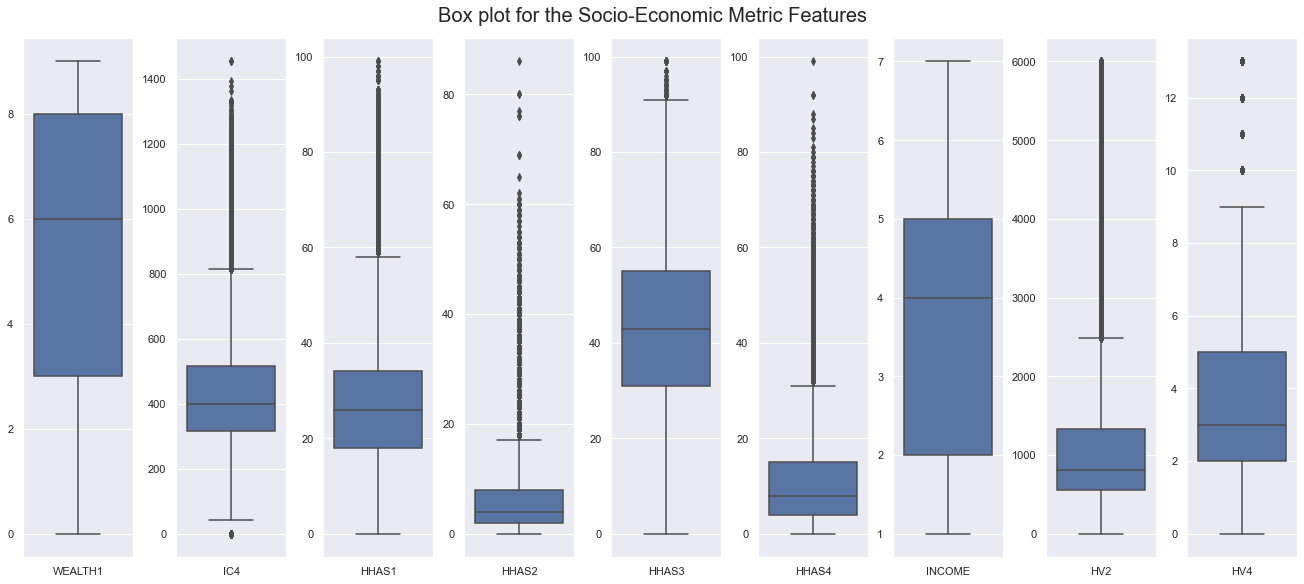

In [85]:
sns.set()

plot_features = socio_economic[soc_eco_metric_features].columns
fig, axes = plt.subplots(1, len(plot_features), figsize=(18,8), constrained_layout=True)
j=0
k=1

for i in zip(axes, plot_features):
    sns.boxplot(data=socio_economic[soc_eco_metric_features].iloc[:,j:k], ax=i[0])
    j=j+1
    k=k+1
    
plt.suptitle("Box plot for the Socio-Economic Metric Features", fontsize=20)
plt.show()

After the numerical features have been visualized, lets check the categorical features. Since we only have three categorical features in the overall cluster, the categorical list, defined previously is going to be used to represent these variables.

The visualization method chosen here are the Countplots, that shows the counts of observations in each categorical bin using bars.

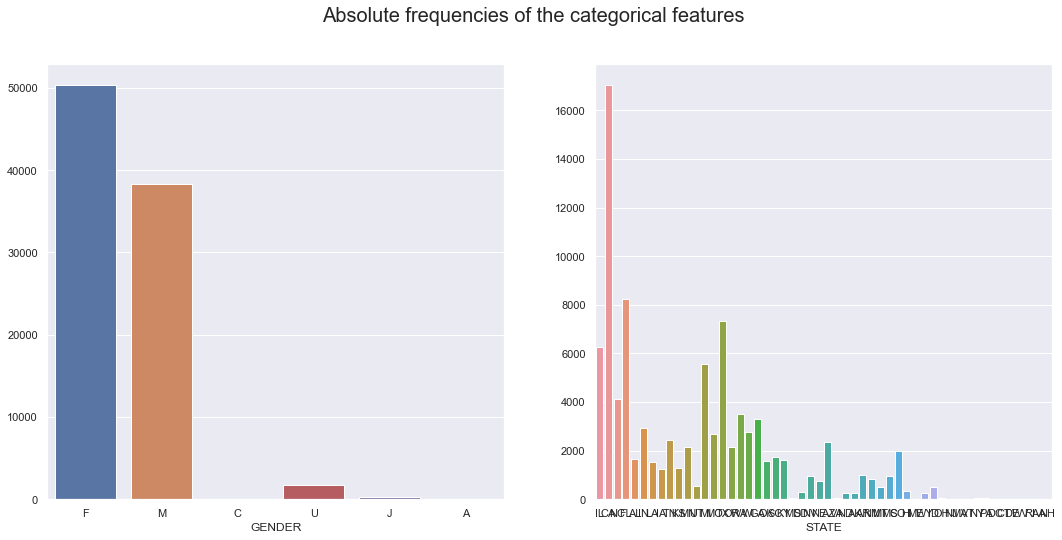

In [86]:
sns.set()

# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,8))

# plot data
sns.countplot(x="GENDER", data=demographic, ax=ax1)
sns.countplot(x="STATE", data=demographic, ax=ax2)

# layout
ax1.set_ylabel("")
ax2.set_ylabel("")

plt.suptitle("Absolute frequencies of the categorical features", fontsize=20)

plt.show()

In [87]:
#fazer correlação

### 2.10) Feature Engeneering

Splitting the US States, into the four principal and most populated regions, so that it is easier to interpret after the clustering.
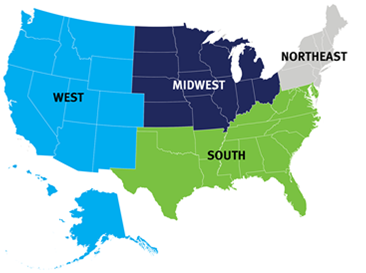

In [88]:
demographic["REGION"]=demographic.STATE.replace(['HI','AK','CO','WY','MT','AZ','UT','ID','CA','NV','OR','WA'],'West')
demographic.REGION.replace(['TX','OK','AR','LA','MS','TN','KY','WV','VA','DE','MD','DC','NC','SC','GA','FL','AL'],'South',inplace=True)
demographic.REGION.replace(['KS','NE','SD','ND','MO','IA','MN','IL','WI','IN','OH','MI'],'MidWest',inplace=True)
demographic.REGION.replace(['PA','NJ','CT','RI','MA','NY','VT','NH','ME'],'NorthEast',inplace=True)

Dropping all the Locations that are defined as States, but are in fact autonomous regions of the USA.

In [89]:
demographic["REGION"].unique()

array(['MidWest', 'West', 'South', 'NM', 'NorthEast', 'AA'], dtype=object)

In [90]:
demographic.REGION.replace(['NM','AA' ],np.nan,inplace=True)

Creating a variable AGE, that is calculated from the DOB variable, turning this variable from a categorical feature to a numerical feature.

In [91]:
demographic["DOB"]=demographic['DOB'].str.split("-",expand=True)
demographic["DOB"] = pd.to_numeric(demographic["DOB"],downcast='integer')
demographic["AGE"]= datetime.now().year - demographic["DOB"]

In [92]:
demographic.GENDER.replace(['C','U','J','A'],'other',inplace=True)

In [93]:
demographic.GENDER.unique()

array(['F', 'M', nan, 'other'], dtype=object)

In [94]:
demographic.drop(["DOB","STATE"],axis=1,inplace=True)

### 2.11.1) Redo Data Imputation

Firstly, we did some simple data imputation using modes, in order to remove the majority of the outliers. Now that we have our variables selected it is possible to do a more detailed data imputation for the metric features, using, for instance KNN Imputer, and using modes for the non-metric features.

In [95]:
value.isna().sum()

RAMNTALL       0
NGIFTALL       0
MINRAMNT       0
MAXRAMNT       0
TIMELAG     9745
AVGGIFT        0
NUMPROM        0
CARDPM12       0
NUMPRM12       0
MAJOR          0
HIT            0
NUMPROM        0
dtype: int64

In [96]:
imputer = KNNImputer(n_neighbors=8)
metric_features = value.columns.to_list()
value[metric_features] = imputer.fit_transform(value[metric_features])

In [97]:
value.isna().sum()

RAMNTALL    0
NGIFTALL    0
MINRAMNT    0
MAXRAMNT    0
TIMELAG     0
AVGGIFT     0
NUMPROM     0
CARDPM12    0
NUMPRM12    0
MAJOR       0
HIT         0
NUMPROM     0
dtype: int64

In [98]:
demographic.isna().sum()

GENDER      2838
POBC1          0
POBC2          0
POP902         0
POP90C1        0
POP90C2        0
POP90C3        0
POP90C4        0
POP90C5        0
AGE901         0
SEC1           0
SEC2           0
SEC3           0
SEC5           0
LSC1           0
LSC3           0
LSC4           0
MARR1          0
MARR2          0
MARR4          0
REGION       832
AGE        23107
dtype: int64

In [99]:
non_metric_features=demographic.select_dtypes('object').columns.to_list()
metric_features = demographic.columns.drop(non_metric_features).to_list()
modes = demographic[non_metric_features].mode().loc[0]
demographic.fillna(modes, inplace=True)
demographic[metric_features] = imputer.fit_transform(demographic[metric_features])

In [100]:
demographic.isna().sum()

GENDER     0
POBC1      0
POBC2      0
POP902     0
POP90C1    0
POP90C2    0
POP90C3    0
POP90C4    0
POP90C5    0
AGE901     0
SEC1       0
SEC2       0
SEC3       0
SEC5       0
LSC1       0
LSC3       0
LSC4       0
MARR1      0
MARR2      0
MARR4      0
REGION     0
AGE        0
dtype: int64

In [101]:
socio_economic.isna().sum()

WEALTH1    43420
IC4            0
HHAS1          0
HHAS2          0
HHAS3          0
HHAS4          0
INCOME     20507
HV2            0
HV4            0
dtype: int64

In [102]:
metric_features = socio_economic.columns.to_list()
socio_economic[metric_features] = imputer.fit_transform(socio_economic[metric_features])

In [103]:
socio_economic.isna().sum()

WEALTH1    0
IC4        0
HHAS1      0
HHAS2      0
HHAS3      0
HHAS4      0
INCOME     0
HV2        0
HV4        0
dtype: int64

In [104]:
overall=pd.merge(socio_economic,demographic,left_index=True,right_index=True)
overall=pd.merge(value,overall,left_index=True,right_index=True)
overall.reset_index(inplace=True)

In [105]:
overall.dtypes

index         int64
RAMNTALL    float64
NGIFTALL    float64
MINRAMNT    float64
MAXRAMNT    float64
TIMELAG     float64
AVGGIFT     float64
NUMPROM     float64
CARDPM12    float64
NUMPRM12    float64
MAJOR       float64
HIT         float64
NUMPROM     float64
WEALTH1     float64
IC4         float64
HHAS1       float64
HHAS2       float64
HHAS3       float64
HHAS4       float64
INCOME      float64
HV2         float64
HV4         float64
GENDER       object
POBC1       float64
POBC2       float64
POP902      float64
POP90C1     float64
POP90C2     float64
POP90C3     float64
POP90C4     float64
POP90C5     float64
AGE901      float64
SEC1        float64
SEC2        float64
SEC3        float64
SEC5        float64
LSC1        float64
LSC3        float64
LSC4        float64
MARR1       float64
MARR2       float64
MARR4       float64
REGION       object
AGE         float64
dtype: object

In [106]:
# Updating metric and non metric features
non_metric_features = overall.select_dtypes(include="object").columns.to_list()
metric_features = overall.select_dtypes(include=["float64"]).columns.to_list()

### 2.11.2) Redo Outlier Removal

In [169]:
out=overall.copy()

#### Minimum Covariance Determinant

In [170]:
from sklearn.covariance import EllipticEnvelope

In [171]:
ee = EllipticEnvelope(contamination=0.019)
ee_df = ee.fit_predict(out[metric_features])

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:647: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "


In [172]:
mask_out =ee_df == -1
outliers_mcd=out[mask_out]
out.drop(outliers_mcd.index,inplace=True)

In [173]:
print('Percentage of data removed after outliers:',
      np.round(1 -  np.round(out.shape[0] / data_original.shape[0], 5), 5)*100, "%")

Percentage of data removed after outliers: 3.913 %


In [174]:
overall=out.copy()

In [262]:
value = overall.loc[:,["RAMNTALL","NGIFTALL","MINRAMNT","MAXRAMNT","TIMELAG","AVGGIFT","NUMPROM","CARDPM12","NUMPRM12","MAJOR","HIT"]]

In [277]:
demographic = overall.loc[:,["REGION","GENDER","AGE","POBC1","POBC2","POP902","POP90C1","POP90C2","POP90C3","POP90C4","POP90C5","AGE901","SEC1","SEC2","SEC3","SEC5","LSC1","LSC3","LSC4","MARR1","MARR2","MARR4"]]

In [183]:
socio_economic = overall.loc[:,["WEALTH1","IC4","HHAS1","HHAS2","HHAS3","HHAS4","INCOME","HV2","HV4"]]

### One Hot Encoder

In [278]:
df_ohc = demographic.copy()
categorical=demographic.select_dtypes(include="object").columns.to_list()
ohc = OneHotEncoder(sparse=False)
ohc_feat = ohc.fit_transform(df_ohc[categorical])
ohc_feat_names = ohc.get_feature_names(categorical)
ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names)  # Why the index=df_ohc.index?
# Reassigning df to contain ohc variables
df_ohc = pd.concat([ohc_df,df_ohc.drop(columns=categorical)], axis=1)
demographic=df_ohc.copy()

In [285]:
demographic

,REGION_MidWest,REGION_NorthEast,REGION_South,REGION_West,GENDER_F,GENDER_M,GENDER_other,AGE,POBC1,POBC2,POP902,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,AGE901,SEC1,SEC2,SEC3,SEC5,LSC1,LSC3,LSC4,MARR1,MARR2,MARR4,demographic_labels
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,63.000,3.0,74.0,264.0,0.0,35.0,65.0,47.0,53.0,39.0,5.0,20.0,3.0,4.0,88.0,0.0,4.0,61.0,7.0,19.0,1
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,48.000,42.0,39.0,940.0,99.0,0.0,0.0,50.0,50.0,34.0,14.0,24.0,4.0,10.0,50.0,27.0,16.0,69.0,4.0,24.0,0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,59.750,2.0,84.0,2040.0,0.0,2.0,98.0,49.0,51.0,35.0,1.0,23.0,1.0,6.0,96.0,0.0,0.0,63.0,9.0,19.0,1
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,72.000,29.0,67.0,160.0,0.0,8.0,92.0,54.0,46.0,32.0,0.0,19.0,1.0,0.0,56.0,3.0,0.0,63.0,9.0,23.0,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,80.000,1.0,65.0,627.0,99.0,0.0,0.0,46.0,54.0,33.0,2.0,26.0,1.0,7.0,99.0,0.0,0.0,42.0,17.0,33.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93450,0.0,0.0,1.0,0.0,1.0,0.0,0.0,52.000,5.0,41.0,529.0,0.0,0.0,99.0,49.0,51.0,38.0,3.0,21.0,2.0,5.0,95.0,0.0,3.0,66.0,10.0,18.0,1
93451,0.0,0.0,0.0,1.0,0.0,1.0,0.0,51.875,4.0,26.0,7252.0,99.0,0.0,0.0,50.0,50.0,28.0,3.0,26.0,2.0,8.0,92.0,2.0,4.0,58.0,15.0,24.0,0
93452,0.0,0.0,1.0,0.0,0.0,1.0,0.0,50.000,2.0,51.0,322.0,96.0,0.0,4.0,51.0,49.0,30.0,9.0,35.0,5.0,7.0,94.0,0.0,2.0,73.0,4.0,20.0,1
93453,1.0,0.0,0.0,0.0,0.0,1.0,0.0,62.000,6.0,82.0,131.0,99.0,0.0,0.0,53.0,47.0,28.0,6.0,32.0,4.0,7.0,92.0,3.0,0.0,45.0,19.0,31.0,0


### 2.12) Data Standardization 

In [302]:
standard_value=StandardScaler().fit(value).transform(value)
standard_demographic=StandardScaler().fit(demographic).transform(demographic)
standard_socio_economic=StandardScaler().fit(socio_economic).transform(socio_economic)

<div class="alert alert-block alert-success">

## 3) Clustering
    
</div>

In [256]:
def plot_inertia(df):
    inertia = []
    for n_clus in range_clusters:  # iterate over desired ncluster range
        kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
        kmclust.fit(df)
        inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution
        
    plt.figure(figsize=(9,5))
    plt.plot(inertia)
    plt.ylabel("Inertia: SSw")
    plt.xlabel("Number of clusters")
    plt.title("Inertia plot over clusters", size=15)
    plt.show()

### Select the best features

### Value

In [188]:
from sklearn.cluster import KMeans

In [189]:
range_clusters = range(1, 11)

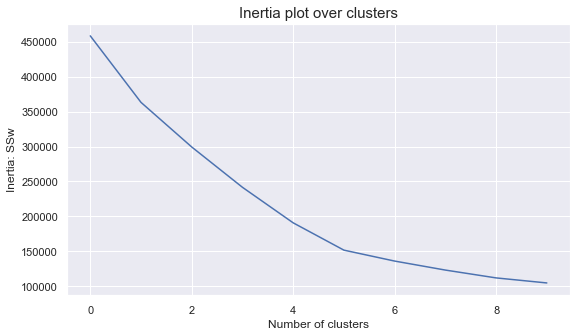

In [303]:
inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(standard_value)
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution
        
plt.figure(figsize=(9,5))
plt.plot(inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

In [231]:
# final cluster solution
number_clusters = 3
kmclust = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
value_labels = kmclust.fit_predict(standard_value)

array([1, 0, 1, ..., 2, 0, 1])

In [232]:
value['value_labels']=value_labels

In [233]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split


In [234]:
# Preparing the data
X = value.drop(columns='value_labels')
y = value.value_labels

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fitting the decision tree
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train, y_train)
print("It is estimated that in average, we are able to predict {0:.2f}% of the customers correctly".format(dt.score(X_test, y_test)*100))

It is estimated that in average, we are able to predict 91.44% of the customers correctly


In [235]:
# Assessing feature importance
pd.Series(dt.feature_importances_, index=X_train.columns)

RAMNTALL    0.009404
NGIFTALL    0.042477
MINRAMNT    0.340992
MAXRAMNT    0.000000
TIMELAG     0.000000
AVGGIFT     0.000000
NUMPROM     0.010300
NUMPROM     0.596827
CARDPM12    0.000000
NUMPRM12    0.000000
MAJOR       0.000000
HIT         0.000000
dtype: float64

In [266]:
value.drop(['RAMNTALL','NGIFTALL','MINRAMNT','MAXRAMNT','NUMPROM','NUMPROM','CARDPM12'],axis=1,inplace=True)

### Demographic

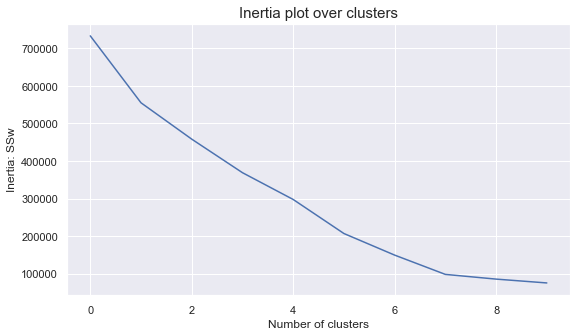

In [304]:
inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(standard_demographic)
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution
        
plt.figure(figsize=(9,5))
plt.plot(inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

In [288]:
# final cluster solution
number_clusters = 3
kmclust = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
demographic_labels = kmclust.fit_predict(standard_demographic)

In [289]:
demographic['demographic_labels']=demographic_labels

In [290]:
# Preparing the data
X = demographic.drop(columns='demographic_labels')
y = demographic.demographic_labels

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fitting the decision tree
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train, y_train)
print("It is estimated that in average, we are able to predict {0:.2f}% of the customers correctly".format(dt.score(X_test, y_test)*100))

It is estimated that in average, we are able to predict 92.65% of the customers correctly


In [291]:
# Assessing feature importance
pd.Series(dt.feature_importances_, index=X_train.columns)

REGION_MidWest      0.000000
REGION_NorthEast    0.000000
REGION_South        0.000000
REGION_West         0.000000
GENDER_F            0.000000
GENDER_M            0.000000
GENDER_other        0.000000
AGE                 0.000000
POBC1               0.225878
POBC2               0.000000
POP902              0.000000
POP90C1             0.720017
POP90C2             0.000000
POP90C3             0.000000
POP90C4             0.000000
POP90C5             0.000000
AGE901              0.000000
SEC1                0.000000
SEC2                0.000000
SEC3                0.000000
SEC5                0.000000
LSC1                0.000000
LSC3                0.000000
LSC4                0.000000
MARR1               0.000000
MARR2               0.000000
MARR4               0.054105
dtype: float64

In [292]:
demographic=demographic.loc[:,['REGION_MidWest','REGION_NorthEast','REGION_South','REGION_West',
                        'GENDER_F','GENDER_M','GENDER_other','AGE']]

### Socio economic

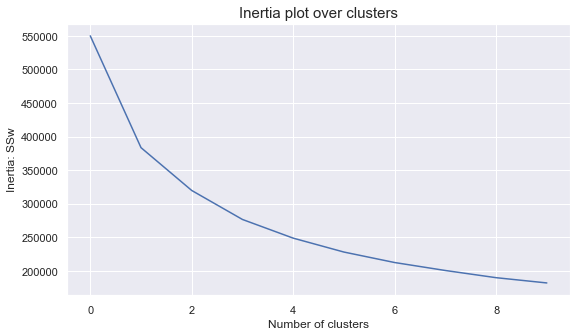

In [305]:
inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(standard_socio_economic)
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution
        
plt.figure(figsize=(9,5))
plt.plot(inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

In [296]:
# final cluster solution
number_clusters = 2
kmclust = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
socio_economic_labels = kmclust.fit_predict(standard_socio_economic)

In [297]:
socio_economic['socio_economic_labels']=socio_economic_labels

In [298]:
# Preparing the data
X = socio_economic.drop(columns='socio_economic_labels')
y = socio_economic.socio_economic_labels

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fitting the decision tree
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train, y_train)
print("It is estimated that in average, we are able to predict {0:.2f}% of the customers correctly".format(dt.score(X_test, y_test)*100))

It is estimated that in average, we are able to predict 91.89% of the customers correctly


In [299]:
# Assessing feature importance
pd.Series(dt.feature_importances_, index=X_train.columns)

WEALTH1    0.009849
IC4        0.966715
HHAS1      0.000000
HHAS2      0.011041
HHAS3      0.000000
HHAS4      0.000000
INCOME     0.012395
HV2        0.000000
HV4        0.000000
dtype: float64

In [301]:
socio_economic=socio_economic.loc[:,['HHAS1','HHAS3','HHAS4','HV2','HV4','INCOME']]